# **IITK AIML Core: Applied Data Science with Python**
## Course End Project Name: <b><i>Sales Analysis</i></b>
### Submitted by: <b><i>Saurav Ganguly</i></b>

### Package imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import statistics
from scipy.stats.mstats import winsorize

sns.set_theme()

### Importing/reading the csv and load as dataframe

In [2]:
aal_sales_df = pd.read_csv('AusApparalSales4thQrt2020.csv')

## =========== Data Wrangling ============= 

#### Finding the total number of rows in the imported dataframe

In [3]:
# Using the len() we first find the length or the total number of rows of the dataframe
df_length = len(aal_sales_df)
df_length

7560

#### Inspecting whether the csv data has been properly converted to dataframe, by checking the first and last 5 rows of the dataframe

In [4]:
# First we check whether the csv has be loaded properly as dataframe by calling the head() and tail()
# Using the head() we check the first 5 rows of the dataframe
aal_sales_df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [5]:
# Using the tail() function we check the last 5 rows of the dataframe
aal_sales_df.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


#### Checking for null or NaN values in all the columns of the data frame

In [6]:
# Then we check for any null values in the data frame
# Here we can use any of isna() or isnull() to check for any null or NaN values in the columns
df_cols_null_info = aal_sales_df.isna().sum()

columns_with_null = []

# Looping through the df_null_info to find the column names that have null values
for index, value in df_cols_null_info.items():
    if value > 0:
        columns_with_null.append(index)

if len(columns_with_null) == 0 :
    print(f'No columns of the dataframes have null or NaN values in {df_length} rows')
else :
    print('The following columns have null values in {df_length} rows\n')
    for column in columns_with_null :
        print(f'{column} has {df_cols_null_info[column]} null or NaN value(s)')

No columns of the dataframes have null or NaN values in 7560 rows


<b>Here we can see that the dataframe contains no missing values (null or NaN) value for any of the columns</b>
- Handling missing data is crucial for maintaining data integrity. Various approaches include <b>imputation</b> (replacing missing values with estimated values), <b>using default values</b> for missing values, or the removal of records with missing values.
- For replacing the missing values with either imputed or default values can be done by using <b>`fillna()`</b> method, or the records with the missing values can be dropped using <b>`dropna()`</b> method
- Either of the two approaches is dependent on the requirement of the analysis

#### Checking for any duplicate rows in the dataframe

In [7]:
duplicate_row_count = aal_sales_df.duplicated().sum()

if duplicate_row_count == 0 :
    print(f'No duplicate row found in the dataframe in {df_length} rows')
else :
    print(f'There are {duplicate_row_count} row(s) found in {df_length} of the dataframe')
    
print('\n')

# Also display the duplicate rows in the actual dataframe
aal_sales_df[aal_sales_df.duplicated() == True]

No duplicate row found in the dataframe in 7560 rows




,Date,Time,State,Group,Unit,Sales


Duplicates rows from the dataframe must be eliminated to ensure correct analysis results free from any anomalies. To remove the duplicate we can call the <b>`drop_duplicates()`</b> method on the dataframe.

### Data Cleaning using Normalization on the dataframe

#### Creating new columns `Week`, `Month`, `Quarter`, `Year` from the "Date" column in the dataframe by converting it into datetime object

In [8]:
# Converting the "Date" column to a datetime object for time-based analysis
aal_sales_df['Date'] = pd.to_datetime(aal_sales_df['Date'])

# Checking the datafreame to check the standardization of "Date" column to datetime object
aal_sales_df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


#### Creating new columns for Week, Month, Quarter and Year for future time-based analysis and aggregation functions

In [9]:
aal_sales_df['Week'] = aal_sales_df['Date'].dt.isocalendar().week
aal_sales_df['Month'] =   aal_sales_df['Date'].dt.month
aal_sales_df['Quarter'] = aal_sales_df['Date'].dt.quarter
aal_sales_df['Year'] =    aal_sales_df['Date'].dt.year

# Checking the datafreame to check the added columns "Week", "Month", "Quarter" and "Year" for time-based analysis
aal_sales_df

,Date,Time,State,Group,Unit,Sales,Week,Month,Quarter,Year
0,2020-10-01,Morning,WA,Kids,8,20000,40,10,4,2020
1,2020-10-01,Morning,WA,Men,8,20000,40,10,4,2020
2,2020-10-01,Morning,WA,Women,4,10000,40,10,4,2020
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10,4,2020
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10,4,2020
...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,53,12,4,2020
7556,2020-12-30,Evening,TAS,Kids,15,37500,53,12,4,2020
7557,2020-12-30,Evening,TAS,Men,15,37500,53,12,4,2020
7558,2020-12-30,Evening,TAS,Women,11,27500,53,12,4,2020


### Data Transformation using Normalized, Natural logarithmic and Square Root Transformation techinques

#### Normalization of the "Unit" and "Sales" columns using natural logarithmic transformation

In [10]:
if 'Unit' in aal_sales_df.columns:
    
     # Normalize 'Unit' column (using min-max) and create a new feature 'Normalized_Unit'
    aal_sales_df['Normalized_Unit'] = (aal_sales_df['Unit'] - aal_sales_df['Unit'].min()) / (aal_sales_df['Unit'].max() - aal_sales_df['Unit'].min())
    
    # Use the natural logarithm on 'Unit' column and create a new feature 'Log_Unit'
    aal_sales_df['Log_Unit'] = aal_sales_df['Unit'].apply(lambda u: np.log(u))
    
    # Square Root 'Unit' column and create a new feature 'Sqrt_Unit'
    aal_sales_df['Sqrt_Unit'] = aal_sales_df['Unit'].apply(lambda x: np.sqrt(x))
    
if 'Sales' in aal_sales_df.columns:
    # Normalize 'Unit'column (using min-max) and create a new feature 'Normalized_Unit'
    aal_sales_df['Normalized_Sales'] = (aal_sales_df['Sales'] - aal_sales_df['Sales'].min()) / (aal_sales_df['Sales'].max() - aal_sales_df['Sales'].min())
    
    # Use the natural logarithm on 'Sales' column and create a new feature 'Log_Sales'
    aal_sales_df['Log_Sales'] = aal_sales_df['Sales'].apply(lambda s: np.log(s))
    
    # Square Root 'Unit' column and create a new feature 'Sqrt_Unit'
    aal_sales_df['Sqrt_Sales'] = aal_sales_df['Sales'].apply(lambda x: np.sqrt(x))
    
# Checking the dataframe for the new added features
aal_sales_df

,Date,Time,State,Group,Unit,Sales,Week,Month,Quarter,Year,Normalized_Unit,Log_Unit,Sqrt_Unit,Normalized_Sales,Log_Sales,Sqrt_Sales
0,2020-10-01,Morning,WA,Kids,8,20000,40,10,4,2020,0.095238,2.079442,2.828427,0.095238,9.903488,141.421356
1,2020-10-01,Morning,WA,Men,8,20000,40,10,4,2020,0.095238,2.079442,2.828427,0.095238,9.903488,141.421356
2,2020-10-01,Morning,WA,Women,4,10000,40,10,4,2020,0.031746,1.386294,2.000000,0.031746,9.210340,100.000000
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10,4,2020,0.206349,2.708050,3.872983,0.206349,10.532096,193.649167
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10,4,2020,0.015873,1.098612,1.732051,0.015873,8.922658,86.602540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,53,12,4,2020,0.190476,2.639057,3.741657,0.190476,10.463103,187.082869
7556,2020-12-30,Evening,TAS,Kids,15,37500,53,12,4,2020,0.206349,2.708050,3.872983,0.206349,10.532096,193.649167
7557,2020-12-30,Evening,TAS,Men,15,37500,53,12,4,2020,0.206349,2.708050,3.872983,0.206349,10.532096,193.649167
7558,2020-12-30,Evening,TAS,Women,11,27500,53,12,4,2020,0.142857,2.397895,3.316625,0.142857,10.221941,165.831240


### Treating the Outliers (Winsorization)

Outliers can significantly impact analysis and modeling. Identifying and addressing outliers is crucial for maintaining the accuracy of results.

**Winsorization:** It is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

In [11]:
# Handling outliers by winsorizing

# Check if 'price' column exists in the DataFrame
if 'Sales' in aal_sales_df.columns:
    # Winsorizing the 'Sales' column with limits [0.05, 0.05], 95% accuracy
    lower_limit = 0.05
    upper_limit = 0.05
    aal_sales_df['Winsorized_Sales'] = winsorize(aal_sales_df['Sales'], limits=[lower_limit, upper_limit])

    # Displaying the DataFrame with the winsorized column
    print("The Dataframe Sales coulum has been winsorized")
else:
    print("The 'Sales' column does not exist in the DataFrame.")
    
aal_sales_df

The Dataframe Sales coulum has been winsorized


,Date,Time,State,Group,Unit,Sales,Week,Month,Quarter,Year,Normalized_Unit,Log_Unit,Sqrt_Unit,Normalized_Sales,Log_Sales,Sqrt_Sales,Winsorized_Sales
0,2020-10-01,Morning,WA,Kids,8,20000,40,10,4,2020,0.095238,2.079442,2.828427,0.095238,9.903488,141.421356,20000
1,2020-10-01,Morning,WA,Men,8,20000,40,10,4,2020,0.095238,2.079442,2.828427,0.095238,9.903488,141.421356,20000
2,2020-10-01,Morning,WA,Women,4,10000,40,10,4,2020,0.031746,1.386294,2.000000,0.031746,9.210340,100.000000,10000
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10,4,2020,0.206349,2.708050,3.872983,0.206349,10.532096,193.649167,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10,4,2020,0.015873,1.098612,1.732051,0.015873,8.922658,86.602540,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,53,12,4,2020,0.190476,2.639057,3.741657,0.190476,10.463103,187.082869,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500,53,12,4,2020,0.206349,2.708050,3.872983,0.206349,10.532096,193.649167,37500
7557,2020-12-30,Evening,TAS,Men,15,37500,53,12,4,2020,0.206349,2.708050,3.872983,0.206349,10.532096,193.649167,37500
7558,2020-12-30,Evening,TAS,Women,11,27500,53,12,4,2020,0.142857,2.397895,3.316625,0.142857,10.221941,165.831240,27500


***Major Downside of Winsorization:*** One major downside for winsorized means is that they naturally introduce some bias into the data set. By reducing the influence of outliers, the analysis is modified for better analysis, but also removes information about the underlying data.

***In all the analysis performed below I have NOT considered winsorized sales data to keep the analysis true with the effects of the outliers and not to introduce any bias.***

## =============== Data Ananlysis ===============

<b>Plotting Charts Used:</b> 
- I have used simple `Line Plots` to plot the relationships between two continuous variables. Line plots are less complicated and comprehensible to depict the relationship between dependent variable clearly.
- I have used `Bar Plots` where the relationships between two more continuous variables are displayed using grouping. Bar plots are also easy to understand and clearly illustrates the movement of data across dependent variables
- I have used `Box Plots` to show the presence of outliers in the datasets and to illustrates the spread of data across different quartiles and  IQRs(Inter-Quartile Ranges), showing the mean positions in the continuous data.
- I have use `Hist Plots` to plot the the distribution of the dataset across several features and show the skewness of the data distribution for various continuos variables.

#### Helper function for finding outliers

In [12]:
def find_outliers_iqr_group(df, column, group_col):
    outliers = []
    for group, data in df.groupby(group_col):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        group_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers.append(group_outliers)
    return pd.concat(outliers)

#### Helper function for Skew Type

In [13]:
def get_skew_type(skewness_value):
    skew_type = ''
    match(skewness):
        case _ if skewness < -1.5:
            skew_type = 'The distribution of Sales is extremely left/negetively skewed'
        case _ if skewness >= -1.5 and skewness < -1:
            skew_type = 'The distribution of Sales is heavily left/negetively skewed'
        case _ if skewness >= -1 and skewness < -0.5:
            skew_type = 'The distribution of Sales is moderately left/negetively skewed'
        case _ if skewness >= -.05 and skewness <= 0.5:
            skew_type = 'The distribution of Sales is fairly symmetrical'
        case _ if skewness <= 1 and skewness > 0.5:
            skew_type = 'The distribution of Sales is moderately right/positively skewed'
        case _ if skewness <= 1.5 and skewness > 1:
            skew_type = 'The distribution of Sales is heavily right/positively skewed'
        case _ if skewness > 1.5:
            skew_type = 'The distribution of Sales is extremely right/positively skewed'
    return skew_type

### Data analysis of the "aal_sales_df" dataframe

#### Descriptive statistics

##### **Descriptive Statistics:** Using the describe() for getting all columns count, mean, std, min, max and percentiles

In [14]:
aal_sales_df.describe()

/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

,Unit,Sales,Week,Month,Quarter,Year,Normalized_Unit,Log_Unit,Sqrt_Unit,Normalized_Sales,Log_Sales,Sqrt_Sales,Winsorized_Sales
count,7560.000000,7560.000000,7560.0,7560.000000,7560.0,7560.0,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,46.455556,11.000000,4.0,2020.0,0.254054,2.621964,3.981530,0.254054,10.446010,199.076492,44187.830688
std,12.901403,32253.506944,3.786662,0.816551,0.0,0.0,0.204784,0.767054,1.467354,0.204784,0.767054,73.367707,29486.753256
min,2.000000,5000.000000,40.0,10.000000,4.0,2020.0,0.000000,0.693147,1.414214,0.000000,8.517193,70.710678,10000.000000
25%,8.000000,20000.000000,43.0,10.000000,4.0,2020.0,0.095238,2.079442,2.828427,0.095238,9.903488,141.421356,20000.000000
50%,14.000000,35000.000000,46.5,11.000000,4.0,2020.0,0.190476,2.639057,3.741657,0.190476,10.463103,187.082869,35000.000000
75%,26.000000,65000.000000,50.0,12.000000,4.0,2020.0,0.380952,3.258097,5.099020,0.380952,11.082143,254.950976,65000.000000
max,65.000000,162500.000000,53.0,12.000000,4.0,2020.0,1.000000,4.174387,8.062258,1.000000,11.998433,403.112887,107500.000000


#### Weekly descriptive statistics
**Grouping the dataframe "aal_sales_df" by 'Week' on the columns 'Sales' and 'Log_Sales', calculating various aggregations**

In [15]:
df_weekly_sales_aggregated = aal_sales_df.groupby('Week').agg({
    'Sales': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
    'Log_Sales': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
})
df_weekly_sales_aggregated

Sales                                                  \
              mean   median    min     max       sum           std   
Week                                                                 
40    44776.785714  35000.0   7500  125000  15045000  29293.076913   
41    45922.619048  37500.0   7500  125000  27002500  29930.519460   
42    45306.122449  35000.0   7500  125000  26640000  29928.788223   
43    45603.741497  35000.0   7500  125000  26815000  29851.225988   
44    43268.849206  32500.0   5000  125000  21807500  29887.407035   
45    35484.693878  25000.0   5000  112500  20865000  27074.865046   
46    36007.653061  25000.0   5000  112500  21172500  27243.357678   
47    35905.612245  25000.0   5000  112500  21112500  27553.541234   
48    36526.360544  25000.0   5000  112500  21477500  27787.488802   
49    50378.401361  37500.0   5000  162500  29622500  34589.575974   
50    53613.945578  37500.0  12500  162500  31525000  36541.157063   
51    53835.034014  37500.0  12500  162500  31655000  36206.440040   
52    54030.612245  38750.0  12500  162500  31770000  37649.134434   
53    54732.142857  37500.0  12500  162500  13792500  36107.308508   

                          Log_Sales                                  \
               var count       mean     median       min        max   
Week                                                                  
40    8.580844e+08   336  10.478478  10.463103  8.922658  11.736069   
41    8.958360e+08   588  10.503738  10.532096  8.922658  11.736069   
42    8.957324e+08   588  10.483191  10.463103  8.922658  11.736069   
43    8.910957e+08   588  10.498070  10.463103  8.922658  11.736069   
44    8.932571e+08   504  10.415543  10.388995  8.517193  11.736069   
45    7.330483e+08   588  10.158517  10.126631  8.517193  11.630709   
46    7.422005e+08   588  10.179852  10.126631  8.517193  11.630709   
47    7.591976e+08   588  10.177134  10.126631  8.517193  11.630709   
48    7.721445e+08   588  10.200420  10.126631  8.517193  11.630709   
49    1.196439e+09   588  10.598784  10.532096  8.517193  11.998433   
50    1.335256e+09   588  10.665099  10.532096  9.433484  11.998433   
51    1.310906e+09   588  10.673553  10.532096  9.433484  11.998433   
52    1.417457e+09   588  10.666451  10.564365  9.433484  11.998433   
53    1.303738e+09   252  10.700026  10.532096  9.433484  11.998433   

                                             
              sum       std       var count  
Week                                         
40    3520.768526  0.712224  0.507263   336  
41    6176.197685  0.710941  0.505436   588  
42    6164.116327  0.725252  0.525991   588  
43    6172.865081  0.704862  0.496830   588  
44    5249.433831  0.755409  0.570642   504  
45    5973.208008  0.840111  0.705787   588  
46    5985.752731  0.830363  0.689502   588  
47    5984.154896  0.822952  0.677250   588  
48    5997.846697  0.815450  0.664959   588  
49    6232.084805  0.690254  0.476451   588  
50    6271.078063  0.676985  0.458309   588  
51    6276.049070  0.670570  0.449664   588  
52    6271.873045  0.684730  0.468855   588  
53    2696.406483  0.656034  0.430381   252

**Grouping the dataframe "aal_sales_df" by 'Week' on the columns 'Unit' and 'Log_Unit', calculating various aggregations**

In [16]:
df_weekly_unit_aggregated = aal_sales_df.groupby('Week').agg({
    'Unit': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
    'Log_Unit': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
})
df_weekly_unit_aggregated

Unit                                                     Log_Unit  \
           mean median min max    sum        std         var count      mean   
Week                                                                           
40    17.910714   14.0   3  50   6018  11.717231  137.293497   336  2.654432   
41    18.369048   15.0   3  50  10801  11.972208  143.333759   588  2.679692   
42    18.122449   14.0   3  50  10656  11.971515  143.317178   588  2.659145   
43    18.241497   14.0   3  50  10726  11.940490  142.575311   588  2.674024   
44    17.307540   13.0   2  50   8723  11.954963  142.921136   504  2.591497   
45    14.193878   10.0   2  45   8346  10.829946  117.287731   588  2.334471   
46    14.403061   10.0   2  45   8469  10.897343  118.752086   588  2.355806   
47    14.362245   10.0   2  45   8445  11.021416  121.471622   588  2.353088   
48    14.610544   10.0   2  45   8591  11.114996  123.543125   588  2.376374   
49    20.151361   15.0   2  65  11849  13.835830  191.430203   588  2.774738   
50    21.445578   15.0   5  65  12610  14.616463  213.640986   588  2.841053   
51    21.534014   15.0   5  65  12662  14.482576  209.745008   588  2.849507   
52    21.612245   15.5   5  65  12708  15.059654  226.793172   588  2.842405   
53    21.892857   15.0   5  65   5517  14.442923  208.598036   252  2.875980   

                                                                           
        median       min       max          sum       std       var count  
Week                                                                       
40    2.639057  1.098612  3.912023   891.889066  0.712224  0.507263   336  
41    2.708050  1.098612  3.912023  1575.658631  0.710941  0.505436   588  
42    2.639057  1.098612  3.912023  1563.577273  0.725252  0.525991   588  
43    2.639057  1.098612  3.912023  1572.326027  0.704862  0.496830   588  
44    2.564949  0.693147  3.912023  1306.114642  0.755409  0.570642   504  
45    2.302585  0.693147  3.806662  1372.668954  0.840111  0.705787   588  
46    2.302585  0.693147  3.806662  1385.213676  0.830363  0.689502   588  
47    2.302585  0.693147  3.806662  1383.615842  0.822952  0.677250   588  
48    2.302585  0.693147  3.806662  1397.307643  0.815450  0.664959   588  
49    2.708050  0.693147  4.174387  1631.545751  0.690254  0.476451   588  
50    2.708050  1.609438  4.174387  1670.539009  0.676985  0.458309   588  
51    2.708050  1.609438  4.174387  1675.510016  0.670570  0.449664   588  
52    2.740319  1.609438  4.174387  1671.333990  0.684730  0.468855   588  
53    2.708050  1.609438  4.174387   724.746888  0.656034  0.430381   252

#### Monthly descriptive statistics
**Grouping the dataframe "aal_sales_df" by 'Month' on the columns 'Sales' and 'Log_Sales', calculating various aggregations**

In [17]:
df_monthly_sales_aggregated = aal_sales_df.groupby('Month').agg({
    'Sales': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
    'Log_Sales': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
})
df_monthly_sales_aggregated

Sales                                                   \
               mean   median    min     max        sum           std   
Month                                                                  
10     45353.174603  35000.0   7500  125000  114290000  29861.302213   
11     35985.119048  25000.0   5000  112500   90682500  27366.175823   
12     53702.380952  37500.0  12500  162500  135330000  36385.451298   

                           Log_Sales                                  \
                var count       mean     median       min        max   
Month                                                                  
10     8.916974e+08  2520  10.487131  10.463103  8.922658  11.736069   
11     7.489076e+08  2520  10.180172  10.126631  8.517193  11.630709   
12     1.323901e+09  2520  10.670727  10.532096  9.433484  11.998433   

                                               
                sum       std       var count  
Month                                          
10     26427.569191  0.716559  0.513456  2520  
11     25654.033820  0.825265  0.681062  2520  
12     26890.232237  0.669446  0.448158  2520

**Grouping the dataframe "aal_sales_df" by 'Month' on the columns 'Unit' and 'Log_Unit', calculating various aggregations**

In [18]:
df_monthly_unit_aggregated = aal_sales_df.groupby('Month').agg({
    'Unit': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
    'Log_Unit': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
})
df_monthly_unit_aggregated

Unit                                                     Log_Unit  \
            mean median min max    sum        std         var count      mean   
Month                                                                           
10     18.141270   14.0   3  50  45716  11.944521  142.671579  2520  2.663085   
11     14.394048   10.0   2  45  36273  10.946470  119.825213  2520  2.356126   
12     21.480952   15.0   5  65  54132  14.554181  211.824171  2520  2.846681   

                                                                            
         median       min       max          sum       std       var count  
Month                                                                       
10     2.639057  1.098612  3.912023  6710.973244  0.716559  0.513456  2520  
11     2.302585  0.693147  3.806662  5937.437873  0.825265  0.681062  2520  
12     2.708050  1.609438  4.174387  7173.636290  0.669446  0.448158  2520

#### Quarterly descriptive statistics
**Grouping the dataframe "aal_sales_df" by 'Quarter' on the columns 'Sales' and 'Log_Sales', calculating various aggregations**

In [19]:
df_quarterly_sales_aggregated = aal_sales_df.groupby('Quarter').agg({
    'Sales': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
    'Log_Sales': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
})
df_quarterly_sales_aggregated

Sales                                                  \
                 mean   median   min     max        sum           std   
Quarter                                                                 
4        45013.558201  35000.0  5000  162500  340302500  32253.506944   

                            Log_Sales                                  \
                  var count      mean     median       min        max   
Quarter                                                                 
4        1.040289e+09  7560  10.44601  10.463103  8.517193  11.998433   

                                                 
                  sum       std       var count  
Quarter                                          
4        78971.835249  0.767054  0.588372  7560

**Grouping the dataframe "aal_sales_df" by 'Quarter' on the columns 'Unit' and 'Log_Unit', calculating various aggregations**

In [20]:
df_quarterly_unit_aggregated = aal_sales_df.groupby('Quarter').agg({
    'Unit': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
    'Log_Unit': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count'],
})
df_quarterly_unit_aggregated

Unit                                                      \
              mean median min max     sum        std         var count   
Quarter                                                                  
4        18.005423   14.0   2  65  136121  12.901403  166.446194  7560   

         Log_Unit                                                        \
             mean    median       min       max           sum       std   
Quarter                                                                   
4        2.621964  2.639057  0.693147  4.174387  19822.047406  0.767054   

                         
              var count  
Quarter                  
4        0.588372  7560

#### ======================================================================================================

### Descriptive Statistics on Sales

<b>Mean:</b> It is the most frequently utilized measure of central tendency and is applicable to both continuous and discrete datasets.<br>Mean is calculated by adding all the data points and dividing the sum with the number of data points

<i><b>Note:</b> Mean is sensitive to outliers and skewness in data</i>


In [21]:
sales_mean = np.mean(aal_sales_df['Sales'])
print(f'The mean of the sales data for the data set is {round(sales_mean, 2)}')

The mean of the sales data for the data set is 45013.56


<b>Median:</b> The median is the middle number obtained by arranging the data in ascending or descending order.
- In datasets with an odd number of points, the median is the exact middle value.
- In datasets with an even number of points, the median is the average of the two central values.
- In both cases, the median is notably less sensitive to outliers and skewed data.

In [22]:
sales_median = np.median(aal_sales_df['Sales'])
print(f'The median of the sales data for the data set is {round(sales_median, 2)}')

The median of the sales data for the data set is 35000.0


<b>Mode:</b> Mode is the most frequently occurring data point in the set.
- The mode is adaptable and applicable to both numerical and categorical data.
- The mode is sometimes misleading, potentially not reflecting the true center of a distribution.
- The mode is occasionally distant, representing the most frequent data points, which might be far from the actual central point.

In [23]:
sales_mode = statistics.mode(aal_sales_df['Sales'])
sales_mode
print(f'The mode of the sales data for the data set is {sales_mode}')

The mode of the sales data for the data set is 22500


<b>Standard Deviation:</b> Standard Deviation (SD) is the most popular measure of dispersion. It measures the spread of data around the mean.
It is defined as the square root of the sum of squares of the deviation around the mean divided by the number of observations.

In [24]:
sales_std_dev = statistics.stdev(aal_sales_df['Sales'])
sales_std_dev
print(f'The standard deviation of the sales data for the data set is {round(sales_std_dev, 2)}')

The standard deviation of the sales data for the data set is 32253.51


<b>Variance:</b> Variance is defined as the average of the squared differences from the mean.

In [25]:
sales_variance = statistics.variance(aal_sales_df['Sales'])
sales_variance
print(f'The variance of the sales data for the data set is {round(sales_variance, 2)}')

The variance of the sales data for the data set is 1040288710.18


<b>Skewness:</b> 

- In a normal distribution, the graph appears as a classical, symmetrical __bell-shaped curve.__ The mean, average, and
mode or maximum point on the curve are equal, and the tails on either side of the curve are exact mirror images of
each other.
- When a distribution is skewed to the left, the tail on the curve's left side is longer than the tail on the
right side, and the mean is less than the mode. This situation is called negative skewness.

- When a distribution is skewed to the right, the tail on the curve's right side is longer than the tail on the left side, and the mean is greater than the mode. This situation  is called positive skewness.

In [26]:
from statsmodels.stats.stattools import medcouple
from statsmodels.stats.stattools import robust_skewness

sales_skewness = medcouple(aal_sales_df['Sales'])
print(f'The variance of the sales data for the data set is {sales_skewness}')

The variance of the sales data for the data set is 0.38461538461538464


<b>Covariance:</b> Covariance measures the relationship and dependency between two variables. Covariance gives
the direction of the linear relationship between the two variables</b>

In [27]:
sales_unit_cov_df = aal_sales_df[['Sales', 'Unit']]
sales_unit_covariance = sales_unit_cov_df.cov().iloc[0, 1]
print(f'The covariance between the sales and the unit sold is {sales_unit_covariance}')

The covariance between the sales and the unit sold is 416115.48407378705


<b>Correlation: </b> Like Covariance, Correlation also measure the relationship and dependency between two variables. While covariance gives
the direction of the linear relationship, correlation gives both direction and strength. Therefore, correlation is
a function of covariance. Furthermore, correlation values are standardized, while covariance values are not.

In [28]:
sales_unit_cor_df = aal_sales_df[['Sales', 'Unit']]
sales_unit_covariance = sales_unit_cor_df.corr().iloc[0, 1]
print(f'The correlation between the sales and the unit sold is {sales_unit_covariance}')

The correlation between the sales and the unit sold is 0.9999999999999979


<b>Deduction:</b> The values of `Covariance` and `Correlation` indicates a perfect positive linear relationship between `Sales` and `Unit`; as `Unit` increases, `Sales` also increases by a proportional amount and vice versa.

<b> The following line graph represents the relationship between Sales and Unit </b>

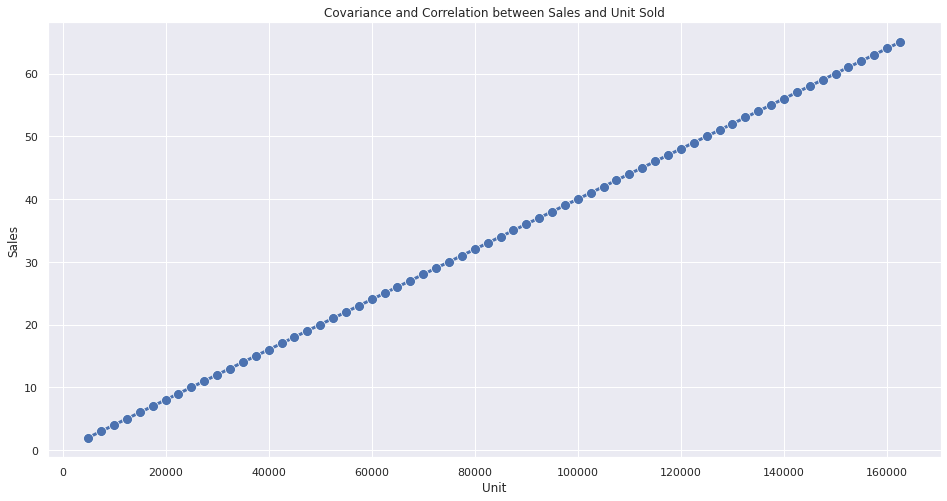

In [29]:
sales_unit_df = aal_sales_df[['Sales', 'Unit']]
plt.figure(figsize=(16, 8))
sns.lineplot(x='Sales', y='Unit', data= sales_unit_df, marker='o', markersize=10, linewidth=3) 
plt.title('Covariance and Correlation between Sales and Unit Sold')
plt.xlabel('Unit')
plt.ylabel('Sales')
plt.show()

#### ======================================================================================================

### Sales Analysis For Groups, States and Time of Day

#### Group-wise Total Sales

In [30]:
# Using groupby() and sum() to find the total sales for each group
tot_sales_by_group = aal_sales_df.groupby('Group')['Sales'].sum()
tot_sales_by_group

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

In [31]:
# Finding the Groups with the total highest and lowest sales

# Find the group with the highest sales
highest_sales_group = tot_sales_by_group.idxmax()
highest_group_sales_amount = tot_sales_by_group.max()

# Find the group with the lowest sales
lowest_sales_group = tot_sales_by_group.idxmin()
lowest_group_sales_amount = tot_sales_by_group.min()

print(f"Group with highest total sales: {highest_sales_group}, Sales: {highest_group_sales_amount}")
print(f"Group with lowest total sales: {lowest_sales_group}, Sales: {lowest_group_sales_amount}")

Group with highest total sales:  Men, Sales: 85750000
Group with lowest total sales:  Seniors, Sales: 84037500


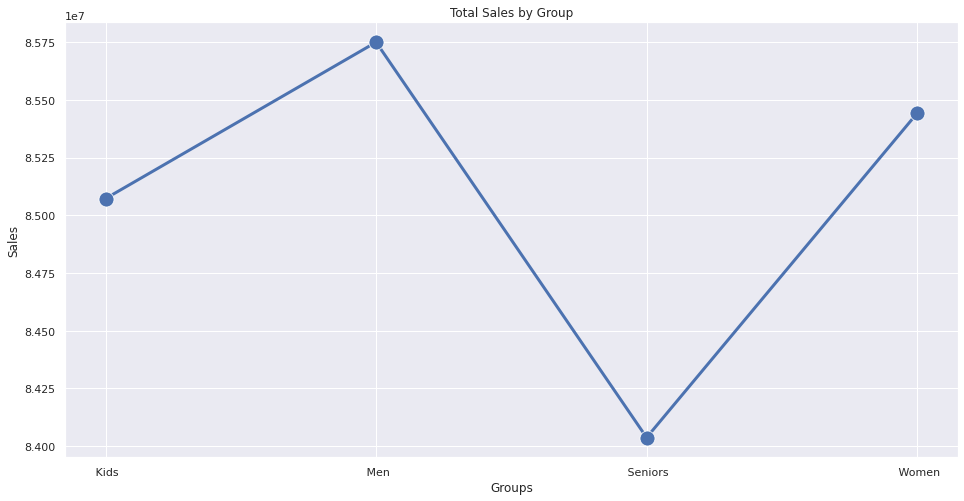

In [32]:
# Plotting the total group-wise sales data on a seaborn plot
tot_sales_by_group_df = pd.DataFrame(tot_sales_by_group).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Group', y='Sales', data= tot_sales_by_group_df, marker='o', markersize=15, linewidth=3) 
plt.title('Total Sales by Group')
plt.xlabel('Groups')
plt.ylabel('Sales')
plt.show()

<b>Deduction:</b> The above analysis shows that the Group <b>`Men`</b> has the highest total sales and the Group <b>`Seniors`</b> have the lowest total sales

#### Group-wise Average Sales

In [33]:
# Using groupby() and mean() to find the average sales for each group
avg_sales_by_group = aal_sales_df.groupby('Group')['Sales'].mean()
avg_sales_by_group

Group
 Kids       45011.904762
 Men        45370.370370
 Seniors    44464.285714
 Women      45207.671958
Name: Sales, dtype: float64

In [34]:
# Finding the Groups with the average highest and lowest sales

# Find the group with the highest sales
highest_avg_sales_group = avg_sales_by_group.idxmax()
highest_group_avg_sales_amount = round(avg_sales_by_group.max(),2)

# Find the group with the lowest sales
lowest_avg_sales_group = avg_sales_by_group.idxmin()
lowest_group_avg_sales_amount = round(avg_sales_by_group.min(),2)

print(f"Group with highest average sales: {highest_avg_sales_group}, Sales: {highest_group_avg_sales_amount}")
print(f"Group with lowest average sales: {lowest_avg_sales_group}, Sales: {lowest_group_avg_sales_amount}")

Group with highest average sales:  Men, Sales: 45370.37
Group with lowest average sales:  Seniors, Sales: 44464.29


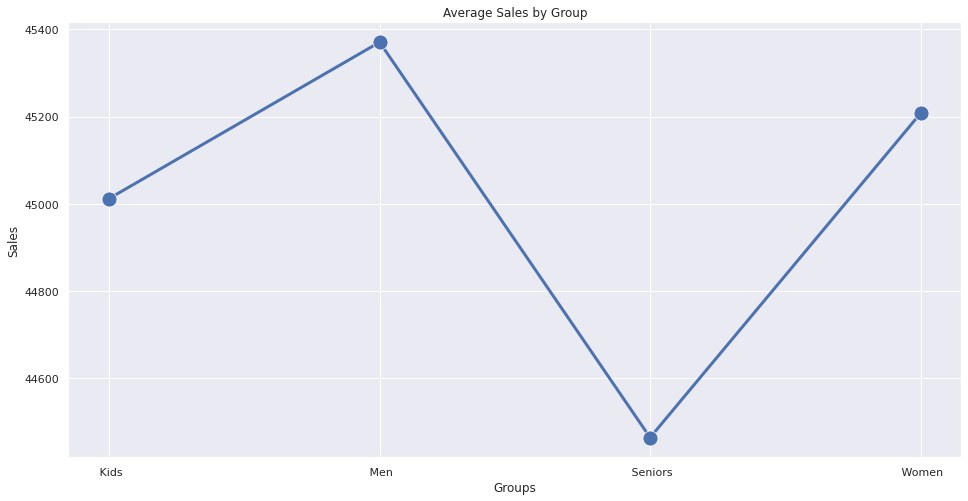

In [35]:
# Plotting the average group-wise sales data on a seaborn plot
avg_sales_by_group_df = pd.DataFrame(avg_sales_by_group).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Group', y='Sales', data= avg_sales_by_group_df, marker='o', markersize=15, linewidth=3) 
plt.title('Average Sales by Group')
plt.xlabel('Groups')
plt.ylabel('Sales')
plt.show()

<b>Deduction:</b> The above analysis shows that the Group <b>`Men`</b> has the highest average sales and the Group <b>`Seniors`</b> have the lowest average sales

#### Group-wise Sales Distribution

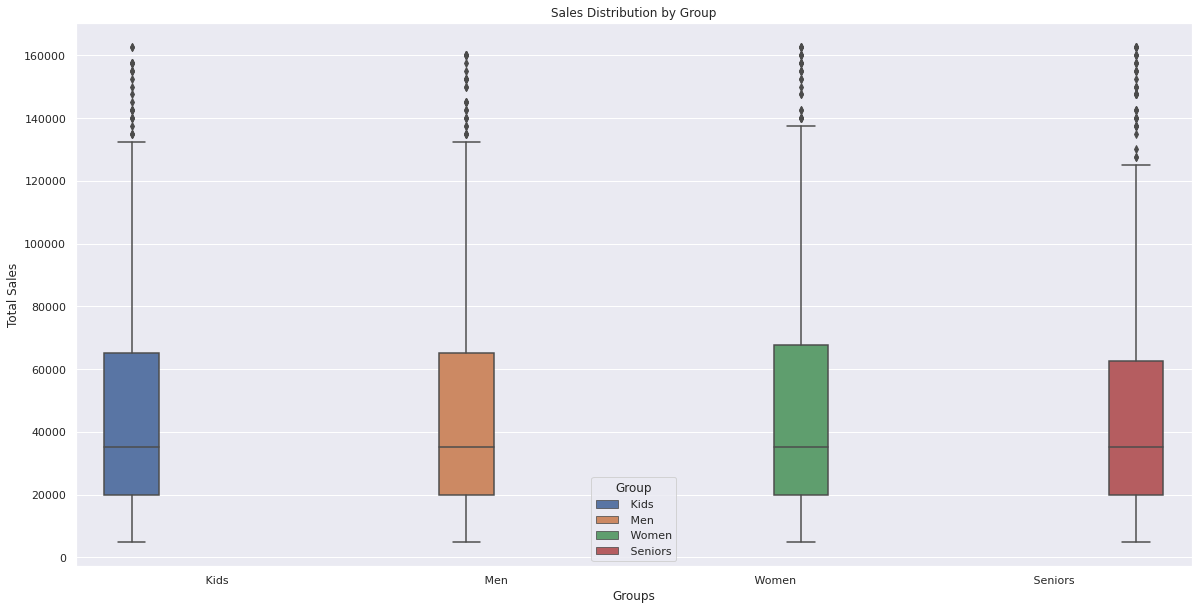

In [36]:
# Group-wise sales distributions showing the fluctuation in sales as outliers

plt.figure(figsize=(20, 10))
sns.boxplot(x='Group', y='Sales', data=aal_sales_df, hue='Group')
plt.title('Sales Distribution by Group')
plt.xlabel('Groups')
plt.ylabel('Total Sales')
plt.show()

#### Group-wise outliers count for the above boxplot distribution

In [37]:
# Finding the outliers in the above Group-wise Sales box-plot distribution
outliers_group_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', 'Group').groupby('Group')['Sales'].agg(['min', 'max', 'count'])
if len(outliers_group_sales) > 0 :
    print("\nOutliers for Sales by Group:\n", outliers_group_sales)
else :
    print("\nNo Outliers for Sales by Group")


Outliers for Sales by Group:
              min     max  count
Group                          
 Kids     135000  162500     25
 Men      135000  160000     30
 Seniors  127500  162500     39
 Women    140000  162500     27


<b>Deduction:</b> The above analysis shows that all the Groups have outliers data for Sales with the Group <b>`Seniors`</b> having the highest outliers count and the Group <b>`Kids`</b> having the lowest outliers count.

##### ======================================================================================================

#### State-wise Total Sales

In [38]:
# Using groupby() and sum() to find the total sales for each state
tot_sales_by_state = aal_sales_df.groupby('State')['Sales'].sum()
tot_sales_by_state

State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

In [39]:
# Finding the States with the highest and lowest total sales

# Find the state with the highest sales
highest_sales_state = tot_sales_by_state.idxmax()
highest_state_sales_amount = tot_sales_by_state.max()

# Find the state with the lowest sales
lowest_sales_state = tot_sales_by_state.idxmin()
lowest_state_sales_amount = tot_sales_by_state.min()

print(f"State with highest total sales: {highest_sales_state}, Sales: {highest_state_sales_amount}")
print(f"State with lowest total sales: {lowest_sales_state}, Sales: {lowest_state_sales_amount}")

State with highest total sales:  VIC, Sales: 105565000
State with lowest total sales:  WA, Sales: 22152500


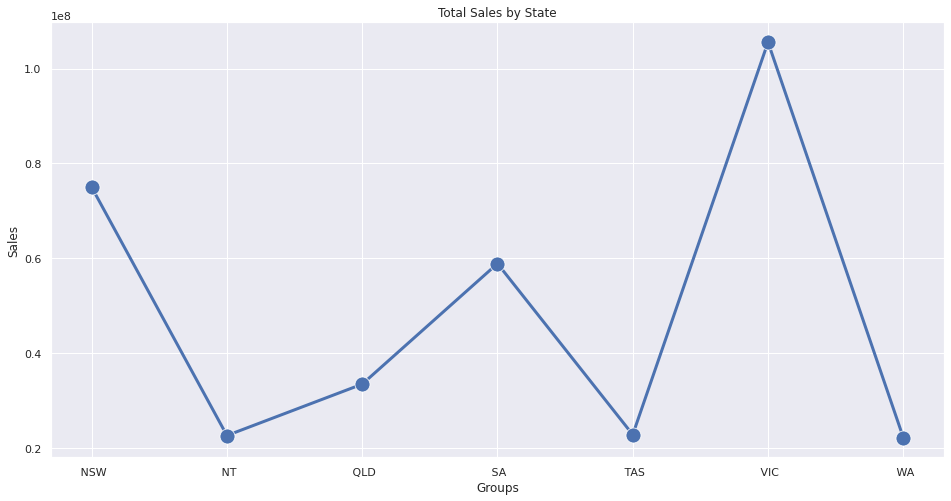

In [40]:
# Plotting the total state-wise sales data on a seaborn plot

tot_sales_by_state_df = pd.DataFrame(tot_sales_by_state).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='State', y='Sales', data= tot_sales_by_state_df, marker='o', markersize=15, linewidth=3) 
plt.title('Total Sales by State')
plt.xlabel('Groups')
plt.ylabel('Sales')
plt.show()

<b>Deduction:</b> 
- The above analysis shows the State <b>`VIC`</b> has the highest total sales and the State <b>`WA`</b> has the lowest total sales.
- It is also seen that the total sales of <b>`VIC`</b> is considerably higher than all the other states.
- There are some other states like <b>`NT`</b> and <b>`TAS`</b> where the total sales are also significantly lower and is close to that of <b>`WA`</b>, having the lowest total sales of all.

In [41]:
# Using groupby() and sum() to find the average sales for each state
avg_sales_by_state = aal_sales_df.groupby('State')['Sales'].mean()
avg_sales_by_state

State
 NSW    69416.666667
 NT     20907.407407
 QLD    30942.129630
 SA     54497.685185
 TAS    21074.074074
 VIC    97745.370370
 WA     20511.574074
Name: Sales, dtype: float64

In [42]:
# Finding the States with the highest and lowest average sales

# Find the state with the highest sales
highest_avg_sales_state = avg_sales_by_state.idxmax()
highest_state_avg_sales_amount = round(avg_sales_by_state.max(),2)

# Find the state with the lowest sales
lowest_avg_sales_state = avg_sales_by_state.idxmin()
lowest_state_avg_sales_amount = round(avg_sales_by_state.min(),2)

print(f"State with highest average sales: {highest_avg_sales_state}, Sales: {highest_state_avg_sales_amount}")
print(f"State with lowest average sales: {lowest_avg_sales_state}, Sales: {lowest_state_avg_sales_amount}")

State with highest average sales:  VIC, Sales: 97745.37
State with lowest average sales:  WA, Sales: 20511.57


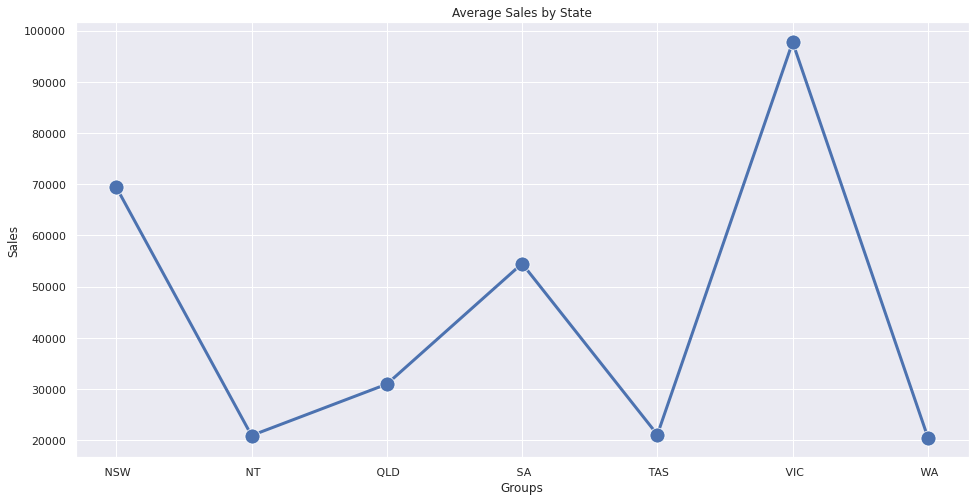

In [43]:
# Plotting the average state-wise sales data on a seaborn plot

avg_sales_by_state_df = pd.DataFrame(avg_sales_by_state).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='State', y='Sales', data= avg_sales_by_state_df, marker='o', markersize=15, linewidth=3) 
plt.title('Average Sales by State')
plt.xlabel('Groups')
plt.ylabel('Sales')
plt.show()

<b>Deduction:</b> 
- The above analysis shows the State <b>`VIC`</b> has the highest average sales and the State <b>`WA`</b> has the lowest average sales.
- It is also seen that the average sales of <b>`VIC`</b> is considerably higher than all the other states.
- There are some other states like <b>`NT`</b> and <b>`TAS`</b> where the average sales are also significantly lower and is close to that of <b>`WA`</b>, having the lowest average sales of all.

#### State-wise Sales Distribution

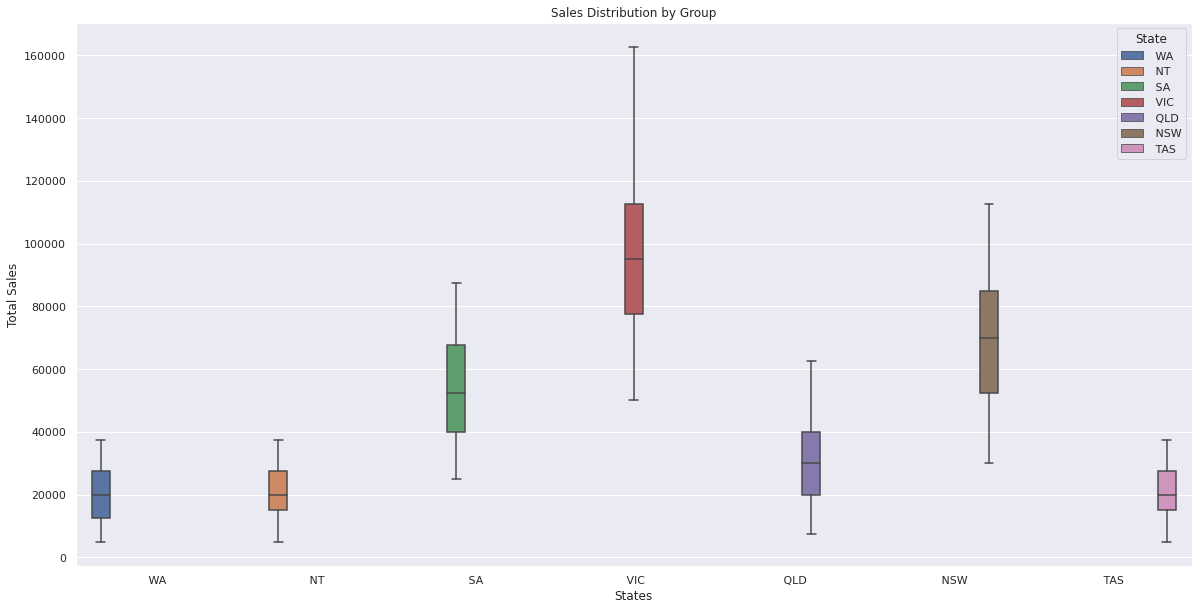

In [44]:
# State-wise sales distributions showing the fluctuation in sales as outliers

plt.figure(figsize=(20, 10))
sns.boxplot(x='State', y='Sales', data=aal_sales_df, hue='State')
plt.title('Sales Distribution by Group')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.show()

#### State-wise outliers count for the above boxplot distribution

In [45]:
# Finding the outliers in the above State-wise Sales box-plot distribution
outliers_state_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', 'State').groupby('State')['Sales'].agg(['min', 'max', 'count'])
if len(outliers_state_sales) > 0 :
    print("\nOutliers for Sales by State:\n", outliers_state_sales)
else :
    print("\nNo Outliers for Sales by State")


No Outliers for Sales by State


<b>Deduction:</b> There are no outlier data for the sales of any of the states

##### ======================================================================================================

#### Total Time-wise Sales

In [46]:
# Using groupby() and sum() to find the total sales for each Time of day
tot_sales_by_time = aal_sales_df.groupby('Time')['Sales'].sum()
tot_sales_by_time

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

In [47]:
# Finding the Time of the day with the highest and lowest total sales

# Find the time with the highest sales
highest_sales_time = tot_sales_by_time.idxmax()
highest_time_sales_amount = tot_sales_by_time.max()

# Find the time with the lowest sales
lowest_sales_time = tot_sales_by_time.idxmin()
lowest_time_sales_amount = tot_sales_by_time.min()

print(f"Time with highest total sales: {highest_sales_time}, Sales: {highest_time_sales_amount}")
print(f"Time with lowest total sales: {lowest_sales_time}, Sales: {lowest_time_sales_amount}")

Time with highest total sales:  Morning, Sales: 114207500
Time with lowest total sales:  Evening, Sales: 112087500


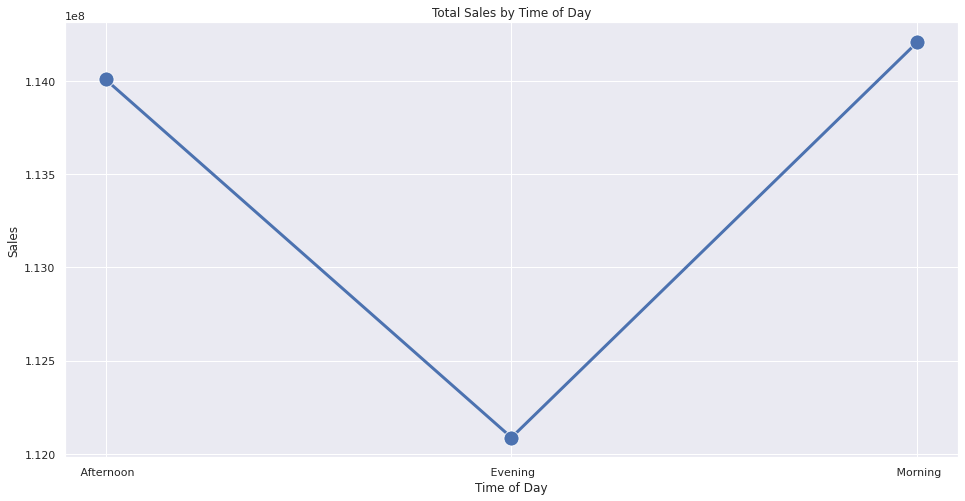

In [48]:
# Plotting the total time-wise sales data on a seaborn plot

tot_sales_by_time_df = pd.DataFrame(tot_sales_by_time).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Time', y='Sales', data= tot_sales_by_time_df, marker='o', markersize=15, linewidth=3) 
plt.title('Total Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

<b>Deduction:</b> The above analysis shows that <b>`Morning`</b> time has the highest total sales and <b>`Evening`</b> time have the lowest total sales

#### Average Time-wise Sales

In [49]:
# Using groupby() and sum() to find the average sales for each Time of day
avg_sales_by_time = aal_sales_df.groupby('Time')['Sales'].mean()
avg_sales_by_time

Time
 Afternoon    45241.071429
 Evening      44479.166667
 Morning      45320.436508
Name: Sales, dtype: float64

In [50]:
# Finding the Time of the day with the highest and lowest average sales

# Find the time with the highest sales
highest_avg_sales_time = avg_sales_by_time.idxmax()
highest_time_avg_sales_amount = round(avg_sales_by_time.max(),2)

# Find the time with the lowest sales
lowest_avg_sales_time = avg_sales_by_time.idxmin()
lowest_time_avg_sales_amount = round(avg_sales_by_time.min(),2)

print(f"Time with highest average sales: {highest_avg_sales_time}, Sales: {highest_time_avg_sales_amount}")
print(f"Time with lowest average sales: {lowest_avg_sales_time}, Sales: {lowest_time_avg_sales_amount}")

Time with highest average sales:  Morning, Sales: 45320.44
Time with lowest average sales:  Evening, Sales: 44479.17


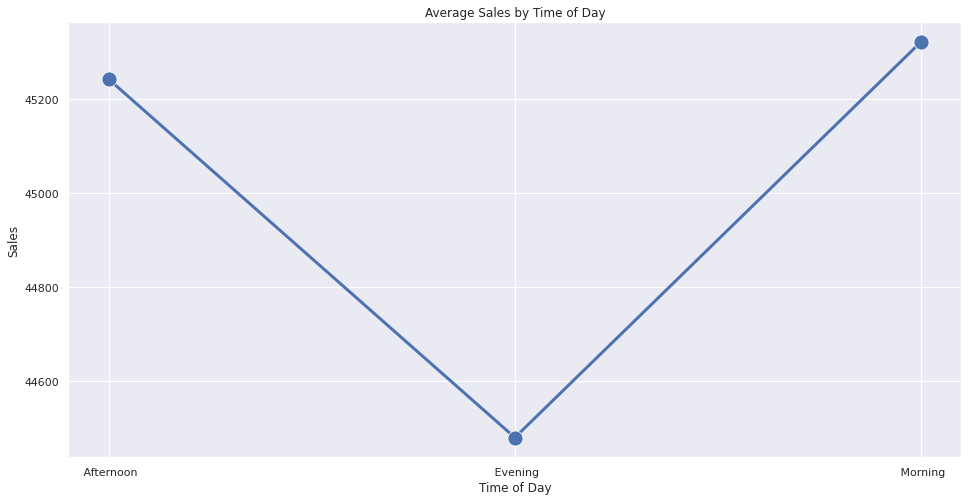

In [51]:
# Plotting the average time-wise sales data on a seaborn plot

avg_sales_by_time_df = pd.DataFrame(avg_sales_by_time).reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Time', y='Sales', data= avg_sales_by_time_df, marker='o', markersize=15, linewidth=3) 
plt.title('Average Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

<b>Deduction:</b> The above analysis shows that <b>`Morning`</b> time has the highest average sales and <b>`Evening`</b> time have the lowest average sales

#### Time of the Day Sales Distribution

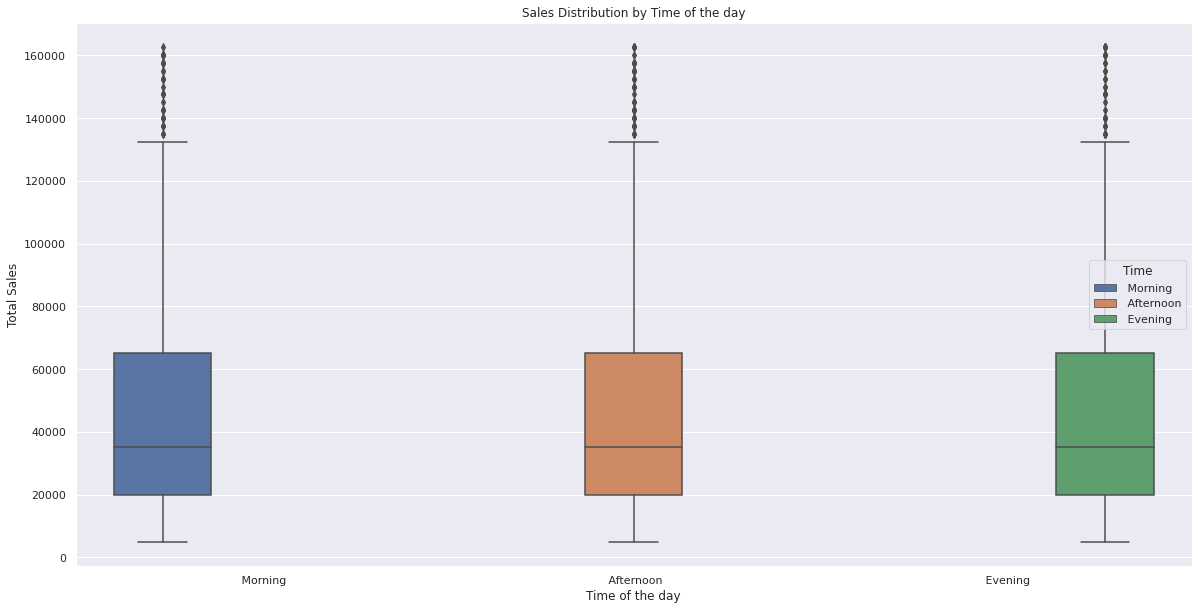

In [52]:
# Time-of-the-day sales distributions showing the fluctuation in sales as outliers

plt.figure(figsize=(20, 10))
sns.boxplot(x='Time', y='Sales', data=aal_sales_df, hue='Time')
plt.title('Sales Distribution by Time of the day')
plt.xlabel('Time of the day')
plt.ylabel('Total Sales')
plt.show()

#### Time-wise outliers count for the above boxplot distribution

In [53]:
# Finding the outliers in the above Time-wise Sales box-plot distribution
outliers_time_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', 'Time').groupby('Time')['Sales'].agg(['min', 'max', 'count'])
if len(outliers_time_sales) > 0 :
    print("\nOutliers for Sales by Time of Day:\n", outliers_time_sales)
else :
    print("\nNo Outliers for Sales by Time of Day")


Outliers for Sales by Time of Day:
                min     max  count
Time                             
 Afternoon  135000  162500     46
 Evening    135000  162500     40
 Morning    135000  162500     37


<b>Deduction:</b> The above analysis shows that all the Time have outliers data for Sales with <b>`Afternoon`</b> having the highest outliers count, and  <b>`Morning`</b> having the lowest outliers count.

#### ======================================================================================================

### Weekly Sales Analysis

#### Total Weekly Sales

In [54]:
# Finding total weekly sales
sum_weekly_sales_df = aal_sales_df.groupby(['Year', 'Week'])['Sales'].sum().reset_index()
sum_weekly_sales_df

,Year,Week,Sales
0,2020,40,15045000
1,2020,41,27002500
2,2020,42,26640000
3,2020,43,26815000
4,2020,44,21807500
5,2020,45,20865000
6,2020,46,21172500
7,2020,47,21112500
8,2020,48,21477500
9,2020,49,29622500


In [55]:
# Finding the min and max total weekly sales
if len(sum_weekly_sales_df) == 0 :
    print('No data found')
else :
    if len(sum_weekly_sales_df) > 0 :
        # Find the week with minimum sales
        min_tot_sales_week = sum_weekly_sales_df.iloc[sum_weekly_sales_df['Sales'].idxmin()]

        print(f'Week: {round(min_tot_sales_week.Week)} of Year: {round(min_tot_sales_week.Year)} has the lowest total Sales of {min_tot_sales_week.Sales}')

        # Find the week with maximum sales
        max_tot_sales_week = sum_weekly_sales_df.iloc[sum_weekly_sales_df['Sales'].idxmax()]

        print(f'Week: {round(max_tot_sales_week.Week)} of Year: {round(max_tot_sales_week.Year)} has the highest total Sales of {max_tot_sales_week.Sales}')
    else :
        print("Week: {} of Year: {} has total Sales of {}".format(round(sum_weekly_sales_df.iloc[0]['Week']), round(sum_weekly_sales_df.iloc[0]['Year']), sum_weekly_sales_df.iloc[0]['Sales']))

Week: 53 of Year: 2020 has the lowest total Sales of 13792500
Week: 52 of Year: 2020 has the highest total Sales of 31770000


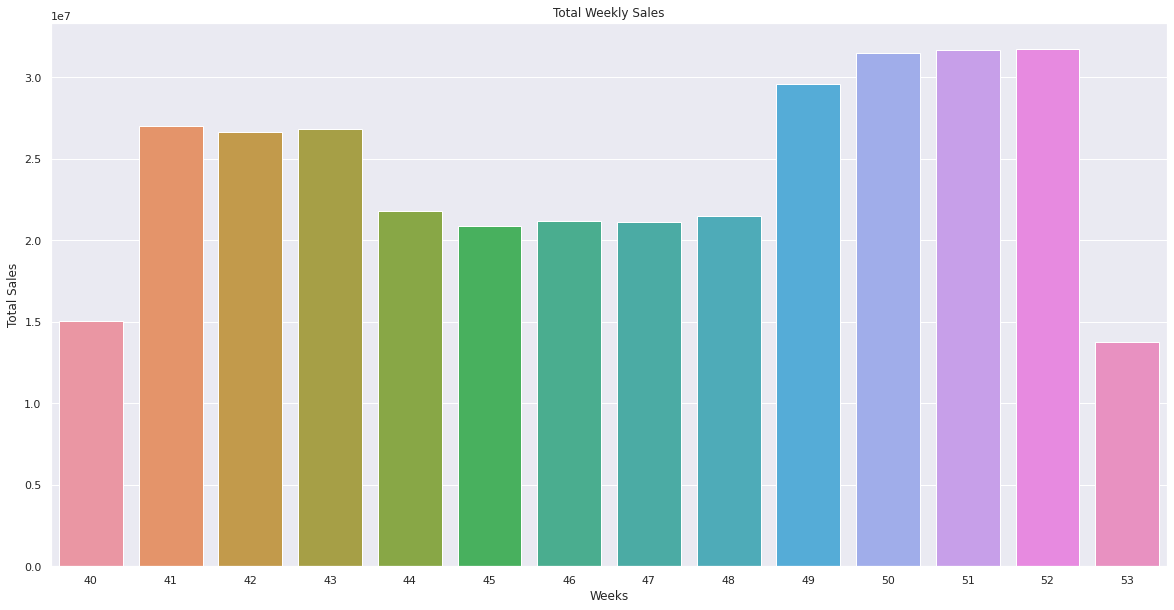

In [56]:
# Plotting the graph for total weekly sales
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data=sum_weekly_sales_df)
plt.title('Total Weekly Sales')
plt.xlabel('Weeks')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above weekly sales analysis shows that <b>`Week 52`</b> has the highest total sales and <b>`Week 53`</b> has the lowest total sales.
<br>However, it is also visible from the above plot that <b>`Week 49`</b>, <b>`Week 50`</b> and <b>`Week 51`</b> have also seen higher weekly total sales.

#### Average Weekly Sales

In [57]:
# Finding the average weekly sales
avg_weekly_sales_df = aal_sales_df.groupby(['Year', 'Week'])['Sales'].mean().reset_index()
avg_weekly_sales_df['Sales'] = round(avg_weekly_sales_df['Sales'], 2)
avg_weekly_sales_df

,Year,Week,Sales
0,2020,40,44776.79
1,2020,41,45922.62
2,2020,42,45306.12
3,2020,43,45603.74
4,2020,44,43268.85
5,2020,45,35484.69
6,2020,46,36007.65
7,2020,47,35905.61
8,2020,48,36526.36
9,2020,49,50378.40


In [58]:
# Finding the min and max average weekly sales
if len(avg_weekly_sales_df) == 0 :
    print('No data found')
else :
    if len(avg_weekly_sales_df) > 0 :
        # Find the week with minimum sales
        min_avg_sales_week = avg_weekly_sales_df.iloc[avg_weekly_sales_df['Sales'].idxmin()]

        print(f'Week: {round(min_avg_sales_week.Week)} of Year: {round(min_avg_sales_week.Year)} has the lowest total Sales of {min_avg_sales_week.Sales}')

        # Find the week with maximum sales
        max_avg_sales_week = avg_weekly_sales_df.iloc[avg_weekly_sales_df['Sales'].idxmax()]

        print(f'Week: {round(max_avg_sales_week.Week)} of Year: {round(max_avg_sales_week.Year)} has the highest total Sales of {max_avg_sales_week.Sales}')
    else :
        print("Week: {} of Year: {} has total Sales of {}".format(round(avg_weekly_sales_df.iloc[0]['Week']), round(avg_weekly_sales_df.iloc[0]['Year']), avg_weekly_sales_df.iloc[0]['Sales']))

Week: 45 of Year: 2020 has the lowest total Sales of 35484.69
Week: 53 of Year: 2020 has the highest total Sales of 54732.14


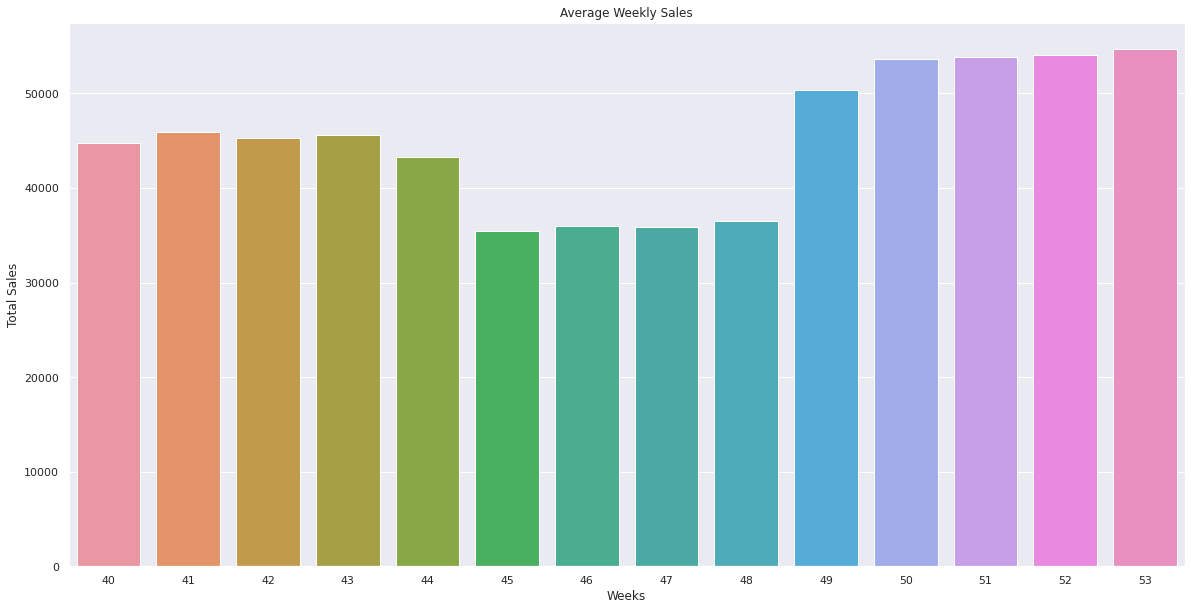

In [59]:
# Plotting the graph for average weekly sales
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data=avg_weekly_sales_df)
plt.title('Average Weekly Sales')
plt.xlabel('Weeks')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above weekly sales analysis shows that <b>`Week 53`</b> has the highest average sales and <b>`Week 45`</b> has the lowest average sales.
- It is also visible from the above plot that <b>`Week 49`</b>, <b>`Week 50`</b>, <b>`Week 51`</b> and <b>`Week 52`</b> have also seen higher weekly average sales.
- Another information revealed that, although <b>`Week 53`</b> has the lowest <b>Total</b> Week Sales, but it has the highest <b>Average</b> Weekly Sales

#### Weekly Sales Distribution

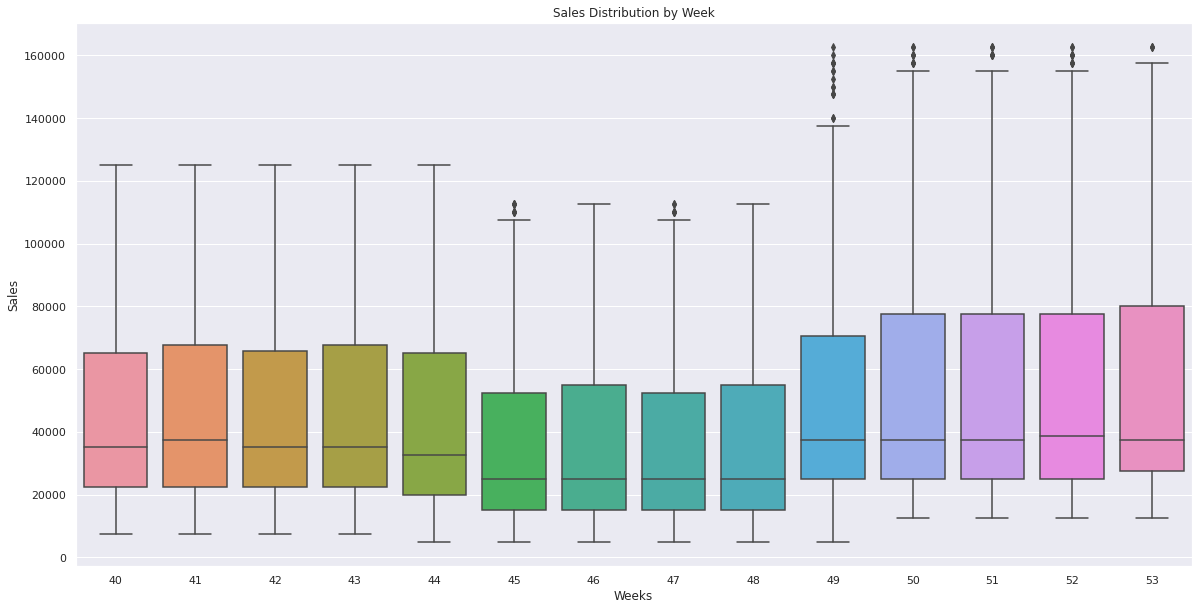

In [60]:
# Weeky sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Week', y='Sales', data=aal_sales_df)
plt.title('Sales Distribution by Week')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()

#### Weekly sales outliers count for the above boxplot distribution

In [61]:
# Finding the outliers in the above Weekly Sales box-plot distribution
outliers_week_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', 'Week').groupby('Week')['Sales'].agg(['min', 'max', 'count'])
if len(outliers_week_sales) > 0 :
    print("\nWeeks with Outliers for Weekly Sales:\n", outliers_week_sales)
else :
    print("\nNo Outliers for Weekly Sales")


Weeks with Outliers for Weekly Sales:
          min     max  count
Week                       
45    110000  112500      9
47    110000  112500      7
49    140000  162500     16
50    157500  162500      9
51    160000  162500      8
52    157500  162500     10
53    162500  162500      3


<b>Deduction:</b> The above Weekly Sales Analysis also reveals the presence of outliers data in the dataset. <b>`Week 49`</b> having the highest outliers and <b>`Week 53`</b> having the lowest outliers for Weekly Sales

##### ======================================================================================================

#### Weekly Group-wise Total Sales

In [62]:
# Grouping the data by 'Week' and 'Group' and sum the 'Sales'
weekly_tot_sales_by_group = aal_sales_df.groupby(['Week', 'Group'])['Sales'].sum().reset_index()
weekly_tot_sales_by_group

,Week,Group,Sales
0,40,Kids,3690000
1,40,Men,3730000
2,40,Seniors,3782500
3,40,Women,3842500
4,41,Kids,7020000
5,41,Men,6807500
6,41,Seniors,6737500
7,41,Women,6437500
8,42,Kids,6707500
9,42,Men,6710000


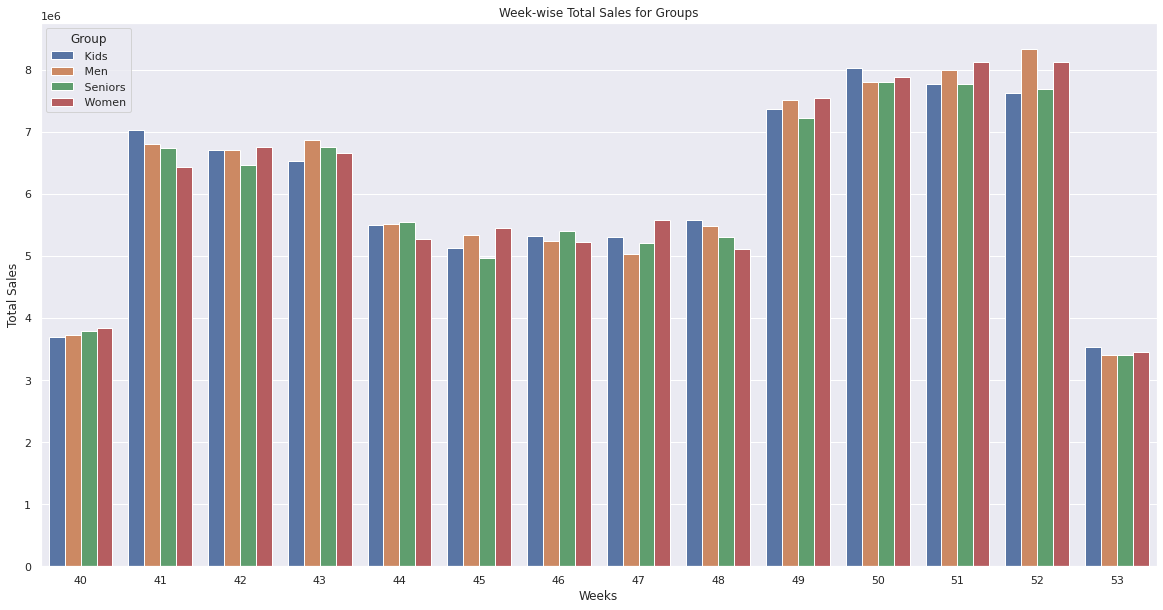

In [63]:
# Plotting the total week-wise sales data for each group on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data=weekly_tot_sales_by_group, hue='Group')
plt.title('Week-wise Total Sales for Groups')
plt.xlabel('Weeks')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Weekly Group-wise Total Sales analysis shows that 
- <b>`Week 50`</b>, <b>`Week 51`</b> and <b>`Week 52`</b> have the highest Weekly Group-wise Total Sales for all the Groups. 
- <b>`Week 40`</b> and <b>`Week 53`</b> have the lowest Weekly Group-wise Total Sales for all the Groups.

#### Weekly Group-wise Average Sales

In [64]:
# Grouping the data by 'Week' and 'Group' and mean of the 'Sales'
weekly_avg_sales_by_group = aal_sales_df.groupby(['Week', 'Group'])['Sales'].mean().reset_index()
weekly_avg_sales_by_group['Sales'] = round(weekly_avg_sales_by_group['Sales'], 2)
weekly_avg_sales_by_group

,Week,Group,Sales
0,40,Kids,43928.57
1,40,Men,44404.76
2,40,Seniors,45029.76
3,40,Women,45744.05
4,41,Kids,47755.10
5,41,Men,46309.52
6,41,Seniors,45833.33
7,41,Women,43792.52
8,42,Kids,45629.25
9,42,Men,45646.26


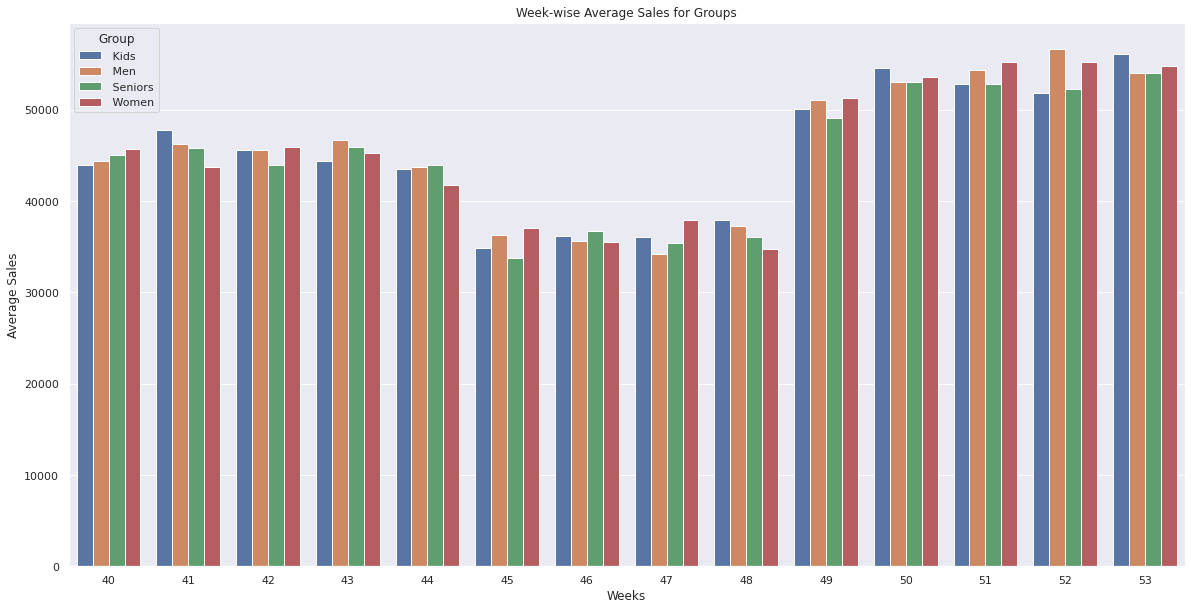

In [65]:
# Plotting the avg week-wise sales data for each group on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data=weekly_avg_sales_by_group, hue='Group')
plt.title('Week-wise Average Sales for Groups')
plt.xlabel('Weeks')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Weekly Group-wise Average Sales analysis shows that 
- <b>`Week 50`</b>, <b>`Week 51`</b>, <b>`Week 52`</b> and <b>`Week 53`</b> have higher Weekly Group-wise Average Sales for all the Groups than any other weeks. 
- <b>`Week 45`</b>, <b>`Week 46`</b>, <b>`Week 47`</b> and <b>`Week 48`</b> have lower Weekly Group-wise Average Sales for all the Groups than any other weeks.

#### Weekly Group-wise Sales Distribution

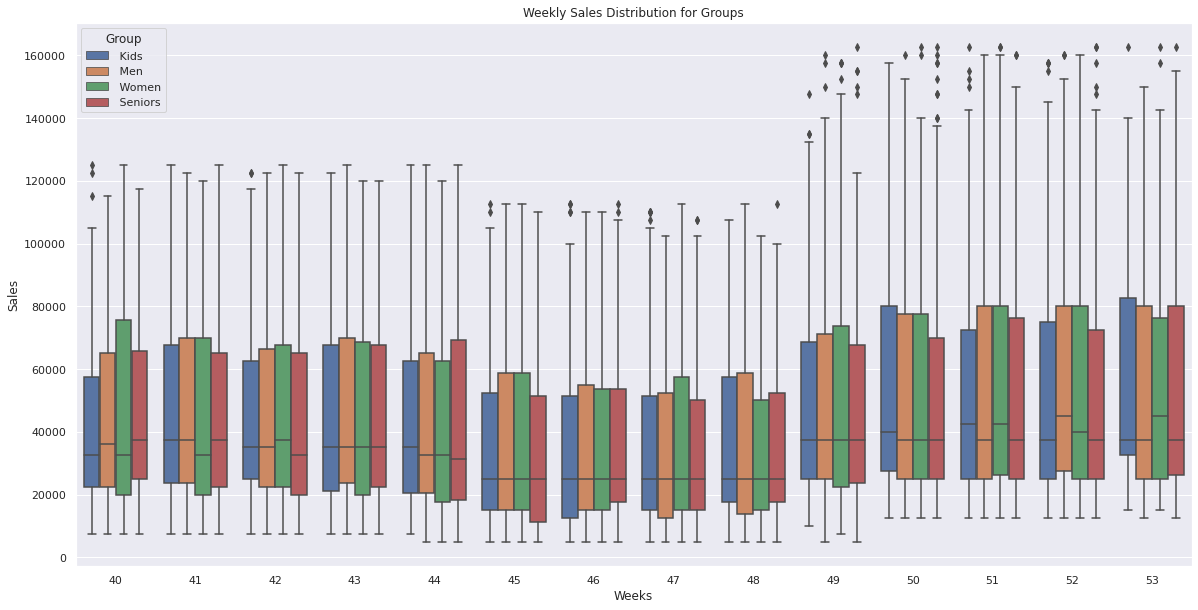

In [66]:
# Weeky Group-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Week', y='Sales', data=aal_sales_df, hue='Group')
plt.title('Weekly Sales Distribution for Groups')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()

#### Weekly Group-wise sales outliers count for the above boxplot distribution

In [67]:
# Finding the outliers in the above Weekly Group-wise Sales box-plot distribution
outliers_week_group_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Week', 'Group']).groupby(['Week', 'Group'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_week_group_sales) > 0 :
    print("\nWeeks with Group-wise Outliers for Weekly Sales:\n", outliers_week_group_sales)
else :
    print("\nNo Week with Group-wise Outliers for Weekly Sales")


Weeks with Group-wise Outliers for Weekly Sales:
                   min     max  count
Week Group                          
40    Kids     115000  125000      3
42    Kids     122500  122500      2
45    Kids     110000  112500      2
46    Kids     110000  112500      4
      Seniors  110000  112500      2
47    Kids     107500  110000      5
      Seniors  107500  107500      2
48    Seniors  112500  112500      1
49    Kids     135000  147500      3
      Men      150000  160000      3
      Seniors  147500  162500      5
      Women    152500  157500      4
50    Men      160000  160000      1
      Seniors  140000  162500      9
      Women    160000  162500      2
51    Kids     150000  162500      4
      Seniors  160000  160000      2
      Women    162500  162500      2
52    Kids     155000  157500      4
      Men      160000  160000      2
      Seniors  147500  162500      5
53    Kids     162500  162500      1
      Seniors  162500  162500      1
      Women    157500  1

<b>Deduction:</b> The above Weekly Group-wise Average Sales analysis to determine the presence of outliers shows: 
- <b>`Week 49`</b> has the highest outliers for Weekly Group-wise Sales. <b>`Week 49`</b> has outlies for all the Groups
- <b>`Week 42`</b> and <b>`Week 45`</b>, have the lowest outliers for Weekly Group-wise Sales. 

##### ======================================================================================================

#### Weekly State-wise Total Sales

In [68]:
# Grouping the data by 'Week' and 'State' and sum the 'Sales'
weekly_tot_sales_by_state = aal_sales_df.groupby(['Week', 'State'])['Sales'].sum().reset_index()
weekly_tot_sales_by_state

,Week,State,Sales
0,40,NSW,3382500
1,40,NT,1052500
2,40,QLD,1627500
3,40,SA,2542500
4,40,TAS,1052500
...,...,...,...
93,53,QLD,1460000
94,53,SA,2312500
95,53,TAS,1002500
96,53,VIC,4190000


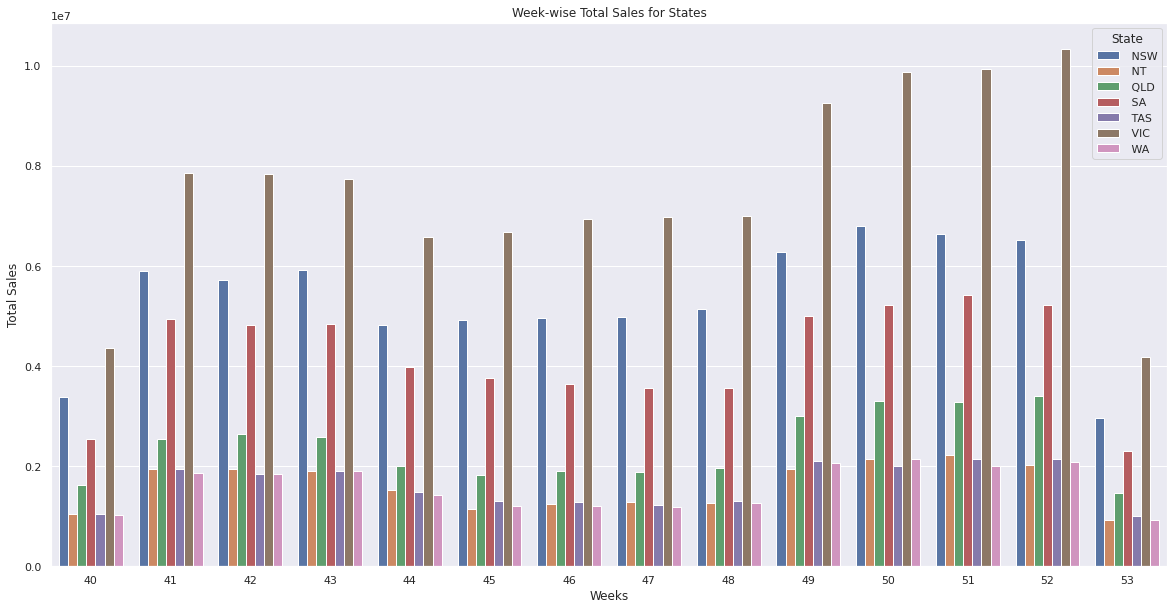

In [69]:
# Plotting the total week-wise sales data for each state on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data=weekly_tot_sales_by_state, hue='State')
plt.title('Week-wise Total Sales for States')
plt.xlabel('Weeks')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Weekly State-wise Total Sales analysis shows:
- State <b>`VIC`</b> has the highest Total Sales across all the Weeks.
- States like <b>`WA`</b>, <b>`TAS`</b> and <b>`NT`</b> shows lower Total States across all the Weeeks

#### Weekly State-wise Average Sales

In [70]:
# Grouping the data by 'Week' and 'State' and mean of the 'Sales'
weekly_avg_sales_by_state = aal_sales_df.groupby(['Week', 'State'])['Sales'].mean().reset_index()
weekly_avg_sales_by_state['Sales'] = round(weekly_avg_sales_by_state['Sales'], 2)
weekly_avg_sales_by_state

,Week,State,Sales
0,40,NSW,70468.75
1,40,NT,21927.08
2,40,QLD,33906.25
3,40,SA,52968.75
4,40,TAS,21927.08
...,...,...,...
93,53,QLD,40555.56
94,53,SA,64236.11
95,53,TAS,27847.22
96,53,VIC,116388.89


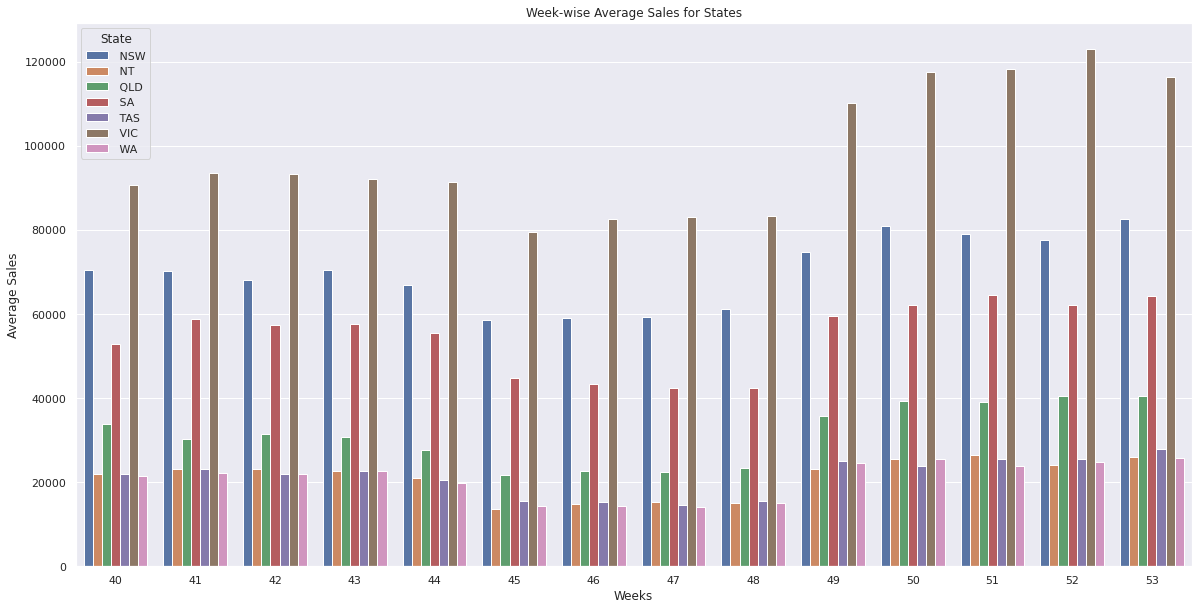

In [71]:
# Plotting the avg week-wise sales data for each state on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data= weekly_avg_sales_by_state, hue='State')
plt.title('Week-wise Average Sales for States')
plt.xlabel('Weeks')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Weekly State-wise Average Sales analysis shows:
- State <b>`VIC`</b> has the highest Average Sales across all the Weeks.
- States like <b>`WA`</b>, <b>`TAS`</b> and <b>`NT`</b> shows lower Average States across all the Weeeks

#### Weekly State-wise Sales Distribution

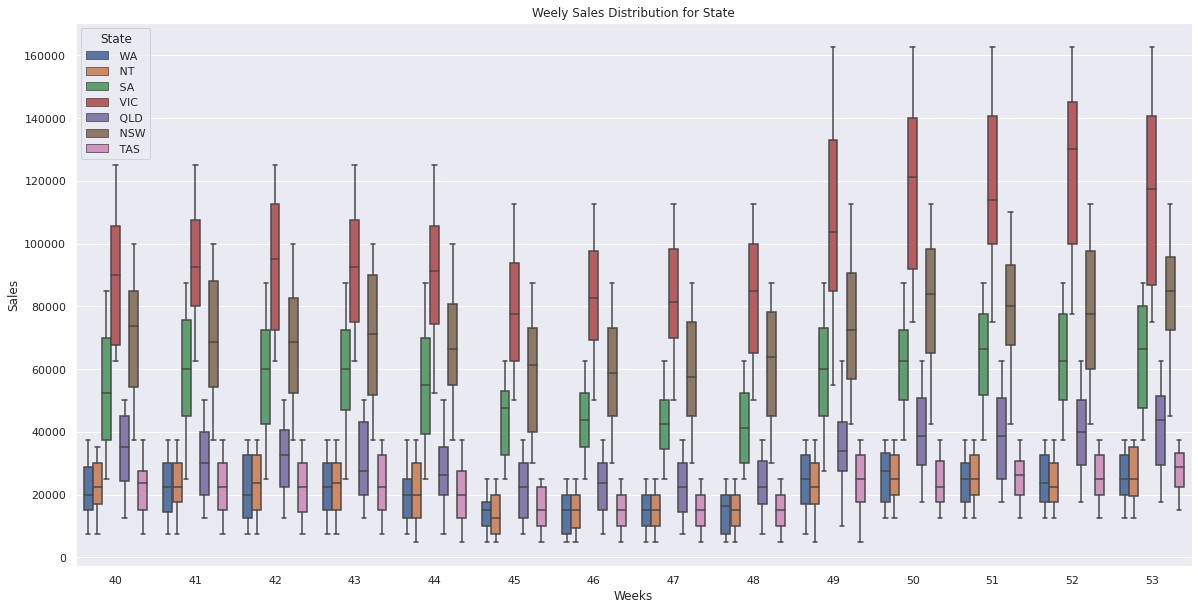

In [72]:
# Weeky State-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Week', y='Sales', data=aal_sales_df, hue='State')
plt.title('Weely Sales Distribution for State')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()

#### Weekly State-wise sales outliers count for the above boxplot distribution

In [73]:
# Finding the outliers in the above Weekly State-wise Sales box-plot distribution
outliers_week_state_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Week', 'State']).groupby(['Week', 'State'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_week_state_sales) > 0 :
    print("\nWeeks with State-wise Outliers for Weekly Sales:\n", outliers_week_sales)
else :
    print("\nNo Week with State-wise Outliers for Weekly Sales")


No Week with State-wise Outliers for Weekly Sales


<b>Deduction:</b> There is no outlier data for the Weekly Sales of any of the States

##### ======================================================================================================

#### Weekly Time-wise Total Sales

In [74]:
# Grouping the data by 'Week' and 'Time' and sum the 'Sales'
weekly_tot_sales_by_time = aal_sales_df.groupby(['Week', 'Time'])['Sales'].sum().reset_index()
weekly_tot_sales_by_time

,Week,Time,Sales
0,40,Afternoon,4815000
1,40,Evening,5047500
2,40,Morning,5182500
3,41,Afternoon,8817500
4,41,Evening,9085000
5,41,Morning,9100000
6,42,Afternoon,8942500
7,42,Evening,8815000
8,42,Morning,8882500
9,43,Afternoon,8782500


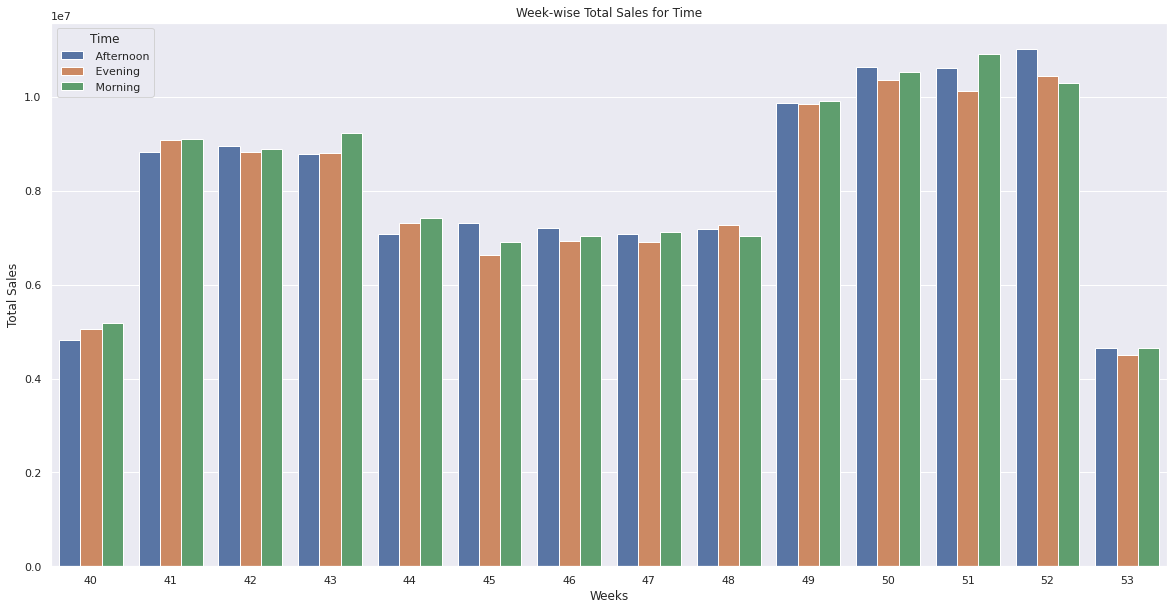

In [75]:
# Plotting the total week-wise sales data for each time of day on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data=weekly_tot_sales_by_time, hue='Time')
plt.title('Week-wise Total Sales for Time')
plt.xlabel('Weeks')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Weekly Time-wise Total Sales Analysis shows that:
- <b>`Week 50`</b>, <b>`Week 51`</b> and <b>`Week 52`</b> have the highest Weekly Time-wise Total Sales for all the Groups. 
- <b>`Week 40`</b> and <b>`Week 53`</b> have the lowest Weekly Time-wise Total Sales for all the Groups.

#### Weekly Time-wise Average Sales

In [76]:
# Grouping the data by 'Week' and 'Time' and mean of the 'Sales'
weekly_avg_sales_by_time = aal_sales_df.groupby(['Week', 'Time'])['Sales'].mean().reset_index()
weekly_avg_sales_by_time['Sales'] = round(weekly_avg_sales_by_time['Sales'], 2)
weekly_avg_sales_by_time

,Week,Time,Sales
0,40,Afternoon,42991.07
1,40,Evening,45066.96
2,40,Morning,46272.32
3,41,Afternoon,44987.24
4,41,Evening,46352.04
5,41,Morning,46428.57
6,42,Afternoon,45625.00
7,42,Evening,44974.49
8,42,Morning,45318.88
9,43,Afternoon,44808.67


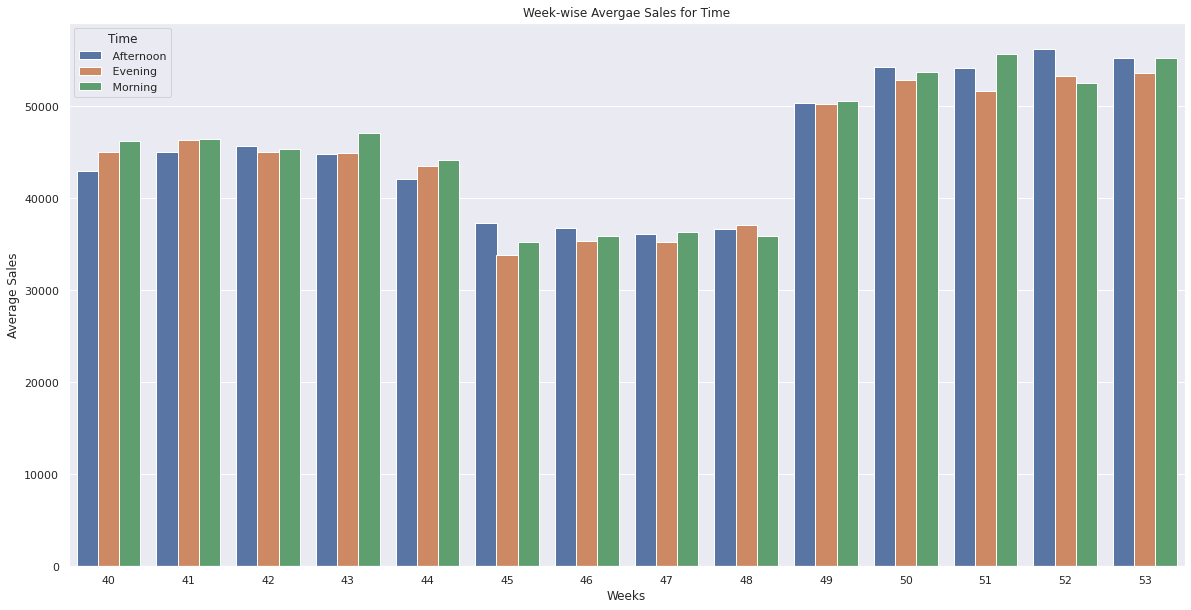

In [77]:
# Plotting the avg week-wise sales data for each time of day on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Week', y='Sales', data= weekly_avg_sales_by_time, hue='Time')
plt.title('Week-wise Avergae Sales for Time')
plt.xlabel('Weeks')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Weekly Time-wise Average Sales analysis shows that 
- <b>`Week 50`</b>, <b>`Week 51`</b>, <b>`Week 52`</b> and <b>`Week 53`</b> have higher Weekly Time-wise Average Sales for all the Groups than any other weeks. 
- <b>`Week 45`</b>, <b>`Week 46`</b>, <b>`Week 47`</b> and <b>`Week 48`</b> have lower Weekly Time-wise Average Sales for all the Groups than any other weeks.

#### Weekly Time-wise Sales Distribution

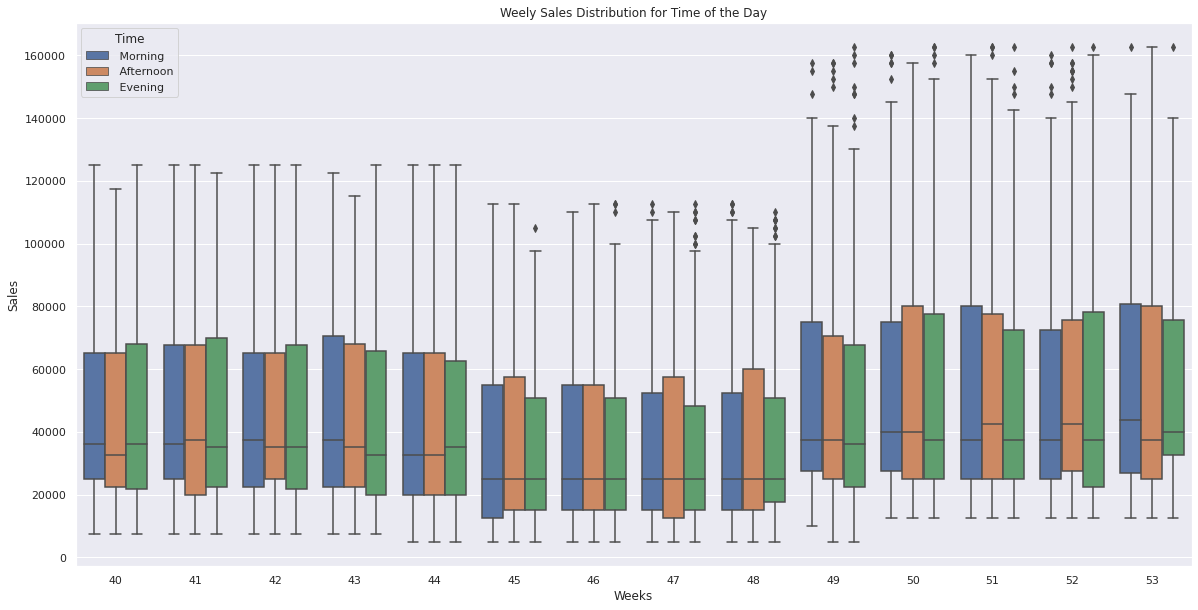

In [78]:
# Weeky Time-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Week', y='Sales', data=aal_sales_df, hue='Time')
plt.title('Weely Sales Distribution for Time of the Day')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()

#### Weekly Time-wise sales outliers count for the above boxplot distribution

In [79]:
# Finding the outliers in the above Weekly Time-wise Sales box-plot distribution
outliers_week_time_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Week', 'Time']).groupby(['Week', 'Time'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_week_time_sales) > 0 :
    print("\nWeeks with Time-wise Outliers for Weekly Sales:\n", outliers_week_time_sales)
else :
    print("\nNo Week with Time-wise Outliers for Weekly Sales")


Weeks with Time-wise Outliers for Weekly Sales:
                     min     max  count
Week Time                             
45    Evening    105000  105000      1
46    Evening    110000  112500      3
47    Evening    100000  112500      9
      Morning    110000  112500      2
48    Evening    102500  110000      8
      Morning    110000  112500      4
49    Afternoon  150000  157500      5
      Evening    137500  162500      8
      Morning    147500  157500      3
50    Evening    157500  162500      4
      Morning    152500  160000      5
51    Afternoon  160000  162500      3
      Evening    147500  162500      4
52    Afternoon  150000  162500      8
      Evening    162500  162500      1
      Morning    147500  160000      5
53    Evening    162500  162500      1
      Morning    162500  162500      1


<b>Deduction:</b> The above Weekly Group-wise Average Sales analysis to determine the presence of outliers shows: 
- <b>`Week 49`</b> has the highest outliers for Weekly Group-wise Sales. <b>`Week 49`</b> has outlies for all the Time of the Day
- <b>`Week 45`</b> has the lowest outliers for Weekly Group-wise Sales. 

## ======================================================================

### Monthly Sales Analysis

#### Total Monthly Sales

In [80]:
# Finding total monthly Sales
sum_monthly_sales_df = aal_sales_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
sum_monthly_sales_df

,Year,Month,Sales
0,2020,10,114290000
1,2020,11,90682500
2,2020,12,135330000


In [81]:
# Finding the min and max total monthly sales
if len(sum_monthly_sales_df) == 0 :
    print('No data found')
else :
    if len(sum_monthly_sales_df) > 0 :
        # Find the month with minimum sales
        min_tot_sales_month = sum_monthly_sales_df.iloc[sum_monthly_sales_df['Sales'].idxmin()]

        print(f'Month: {round(min_tot_sales_month.Month)}({calendar.month_name[round(min_tot_sales_month.Month)]}) of Year: {round(min_tot_sales_month.Year)} has the lowest total Sales of {min_tot_sales_month.Sales}')

        # Find the month with maximum sales
        max_tot_sales_month = sum_monthly_sales_df.iloc[sum_monthly_sales_df['Sales'].idxmax()]

        print(f'Month: {round(max_tot_sales_month.Month)}({calendar.month_name[round(max_tot_sales_month.Month)]}) of Year: {round(max_tot_sales_month.Year)} has the highest total Sales of {max_tot_sales_month.Sales}')
    else :
        print("Month: {}({}) of Year: {} has total Sales of {}".format(round(sum_monthly_sales_df.iloc[0]['Month']), {calendar.month_name[round(sum_monthly_sales_df.iloc[0]['Month'])]}, round(sum_monthly_sales_df.iloc[0]['Year']), sum_monthly_sales_df.iloc[0]['Sales']))

Month: 11(November) of Year: 2020 has the lowest total Sales of 90682500
Month: 12(December) of Year: 2020 has the highest total Sales of 135330000


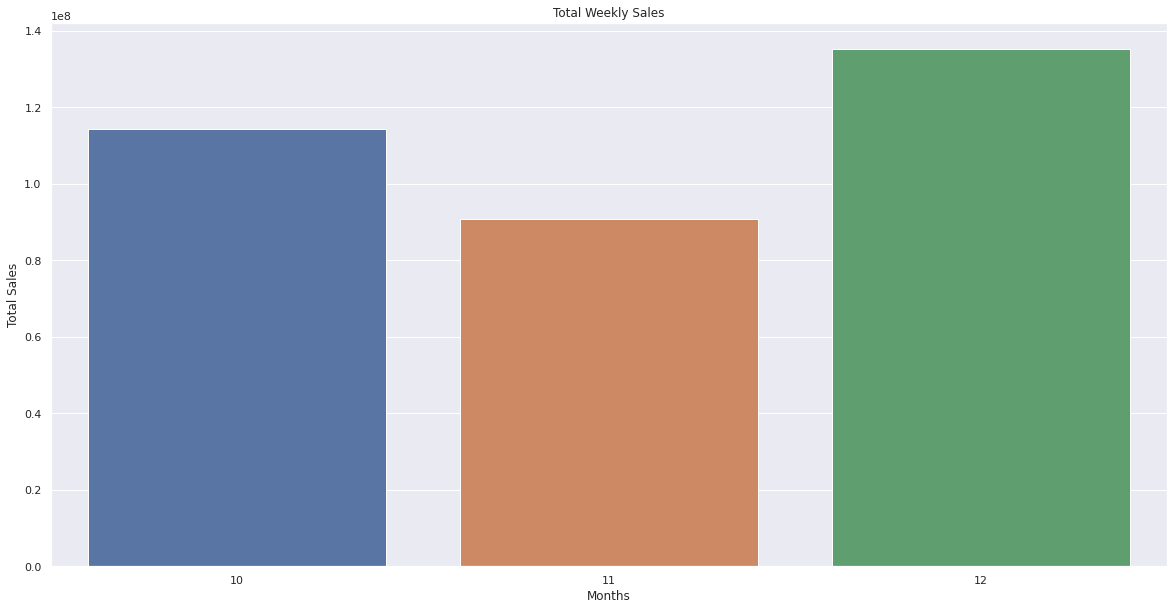

In [82]:
# Plotting total monthly Sales
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data=sum_monthly_sales_df)
plt.title('Total Weekly Sales')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above monthly Total Sales analysis shows that <b>`Month 12`</b> has the highest Total Sales and <b>`Month 11`</b> has the lowest Total Sales.

#### Average Monthly Sales

In [83]:
# Finding average Monthly Sales
avg_monthly_sales_df = aal_sales_df.groupby(['Year', 'Month'])['Sales'].mean().reset_index()
avg_monthly_sales_df['Sales'] = round(avg_monthly_sales_df['Sales'],2)
avg_monthly_sales_df

,Year,Month,Sales
0,2020,10,45353.17
1,2020,11,35985.12
2,2020,12,53702.38


In [84]:
# Finding the min and max average monthly sales
if len(avg_monthly_sales_df) == 0 :
    print('No data found')
else :
    if len(sum_monthly_sales_df) > 0 :
        # Find the month with minimum sales
        min_avg_sales_month = avg_monthly_sales_df.iloc[avg_monthly_sales_df['Sales'].idxmin()]

        print(f'Month: {round(min_avg_sales_month.Month)}({calendar.month_name[round(min_avg_sales_month.Month)]}) of Year: {round(min_avg_sales_month.Year)} has the lowest total Sales of {min_avg_sales_month.Sales}')

        # Find the month with maximum sales
        max_avg_sales_month = avg_monthly_sales_df.iloc[avg_monthly_sales_df['Sales'].idxmax()]

        print(f'Month: {round(max_avg_sales_month.Month)}({calendar.month_name[round(max_avg_sales_month.Month)]}) of Year: {round(max_avg_sales_month.Year)} has the highest total Sales of {max_avg_sales_month.Sales}')
    else :
        print("Month: {}({}) of Year: {} has total Sales of {}".format(round(avg_monthly_sales_df.iloc[0]['Month']), calendar.month_name[round(avg_monthly_sales_df.iloc[0]['Month'])], round(avg_monthly_sales_df.iloc[0]['Year']), avg_monthly_sales_df.iloc[0]['Sales']))

Month: 11(November) of Year: 2020 has the lowest total Sales of 35985.12
Month: 12(December) of Year: 2020 has the highest total Sales of 53702.38


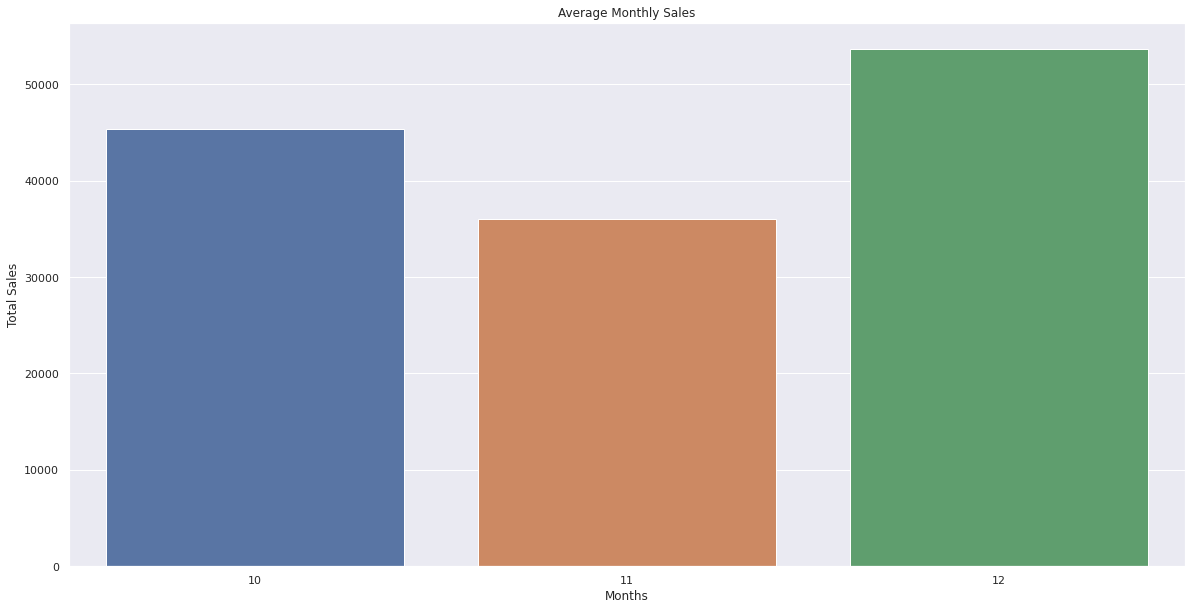

In [85]:
# Plotting average Monthly Sales
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data=avg_monthly_sales_df)
plt.title('Average Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above monthly Average Sales analysis shows that <b>`Month 12`</b> has the highest Average Sales and <b>`Month 11`</b> has the lowest Average Sales.

#### Monthly Sales Distribution

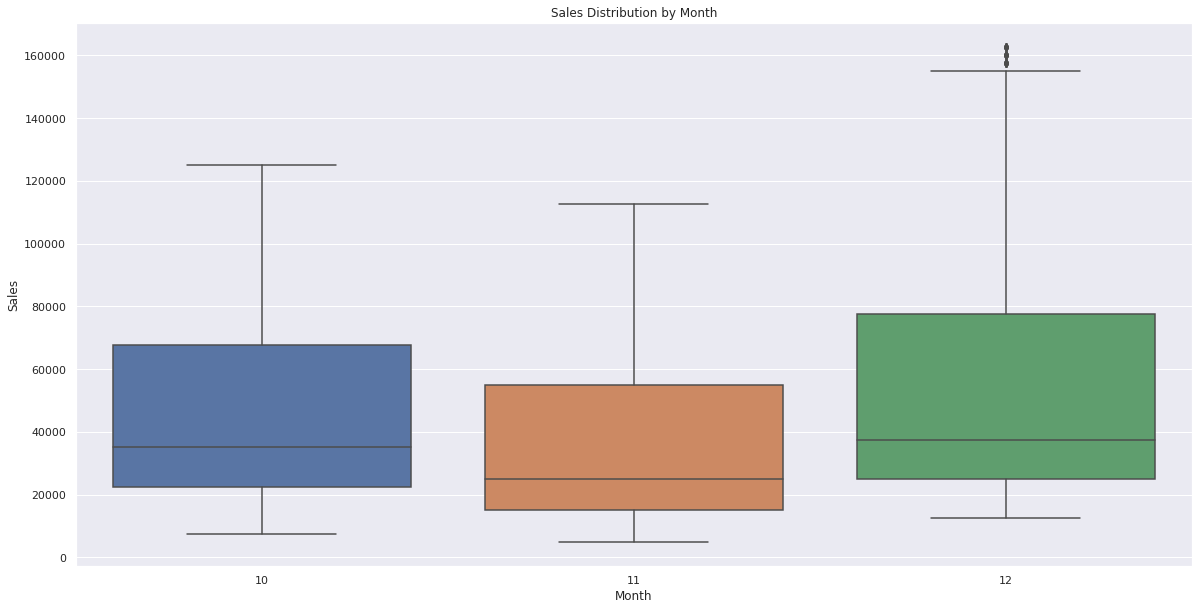

In [86]:
# Monthly sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Month', y='Sales', data=aal_sales_df)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#### Monthly sales outliers count for the above boxplot distribution

In [87]:
# Finding the outliers in the above Monthly Sales box-plot distribution
outliers_month_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', 'Month').groupby('Month')['Sales'].agg(['min', 'max', 'count'])
if len(outliers_month_sales) > 0 :
    print("\nOutliers for Monthly Sales:\n", outliers_month_sales)
else :
    print("\nNo Outliers for Monthly Sales")


Outliers for Monthly Sales:
           min     max  count
Month                       
12     157500  162500     37


<b>Deduction:</b> The analysis for outliers for Monthly Sales shows that <b>`Month 12`</b> have outliers

##### ======================================================================================================

#### Monthly Group-wise Total Sales

In [88]:
# Grouping the data by 'Month' and 'Group' and sum the 'Sales'
monthly_tot_sales_by_group = aal_sales_df.groupby(['Month', 'Group'])['Sales'].sum().reset_index()
monthly_tot_sales_by_group

,Month,Group,Sales
0,10,Kids,28635000
1,10,Men,28885000
2,10,Seniors,28565000
3,10,Women,28205000
4,11,Kids,22882500
5,11,Men,22615000
6,11,Seniors,22322500
7,11,Women,22862500
8,12,Kids,33555000
9,12,Men,34250000


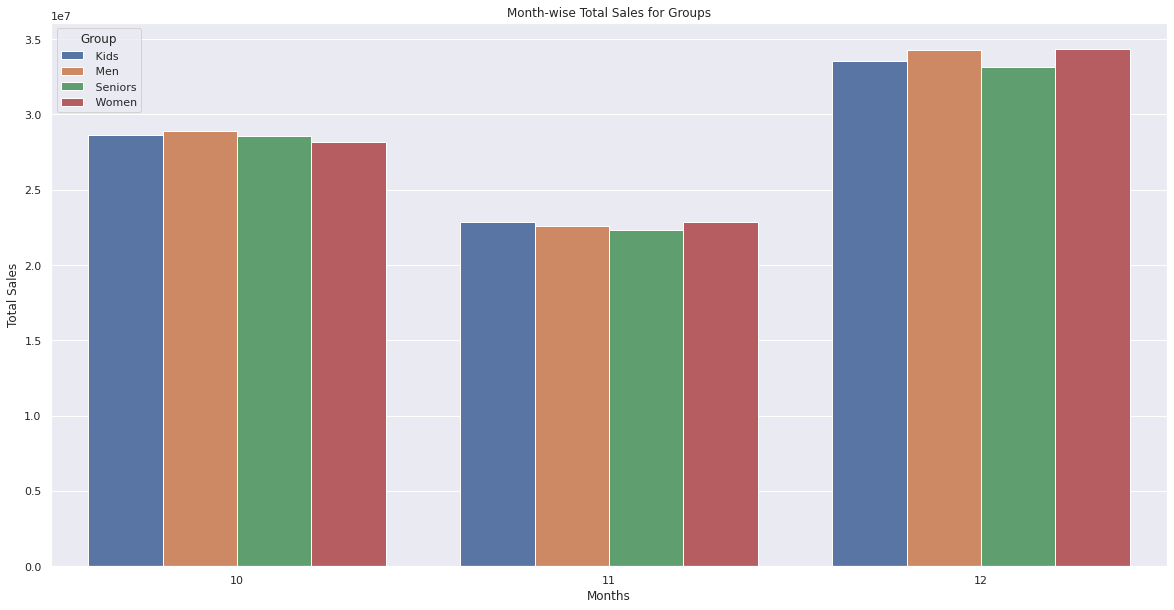

In [89]:
# Plotting the total month-wise sales data for each group on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data=monthly_tot_sales_by_group, hue='Group')
plt.title('Month-wise Total Sales for Groups')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Monthly Group-wise Total Sales analysis shows that:
- <b>`Month 12`</b> has the Highest Total Monthly Sales
- <b>`Month 11`</b> has the Lowest Total Monthly Sales.

#### Monthly Time-wise Average Sales

In [90]:
# Grouping the data by 'Month' and 'Group' and mean of the 'Sales'
monthly_avg_sales_by_group = aal_sales_df.groupby(['Month', 'Group'])['Sales'].mean().reset_index()
monthly_avg_sales_by_group['Sales'] = round(monthly_avg_sales_by_group['Sales'], 2)
monthly_avg_sales_by_group

,Month,Group,Sales
0,10,Kids,45452.38
1,10,Men,45849.21
2,10,Seniors,45341.27
3,10,Women,44769.84
4,11,Kids,36321.43
5,11,Men,35896.83
6,11,Seniors,35432.54
7,11,Women,36289.68
8,12,Kids,53261.90
9,12,Men,54365.08


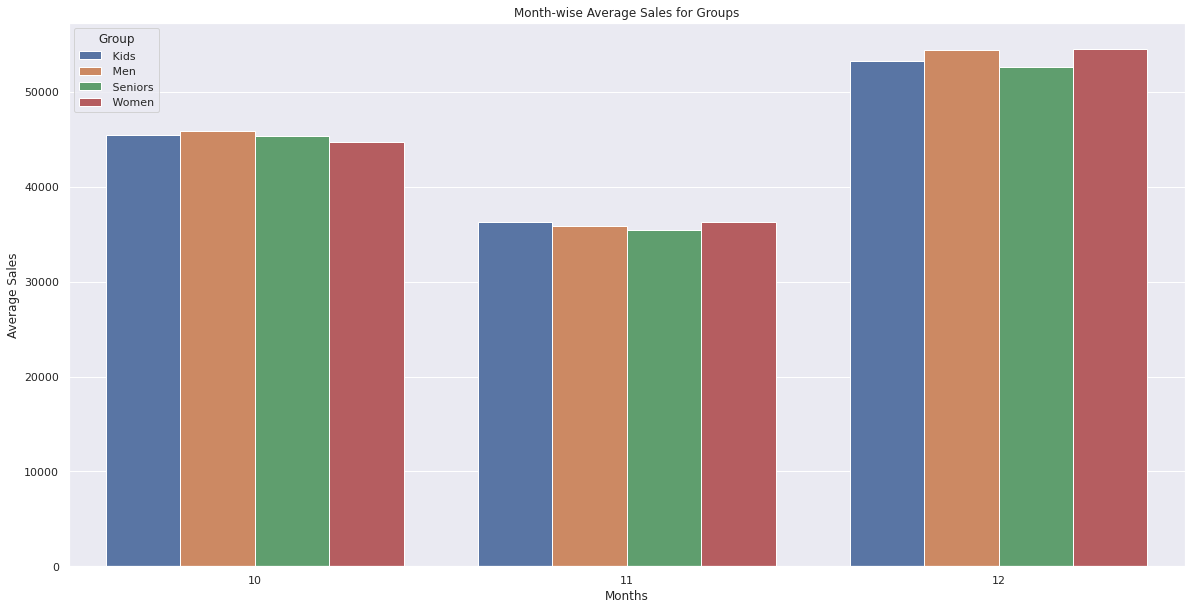

In [91]:
# Plotting the avg month-wise sales data for each group on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data= monthly_avg_sales_by_group, hue='Group')
plt.title('Month-wise Average Sales for Groups')
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Monthly Group-wise Average Sales analysis shows that:
- <b>`Month 12`</b> has the Highest Average Monthly Sales
- <b>`Month 11`</b> has the Lowest Average Monthly Sales.

#### Monthly Group-wise Sales Distribution

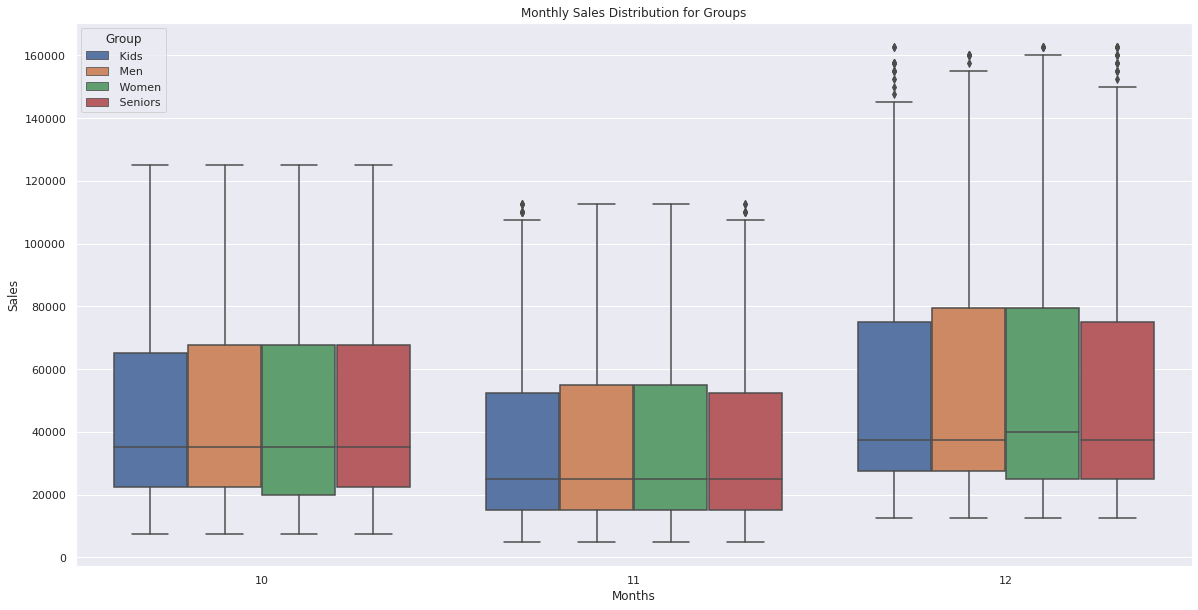

In [92]:
# Monthly Group-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Month', y='Sales', data=aal_sales_df, hue='Group')
plt.title('Monthly Sales Distribution for Groups')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

#### Monthly Group-wise sales outliers count for the above boxplot distribution

In [93]:
# Finding the outliers in the above Monthly Group-wise Sales box-plot distribution
outliers_month_group_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Month', 'Group']).groupby(['Month', 'Group'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_month_group_sales) > 0 :
    print("\Months with Group-wise Outliers for Monthly Sales:\n", outliers_month_group_sales)
else :
    print("\nNo Month with Group-wise Outliers for Monthly Sales")

\Months with Group-wise Outliers for Monthly Sales:
                    min     max  count
Month Group                          
11     Kids     110000  112500     10
       Seniors  110000  112500      6
12     Kids     147500  162500     13
       Men      157500  160000      7
       Seniors  152500  162500     15
       Women    162500  162500      4


<b>Deduction:</b> The above Monthly Group-wise Sales analysis for detecting outliers shows that:
- <b>`Month 12`</b> has the highest outliers
<b>`Month 12`</b> has outliers for all the Groups
- <b>`Month 10`</b> has no outliers

##### ======================================================================================================

#### Monthly State-wise Total Sales

In [94]:
# Grouping the data by 'Month' and 'State' and sum the 'Sales'
monthly_tot_sales_by_state = aal_sales_df.groupby(['Month', 'State'])['Sales'].sum().reset_index()
monthly_tot_sales_by_state

,Month,State,Sales
0,10,NSW,25007500
1,10,NT,8222500
2,10,QLD,11120000
3,10,SA,20610000
4,10,TAS,8015000
5,10,VIC,33442500
6,10,WA,7872500
7,11,NSW,21490000
8,11,NT,5257500
9,11,QLD,8110000


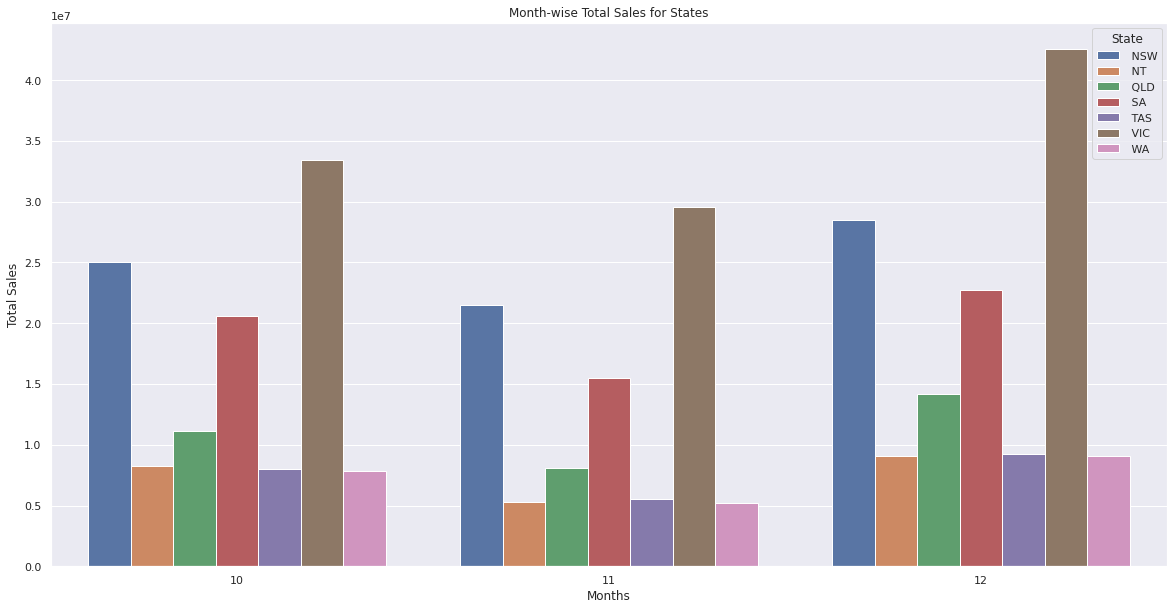

In [95]:
# Plotting the total month-wise sales data for each State on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data=monthly_tot_sales_by_state, hue='State')
plt.title('Month-wise Total Sales for States')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Monthly State-wise Total Sales analysis shows:
- State <b>`VIC`</b> has the highest Total Sales across all the Months.
- States like <b>`WA`</b>, <b>`TAS`</b> and <b>`NT`</b> shows lower Total States across all the Months

#### Monthly State-wise Average Sales

In [96]:
# Grouping the data by 'Month' and 'State' and sum the 'Sales'
monthly_avg_sales_by_state = aal_sales_df.groupby(['Month', 'State'])['Sales'].mean().reset_index()
monthly_avg_sales_by_state['Sales'] = round(monthly_avg_sales_by_state['Sales'], 2)
monthly_avg_sales_by_state

,Month,State,Sales
0,10,NSW,69465.28
1,10,NT,22840.28
2,10,QLD,30888.89
3,10,SA,57250.00
4,10,TAS,22263.89
5,10,VIC,92895.83
6,10,WA,21868.06
7,11,NSW,59694.44
8,11,NT,14604.17
9,11,QLD,22527.78


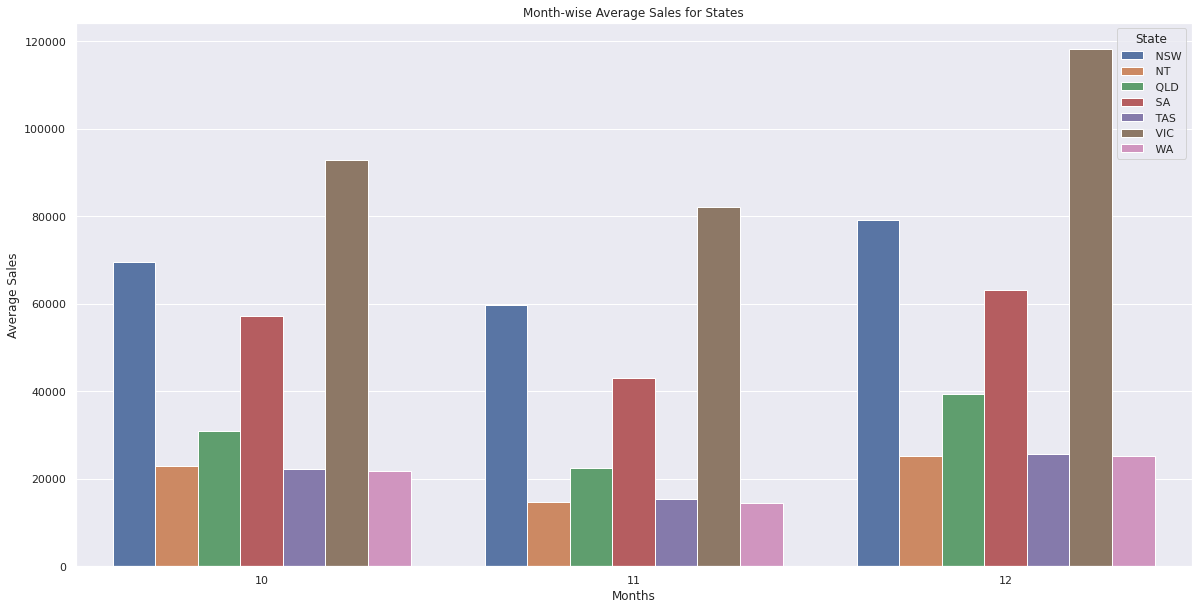

In [97]:
# Plotting the avg month-wise sales data for each state on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data=monthly_avg_sales_by_state, hue='State')
plt.title('Month-wise Average Sales for States')
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Monthly State-wise Average Sales analysis shows:
- State <b>`VIC`</b> has the highest Average Sales across all the Months.
- States like <b>`WA`</b>, <b>`TAS`</b> and <b>`NT`</b> shows lower Average States across all the Months

#### Monthly State-wise Sales Distribution

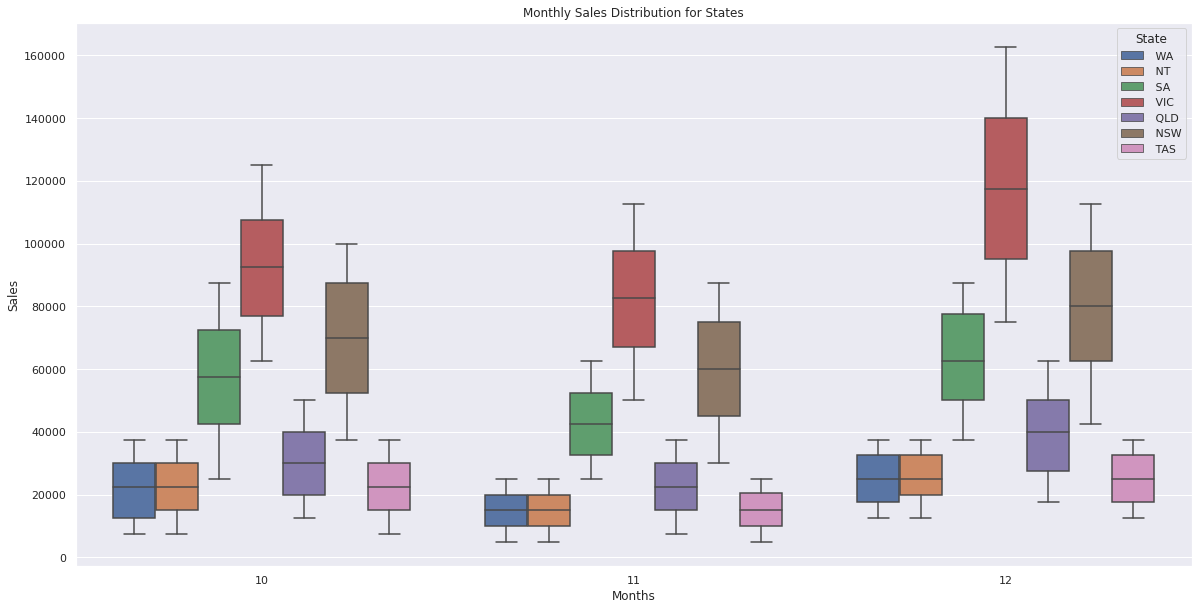

In [98]:
# Monthly State-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Month', y='Sales', data=aal_sales_df, hue='State')
plt.title('Monthly Sales Distribution for States')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

#### Monthly State-wise sales outliers count for the above boxplot distribution

In [99]:
# Finding the outliers in the above Monthly State-wise Sales box-plot distribution
outliers_month_state_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Month', 'State']).groupby(['Month', 'State'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_month_state_sales) > 0 :
    print("\Months with State-wise Outliers for Monthly Sales:\n", outliers_month_state_sales)
else :
    print("\nNo Month with State-wise Outliers for Monthly Sales")


No Month with State-wise Outliers for Monthly Sales


<b>Deduction:</b> There is no outlier data for the Monthly Sales of any of the States

##### ======================================================================================================

#### Monthly Time-wise Total Sales

In [100]:
# Grouping the data by 'Month' and 'Time' and sum the 'Sales'
monthly_tot_sales_by_time = aal_sales_df.groupby(['Month', 'Time'])['Sales'].sum().reset_index()
monthly_tot_sales_by_time

,Month,Time,Sales
0,10,Afternoon,37432500
1,10,Evening,38040000
2,10,Morning,38817500
3,11,Afternoon,30757500
4,11,Evening,29745000
5,11,Morning,30180000
6,12,Afternoon,45817500
7,12,Evening,44302500
8,12,Morning,45210000


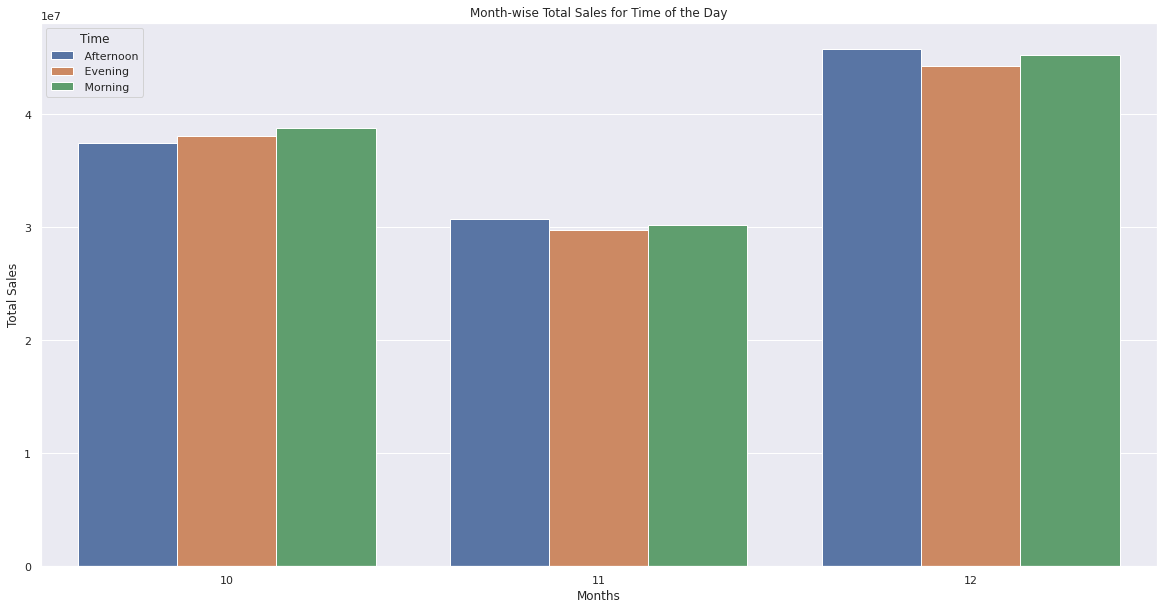

In [101]:
# Plotting the total month-wise sales data for each time of day on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data=monthly_tot_sales_by_time, hue='Time')
plt.title('Month-wise Total Sales for Time of the Day')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Monthly Time-wise Total Sales analysis shows that:
- <b>`Month 12`</b> has the Highest Total Monthly Sales
- <b>`Month 11`</b> has the Lowest Total Monthly Sales.

#### Monthly Time-wise Average Sales

In [102]:
# Grouping the data by 'Month' and 'Time' and mean of the 'Sales'
monthly_avg_sales_by_time = aal_sales_df.groupby(['Month', 'Time'])['Sales'].mean().reset_index()
monthly_avg_sales_by_time['Sales'] = round(monthly_avg_sales_by_time['Sales'], 2)
monthly_avg_sales_by_time

,Month,Time,Sales
0,10,Afternoon,44562.50
1,10,Evening,45285.71
2,10,Morning,46211.31
3,11,Afternoon,36616.07
4,11,Evening,35410.71
5,11,Morning,35928.57
6,12,Afternoon,54544.64
7,12,Evening,52741.07
8,12,Morning,53821.43


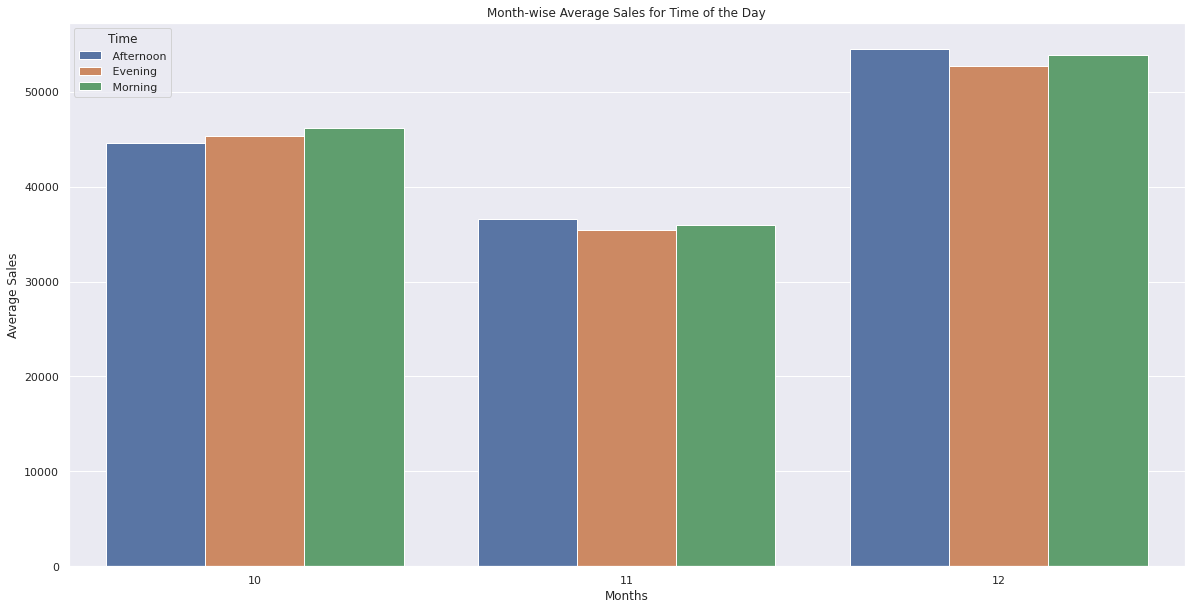

In [103]:
# Plotting the total month-wise sales data for each time of day on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Month', y='Sales', data=monthly_avg_sales_by_time, hue='Time')
plt.title('Month-wise Average Sales for Time of the Day')
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Monthly Time-wise Average Sales analysis shows that:
- <b>`Month 12`</b> has the Highest Average Monthly Sales
- <b>`Month 11`</b> has the Lowest Average Monthly Sales.

#### Monthly Time-wise Sales Distribution

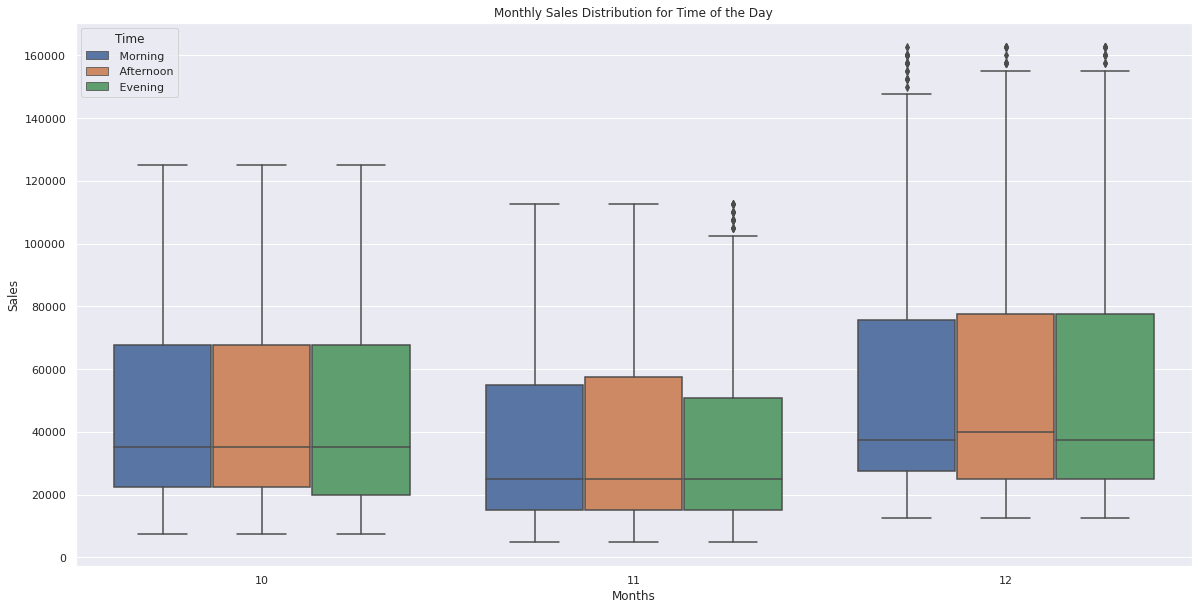

In [104]:
# Monthly Time-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Month', y='Sales', data=aal_sales_df, hue='Time')
plt.title('Monthly Sales Distribution for Time of the Day')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

#### Monthly Time-wise sales outliers count for the above boxplot distribution

In [105]:
# Finding the outliers in the above Monthly Time-wise Sales box-plot distribution
outliers_month_time_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Month', 'Time']).groupby(['Month', 'Time'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_month_time_sales) > 0 :
    print("\Months with Time-wise Outliers for Monthly Sales:\n", outliers_month_time_sales)
else :
    print("\nNo Month with Time-wise Outliers for Monthly Sales")

\Months with Time-wise Outliers for Monthly Sales:
                      min     max  count
Month Time                             
11     Evening    105000  112500     16
12     Afternoon  157500  162500     11
       Evening    157500  162500     13
       Morning    150000  162500     20


<b>Deduction:</b> The above Monthly Time-wise Sales analysis for detecting outliers shows that:
- <b>`Month 12`</b> has the highest outliers
<b>`Month 12`</b> has outliers for all the Time of the Day
- <b>`Month 10`</b> has no outliers

## ======================================================================

### Quarterly Sales Analysis

#### Total Quarterly Sales

In [106]:
# Finding total quarterly sales
sum_quarterly_sales_df = aal_sales_df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()
sum_quarterly_sales_df

,Year,Quarter,Sales
0,2020,4,340302500


In [107]:
# Finding the min and max total quarterly sales
if len(sum_quarterly_sales_df) == 0 :
    print('No data found')
else :
    if len(sum_quarterly_sales_df) > 1 :
        # Find the quarter with minimum sales
        min_tot_sales_quarter = sum_quarterly_sales_df.iloc[sum_quarterly_sales_df['Sales'].idxmin()]

        print(f'Quarter: Q{round(min_tot_sales_quarter.Quarter)} of Year: {round(min_tot_sales_quarter.Year)} has the lowest total Sales of {min_tot_sales_quarter.Sales}')

        # Find the quarter with maximum sales
        max_tot_sales_quarter = sum_quarterly_sales_df.iloc[sum_quarterly_sales_df['Sales'].idxmax()]

        print(f'Quarter: Q{round(max_tot_sales_quarter.Quarter)} of Year: {round(max_tot_sales_quarter.Year)} has the highest total Sales of {max_tot_sales_quarter.Sales}')
    else :
        print("Quarter: Q{} of Year: {} has total Sales of {}".format(round(sum_quarterly_sales_df.iloc[0]['Quarter']), round(sum_quarterly_sales_df.iloc[0]['Year']), sum_quarterly_sales_df.iloc[0]['Sales']))

Quarter: Q4 of Year: 2020 has total Sales of 340302500


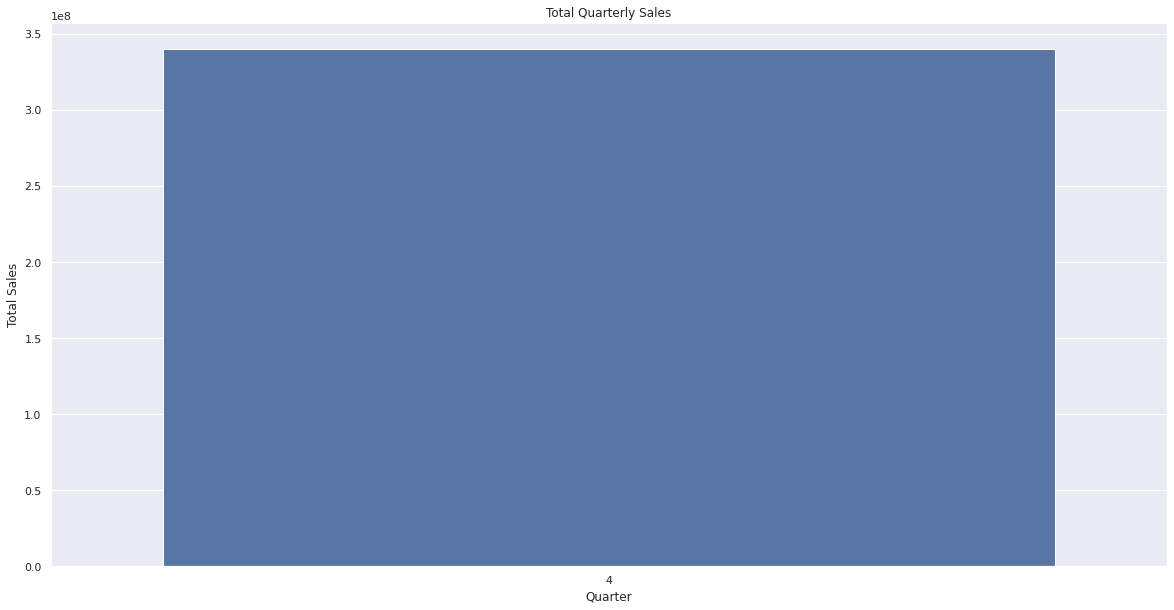

In [108]:
# Plotting the total quarterly sales
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=sum_quarterly_sales_df)
plt.title('Total Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> There is only one Quarter in the dataset <b>`Q4`</b> whose Total Quaterly Sales is shown by the above analysis

#### Average Quarterly Sales

In [109]:
# Finding average quaterly sales
avg_quarterly_sales_df = aal_sales_df.groupby(['Year', 'Quarter'])['Sales'].mean().reset_index()
avg_quarterly_sales_df['Sales'] = round(avg_quarterly_sales_df['Sales'], 2)
avg_quarterly_sales_df

,Year,Quarter,Sales
0,2020,4,45013.56


In [110]:
# Finding the min and max total quarterly sales
if len(avg_quarterly_sales_df) == 0 :
    print('No data found')
else :
    if len(avg_quarterly_sales_df) > 1 :
        # Find the quarter with minimum sales
        min_avg_sales_quarter = avg_quarterly_sales_df.iloc[avg_quarterly_sales_df['Sales'].idxmin()]

        print(f'Quarter: Q{round(min_avg_sales_quarter.Quarter)} of Year: {round(min_avg_sales_quarter.Year)} has the lowest total Sales of {min_avg_sales_quarter.Sales}')

        # Find the quarter with maximum sales
        max_avg_sales_quarter = avg_quarterly_sales_df.iloc[avg_quarterly_sales_df['Sales'].idxmax()]

        print(f'Quarter: Q{round(max_avg_sales_quarter.Quarter)} of Year: {round(max_avg_sales_quarter.Year)} has the highest total Sales of {max_avg_sales_quarter.Sales}')
    else :
        print("Quarter: Q{} of Year: {} has total Sales of {}".format(round(avg_quarterly_sales_df.iloc[0]['Quarter']), round(avg_quarterly_sales_df.iloc[0]['Year']), avg_quarterly_sales_df.iloc[0]['Sales']))

Quarter: Q4 of Year: 2020 has total Sales of 45013.56


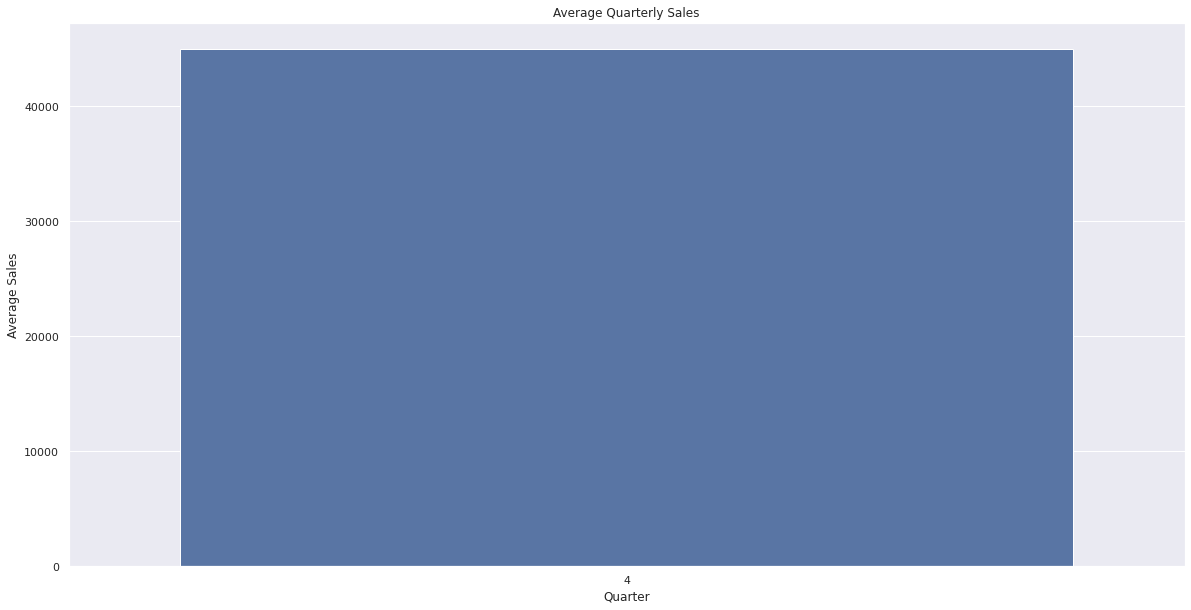

In [111]:
# Plotting the average quarterly sales
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=avg_quarterly_sales_df)
plt.title('Average Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> There is only one Quarter in the dataset <b>`Q4`</b> whose Average Quaterly Sales is shown by the above analysis

#### Quarterly Sales Distribution

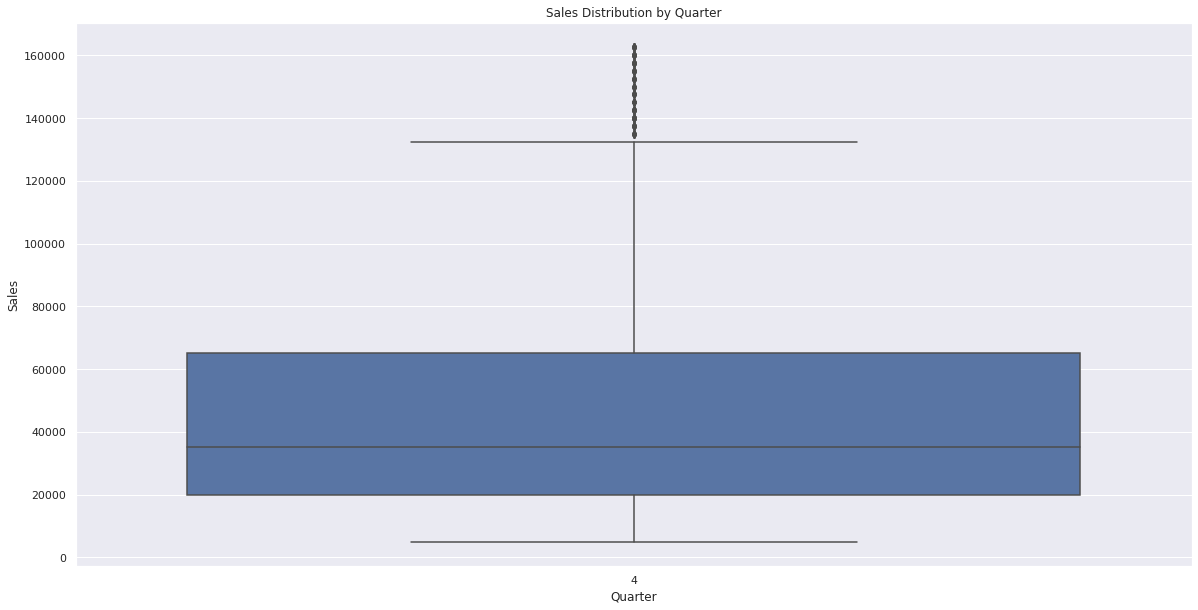

In [112]:
# Quarterly sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Quarter', y='Sales', data=aal_sales_df)
plt.title('Sales Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

#### Quarterly sales outliers count for the above boxplot distribution

In [113]:
# Finding the outliers in the above Quarterly Sales box-plot distribution
outliers_quarter_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', 'Quarter').groupby('Quarter')['Sales'].agg(['min', 'max', 'count'])
if len(outliers_quarter_sales) > 0 :
    print("\Outliers for Quarterly Sales:\n", outliers_quarter_sales)
else :
    print("\nNo Outliers for Quarterly Sales")

\Outliers for Quarterly Sales:
             min     max  count
Quarter                       
4        135000  162500    123


<b>Deduction:</b> The are outlies for the Quaterly Sales of <b>`Q4`</b> Quarter which is shown by the above outliers analysis

##### ======================================================================================================

#### Quarterly Group-wise Total Sales

In [114]:
# Grouping the data by 'Quarter' and 'Group' and sum the 'Sales'
quarterly_tot_sales_by_group = aal_sales_df.groupby(['Quarter', 'Group'])['Sales'].sum().reset_index()
quarterly_tot_sales_by_group

,Quarter,Group,Sales
0,4,Kids,85072500
1,4,Men,85750000
2,4,Seniors,84037500
3,4,Women,85442500


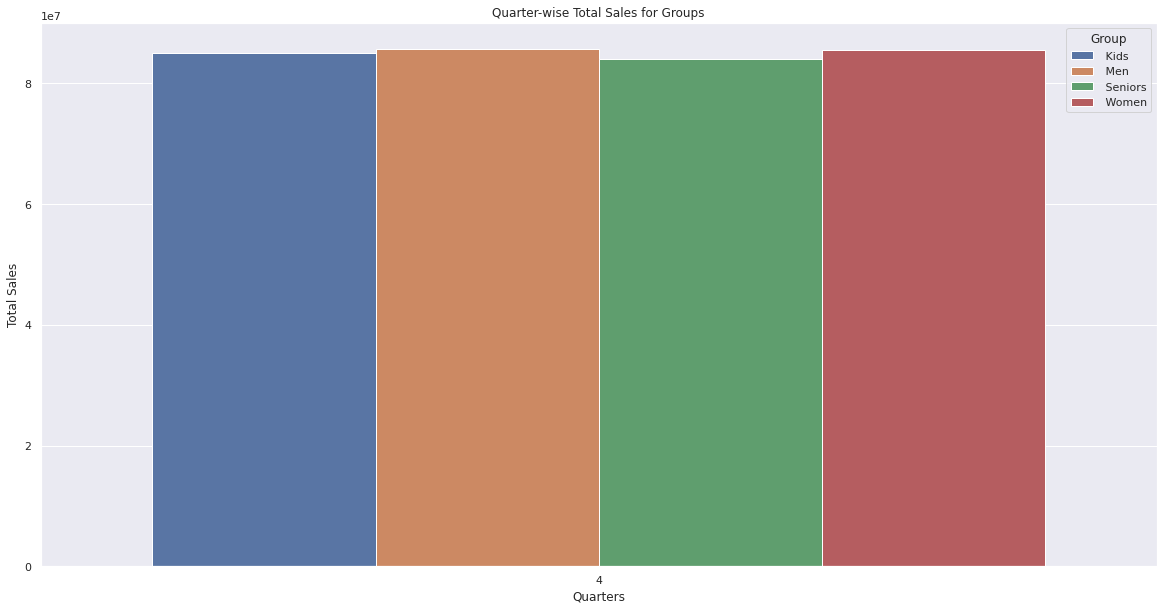

In [115]:
# Plotting the total quarter-wise sales data for each group on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=quarterly_tot_sales_by_group, hue='Group')
plt.title('Quarter-wise Total Sales for Groups')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.show()

<b>Note</b>: As variations for the <b>Total Quarterly Group-wise</b> data is low so the above `Bar Plot` does not conclusively present the difference in the Sales data. Hence a <b>`Line Plot`</b> is also included to visualize the <b>Total Quaterly Sales</b> across the <b>Groups</b> more clearly.


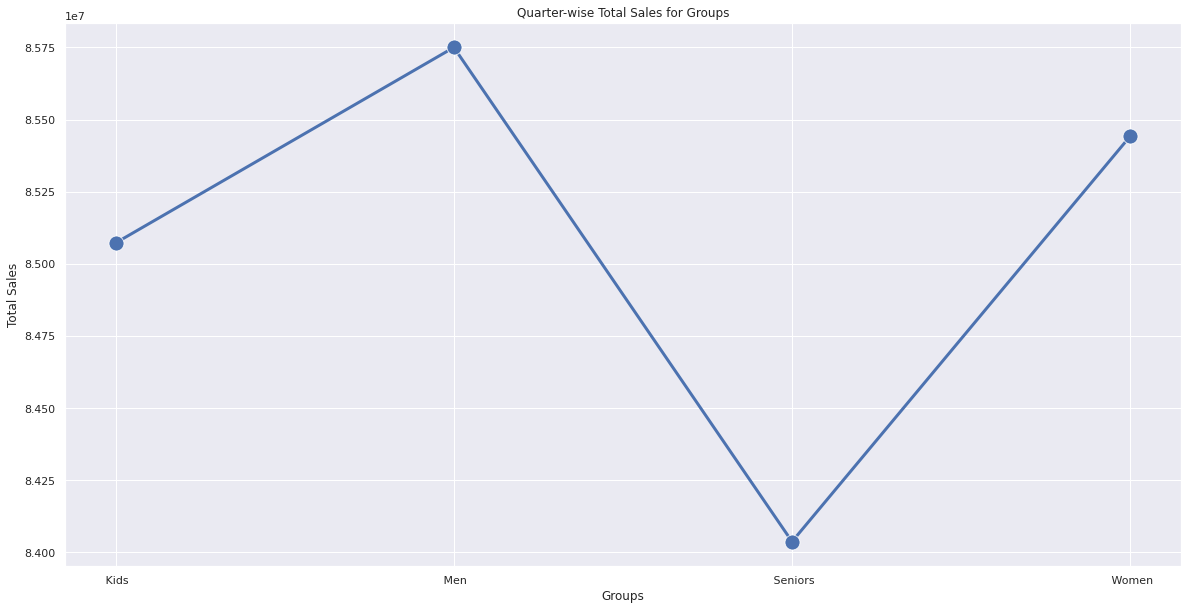

In [116]:
# Plotting the total quarter-wise sales data for each group on a seaborn lineplot
plt.figure(figsize=(20, 10))
sns.lineplot(x='Group', y='Sales', data= quarterly_tot_sales_by_group, marker='o', markersize=15, linewidth=3) 
plt.title('Quarter-wise Total Sales for Groups')
plt.xlabel('Groups')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Quaterly Group-wise Total Sales analysis shows that:
- Group <b>`Men`</b> has the Highest Total Quaterly Sales
- Group <b>`Seniors`</b> has the Lowest Total Quaterly Sales.

#### Quarterly Group-wise Average Sales

In [117]:
# Grouping the data by 'Quarter' and 'Group' and mean of the 'Sales'
quarterly_avg_sales_by_group = aal_sales_df.groupby(['Quarter', 'Group'])['Sales'].mean().reset_index()
quarterly_avg_sales_by_group['Sales'] = round(quarterly_avg_sales_by_group['Sales'], 2)
quarterly_avg_sales_by_group

,Quarter,Group,Sales
0,4,Kids,45011.90
1,4,Men,45370.37
2,4,Seniors,44464.29
3,4,Women,45207.67


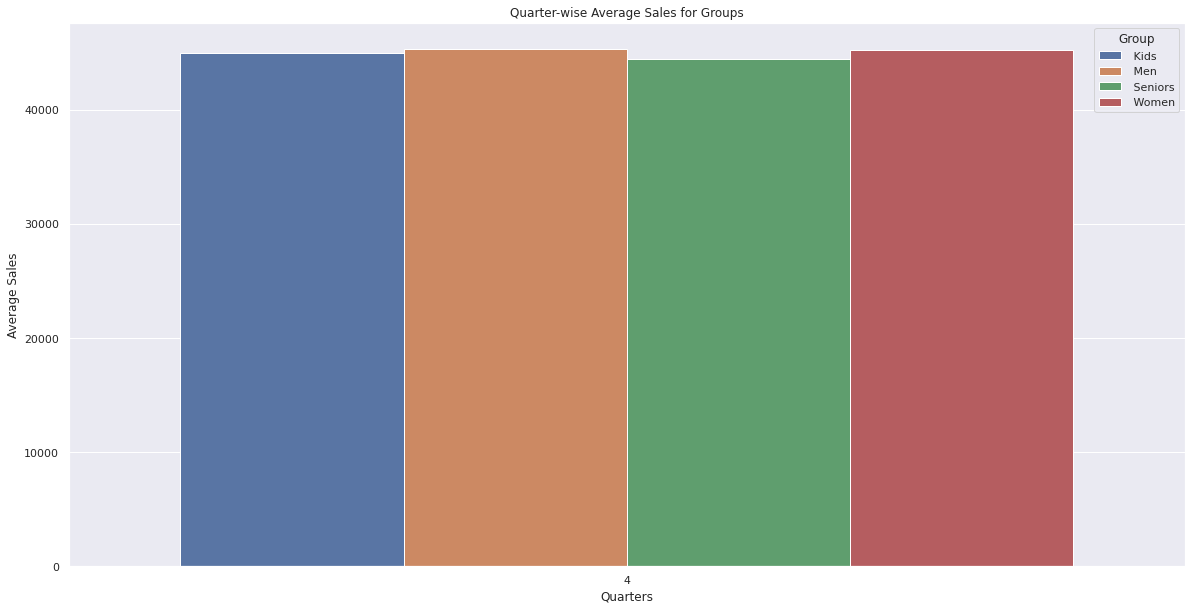

In [118]:
# Plotting the avg quarter-wise sales data for each group on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=quarterly_avg_sales_by_group, hue='Group')
plt.title('Quarter-wise Average Sales for Groups')
plt.xlabel('Quarters')
plt.ylabel('Average Sales')
plt.show()

<b>Note</b>: As variations for the <b>Average Quarterly Group-wise</b> data is low so the above `Bar Plot` does not conclusively present the difference in the Sales data. Hence a <b>`Line Plot`</b> is also included to visualize the <b>Average Quaterly Sales</b> across the <b>Groups</b> more clearly.

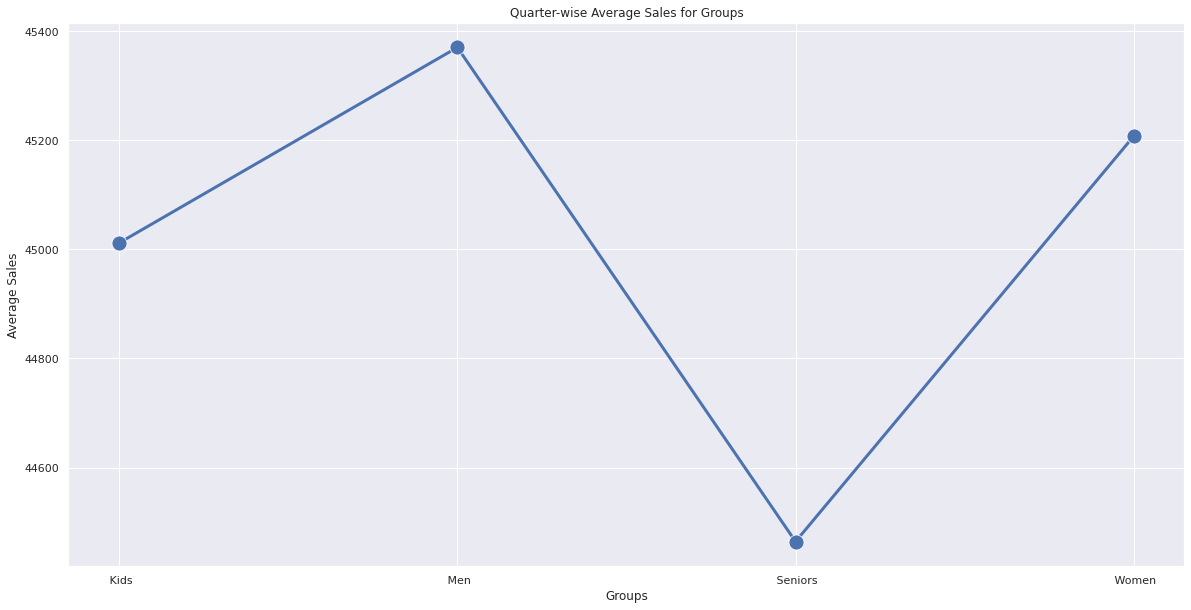

In [119]:
# Plotting the average quarter-wise sales data for each group on a seaborn lineplot
plt.figure(figsize=(20, 10))
sns.lineplot(x='Group', y='Sales', data= quarterly_avg_sales_by_group, marker='o', markersize=15, linewidth=3) 
plt.title('Quarter-wise Average Sales for Groups')
plt.xlabel('Groups')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Quaterly Group-wise Average Sales analysis shows that:
- Group <b>`Men`</b> has the Highest Average Quaterly Sales
- Group <b>`Seniors`</b> has the Lowest Average Quaterly Sales.

#### Quarterly Group-wise Sales Distribution

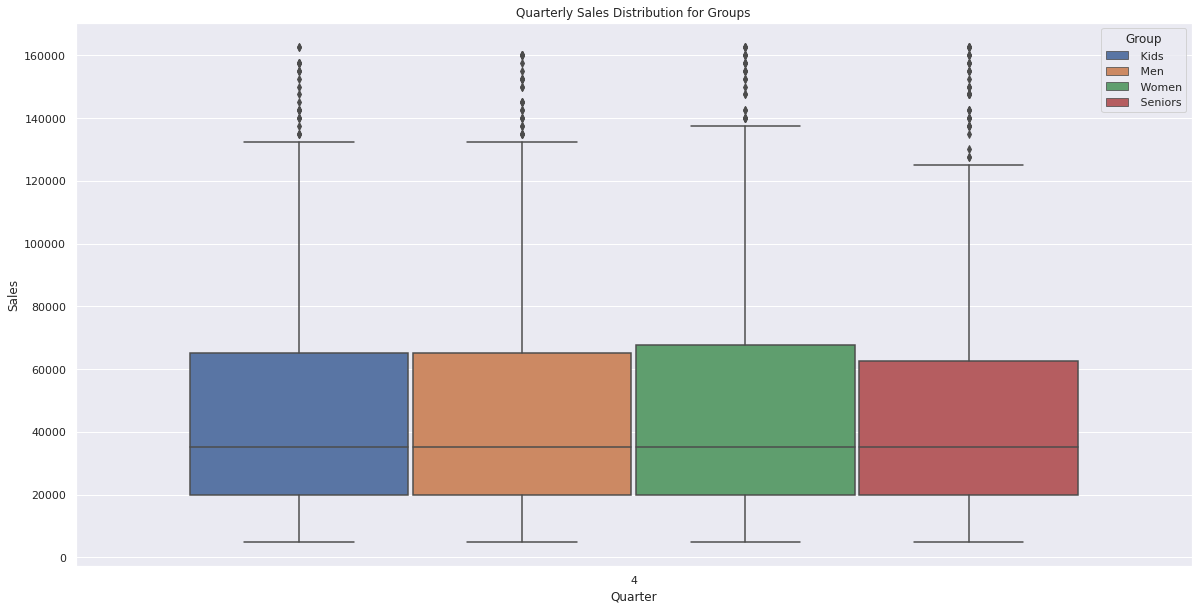

In [120]:
# Quarterly Group-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Quarter', y='Sales', data=aal_sales_df, hue='Group')
plt.title('Quarterly Sales Distribution for Groups')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

#### Quarterly Group-wise sales outliers count for the above boxplot distribution

In [121]:
# Finding the outliers in the above Quarterly Group-wise Sales box-plot distribution
outliers_quarter_group_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Quarter', 'Group']).groupby(['Quarter', 'Group'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_quarter_group_sales) > 0 :
    print("\Quarters with Group-wise Outliers for Quarterly Sales:\n", outliers_quarter_group_sales)
else :
    print("\nNo Quarter with Group-wise Outliers for Quarterly Sales")

\Quarters with Group-wise Outliers for Quarterly Sales:
                      min     max  count
Quarter Group                          
4        Kids     135000  162500     25
         Men      135000  160000     30
         Seniors  127500  162500     39
         Women    140000  162500     27


<b>Deduction:</b> The above Quarterly Group-wise Sales analysis for detecting outliers shows that:
- Group <b>`Seniors`</b> has the highest outliers
- Group <b>`Kids`</b> has the lowest outliers

##### ======================================================================================================

#### Quarterly State-wise Total Sales

In [122]:
# Grouping the data by 'Quarter' and 'State' and sum the 'Sales'
quarterly_tot_sales_by_state = aal_sales_df.groupby(['Quarter', 'State'])['Sales'].sum().reset_index()
quarterly_tot_sales_by_state

,Quarter,State,Sales
0,4,NSW,74970000
1,4,NT,22580000
2,4,QLD,33417500
3,4,SA,58857500
4,4,TAS,22760000
5,4,VIC,105565000
6,4,WA,22152500


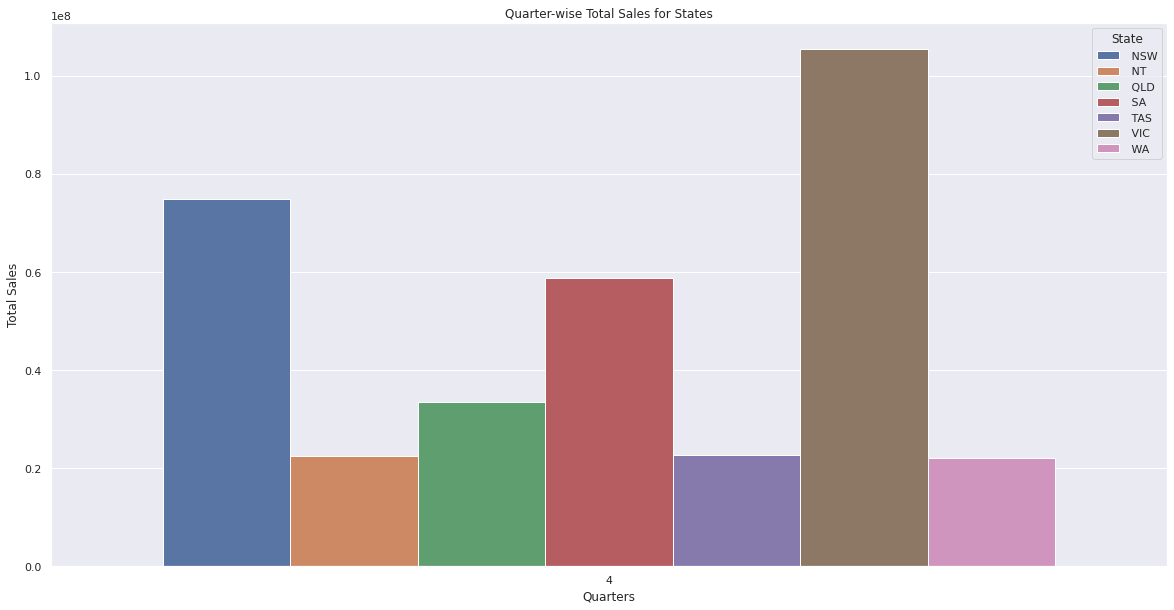

In [123]:
# Plotting the total quarter-wise sales data for each state on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=quarterly_tot_sales_by_state, hue='State')
plt.title('Quarter-wise Total Sales for States')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Quarterly State-wise Total Sales analysis shows that:
- State <b>`VIC`</b> has the Total Highest Sales
- State <b>`WA`</b> has the Total Lowest Sales
- States like <b>`NT`</b> and <b>`TAS`</b> also has lower Total Quaterly Sales

#### Quarterly State-wise Average Sales

In [124]:
# Grouping the data by 'Quarter' and 'Group' and mean of the 'Sales'
quarterly_avg_sales_by_group = aal_sales_df.groupby(['Quarter', 'State'])['Sales'].mean().reset_index()
quarterly_avg_sales_by_group['Sales'] = round(quarterly_avg_sales_by_group['Sales'], 2)
quarterly_avg_sales_by_group

,Quarter,State,Sales
0,4,NSW,69416.67
1,4,NT,20907.41
2,4,QLD,30942.13
3,4,SA,54497.69
4,4,TAS,21074.07
5,4,VIC,97745.37
6,4,WA,20511.57


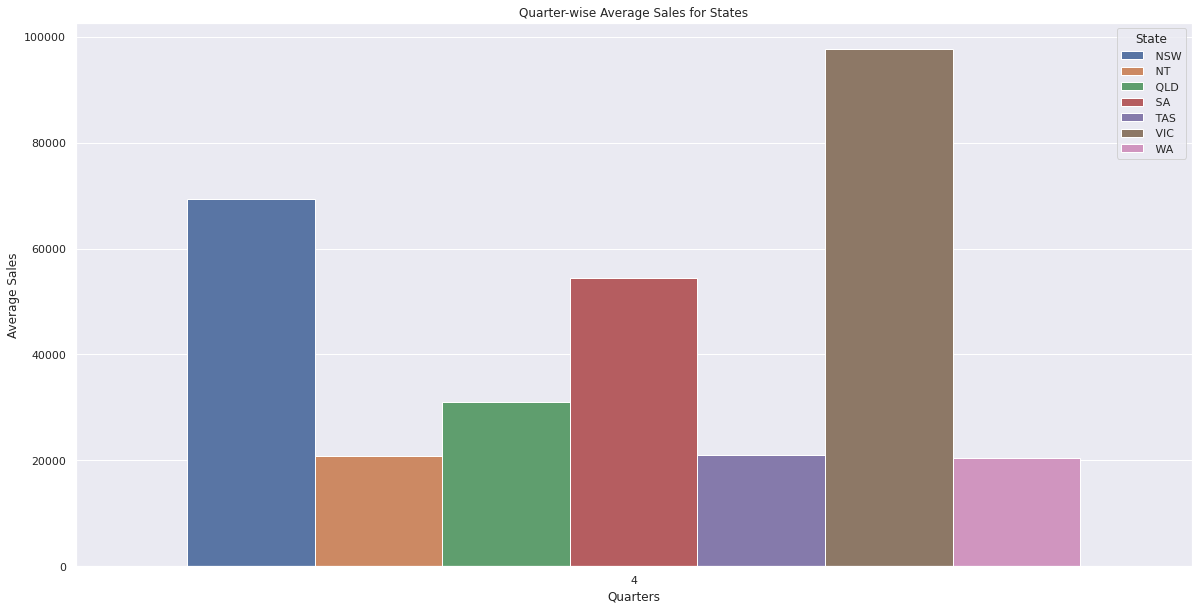

In [125]:
# Plotting the avg quarter-wise sales data for each state on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=quarterly_avg_sales_by_group, hue='State')
plt.title('Quarter-wise Average Sales for States')
plt.xlabel('Quarters')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Quarterly State-wise Average Sales analysis shows that:
- State <b>`VIC`</b> has the Average Highest Sales
- State <b>`WA`</b> has the Average Lowest Sales
- States like <b>`NT`</b> and <b>`TAS`</b> also has lower Average Quaterly Sales

#### Quarterly State-wise Sales Distribution

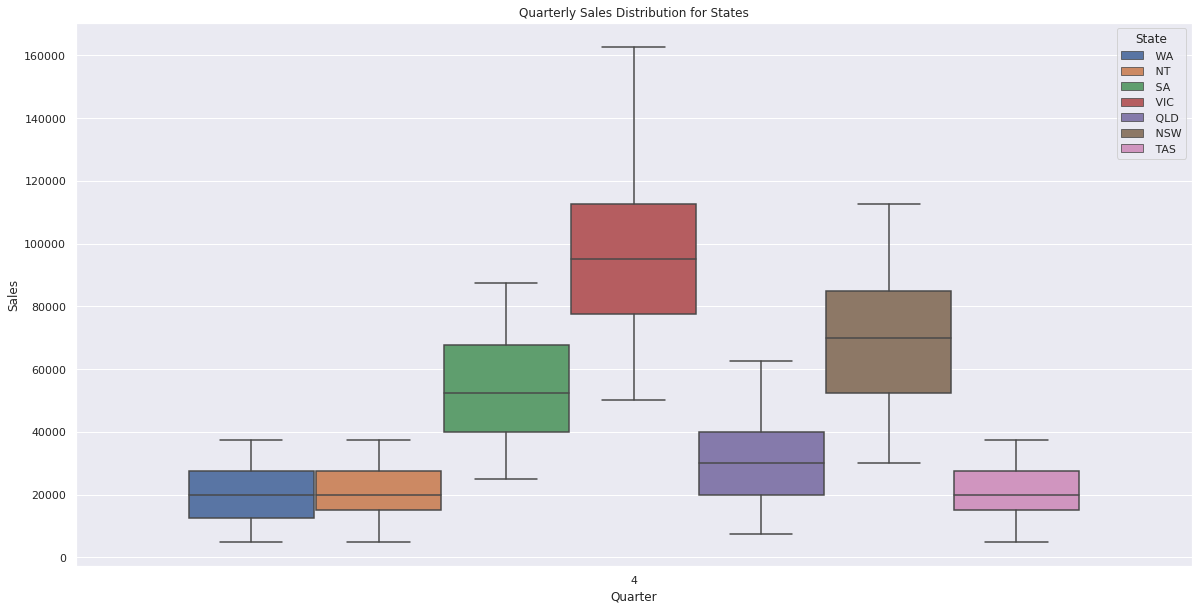

In [126]:
# Quarterly State-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Quarter', y='Sales', data=aal_sales_df, hue='State')
plt.title('Quarterly Sales Distribution for States')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

#### Quarterly State-wise sales outliers count for the above boxplot distribution

In [127]:
# Finding the outliers in the above Quarterly State-wise Sales box-plot distribution
outliers_quarter_state_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Quarter', 'State']).groupby(['Quarter', 'State'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_quarter_state_sales) > 0 :
    print("\Quarters with State-wise Outliers for Quarterly Sales:\n", outliers_quarter_state_sales)
else :
    print("\nNo Quarter with State-wise Outliers for Quarterly Sales")


No Quarter with State-wise Outliers for Quarterly Sales


<b>Deduction:</b> No Outliers found for Quaterly State-wise Sales

##### ======================================================================================================

#### Quarterly Time-wise Total Sales

In [128]:
# Grouping the data by 'Quarter' and 'Time' and sum the 'Sales'
quarterly_tot_sales_by_time = aal_sales_df.groupby(['Quarter', 'Time'])['Sales'].sum().reset_index()
quarterly_tot_sales_by_time

,Quarter,Time,Sales
0,4,Afternoon,114007500
1,4,Evening,112087500
2,4,Morning,114207500


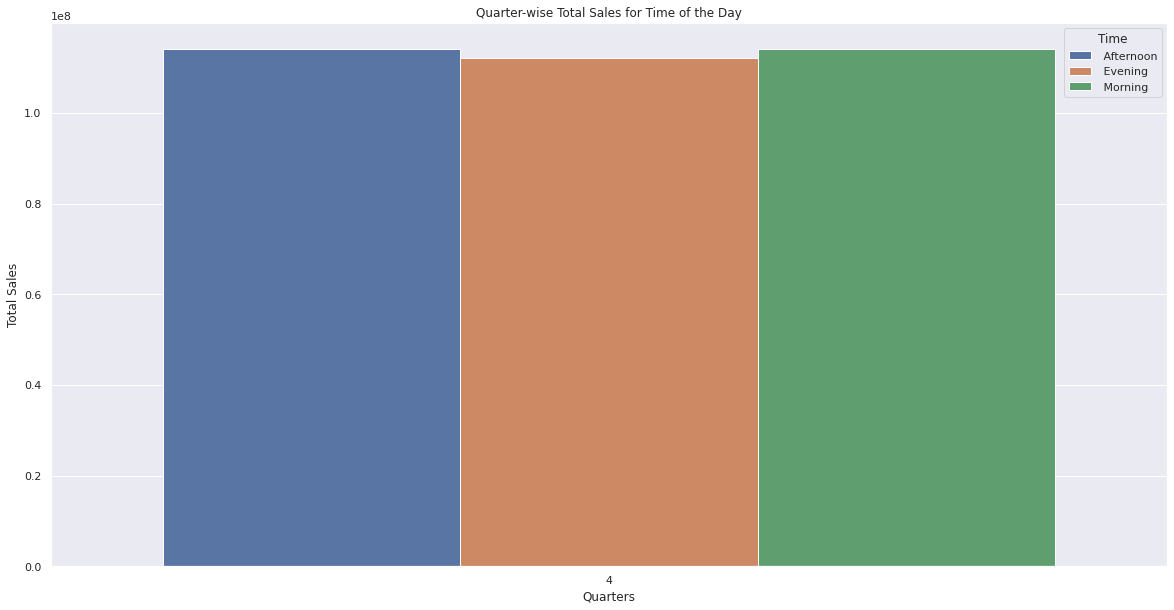

In [129]:
# Plotting the total quarter-wise sales data for each time of day on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=quarterly_tot_sales_by_time, hue='Time')
plt.title('Quarter-wise Total Sales for Time of the Day')
plt.xlabel('Quarters')
plt.ylabel('Total Sales')
plt.show()

<b>Note</b>: As variations for the <b>Total Quarterly Time-wise</b> data is low so the above `Bar Plot` does not conclusively present the difference in the Sales data. Hence a <b>`Line Plot`</b> is also included to visualize the <b>Total Quaterly Sales</b> across the <b>Time of Day</b> more clearly.

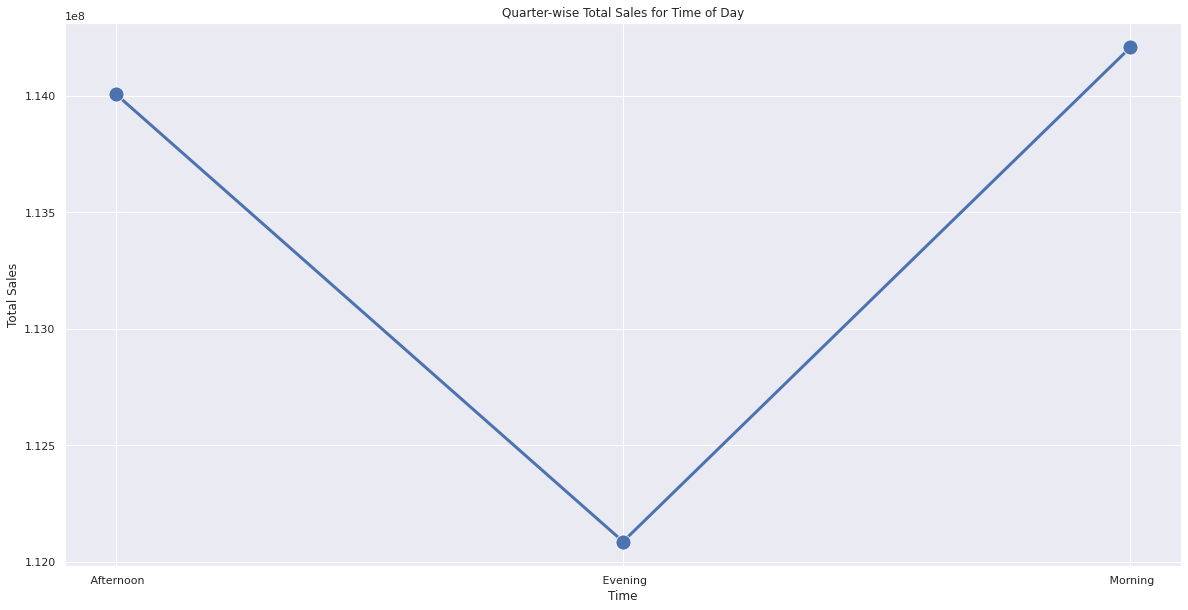

In [130]:
# Plotting the total quarter-wise sales data for time of day on a seaborn lineplot
plt.figure(figsize=(20, 10))
sns.lineplot(x='Time', y='Sales', data= quarterly_tot_sales_by_time, marker='o', markersize=15, linewidth=3) 
plt.title('Quarter-wise Total Sales for Time of Day')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Quaterly Time-wise Total Sales analysis shows that:
- Time <b>`Morning`</b> has the Highest Total Quaterly Sales
- Time <b>`Evening`</b> has the Lowest Total Quaterly Sales.

#### Quarterly Time-wise Average Sales

In [131]:
# Grouping the data by 'Quarter' and 'Time' and mean of the 'Sales'
quarterly_avg_sales_by_time = aal_sales_df.groupby(['Quarter', 'Time'])['Sales'].mean().reset_index()
quarterly_avg_sales_by_time['Sales'] = round(quarterly_avg_sales_by_time['Sales'], 2)
quarterly_avg_sales_by_time

,Quarter,Time,Sales
0,4,Afternoon,45241.07
1,4,Evening,44479.17
2,4,Morning,45320.44


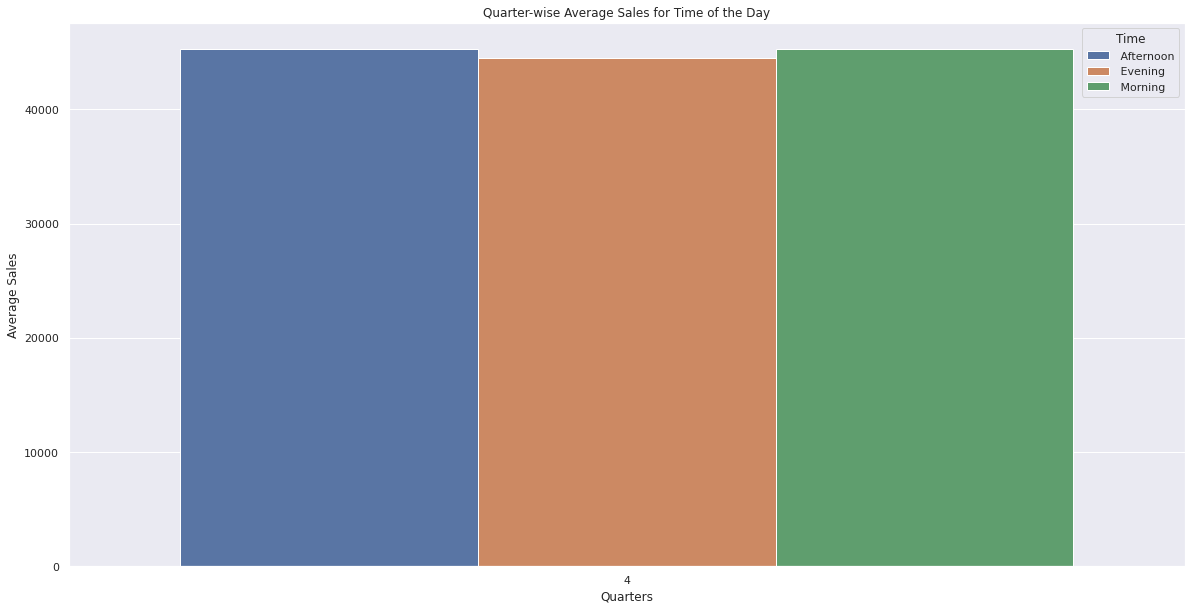

In [132]:
# Plotting the avg quarter-wise sales data for each time of day on a seaborn barplot
plt.figure(figsize=(20, 10))
sns.barplot(x='Quarter', y='Sales', data=quarterly_avg_sales_by_time, hue='Time')
plt.title('Quarter-wise Average Sales for Time of the Day')
plt.xlabel('Quarters')
plt.ylabel('Average Sales')
plt.show()

<b>Note</b>: As variations for the <b>Average Quarterly Time-wise</b> data is low so the above `Bar Plot` does not conclusively present the difference in the Sales data. Hence a <b>`Line Plot`</b> is also included to visualize the <b>Average Quaterly Sales</b> across the <b>Time of Day</b> more clearly.

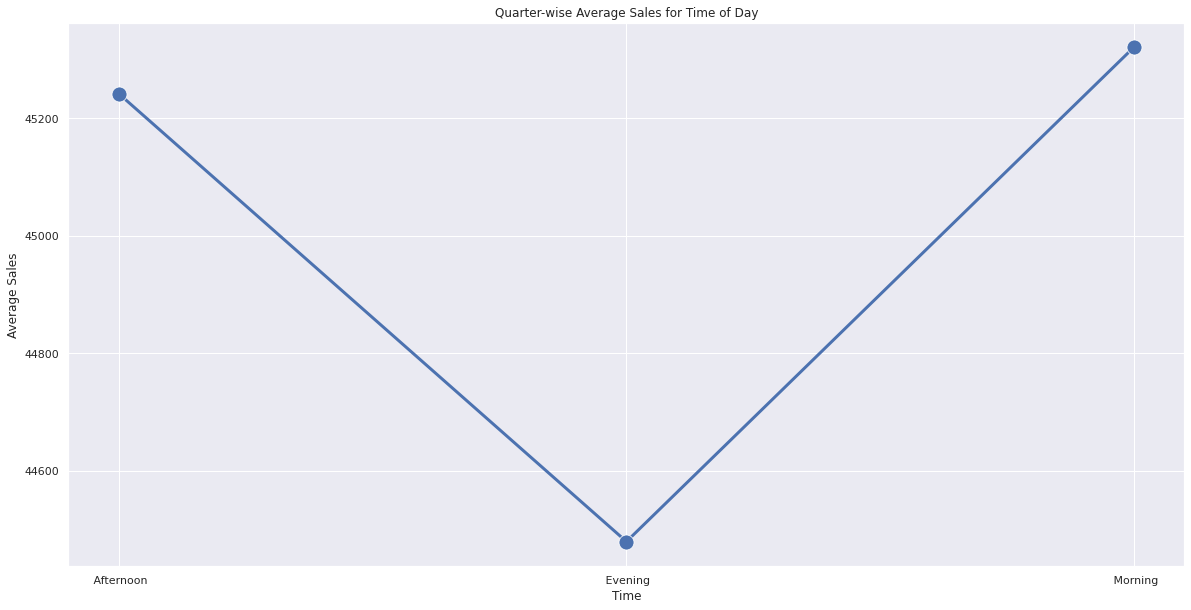

In [133]:
# Plotting the average quarter-wise sales data for time of day on a seaborn lineplot
plt.figure(figsize=(20, 10))
sns.lineplot(x='Time', y='Sales', data= quarterly_avg_sales_by_time, marker='o', markersize=15, linewidth=3) 
plt.title('Quarter-wise Average Sales for Time of Day')
plt.xlabel('Time')
plt.ylabel('Average Sales')
plt.show()

<b>Deduction:</b> The above Quaterly Time-wise Average Sales analysis shows that:
- Time <b>`Morning`</b> has the Highest Average Quaterly Sales
- Time <b>`Evening`</b> has the Lowest Average Quaterly Sales.

#### Quarterly Time-wise Sales Distribution

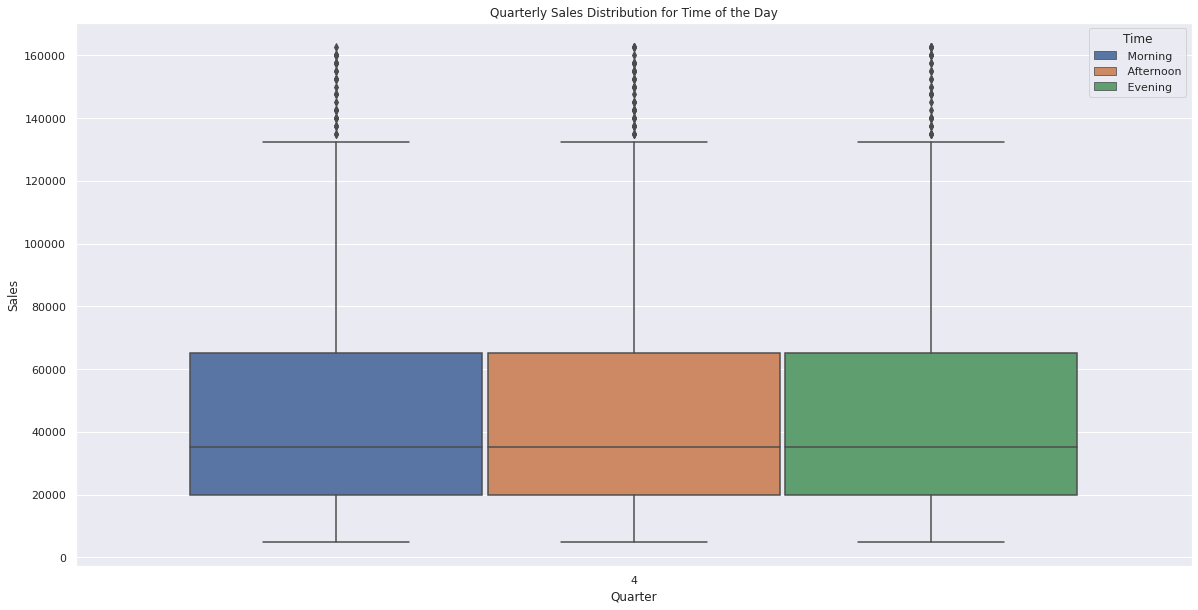

In [134]:
# Quarterly State-wise sales distributions showing the fluctuation in sales as outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Quarter', y='Sales', data=aal_sales_df, hue='Time')
plt.title('Quarterly Sales Distribution for Time of the Day')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

#### Quarterly Time-wise sales outliers count for the above boxplot distribution

In [135]:
# Finding the outliers in the above Quarterly Time-wise Sales box-plot distribution
outliers_quarter_time_sales = find_outliers_iqr_group(aal_sales_df, 'Sales', ['Quarter', 'Time']).groupby(['Quarter', 'Time'])['Sales'].agg(['min', 'max', 'count'])
if len(outliers_quarter_time_sales) > 0 :
    print("\Quarters with Time-wise Outliers for Quarterly Sales:\n", outliers_quarter_time_sales)
else :
    print("\nNo Quarter with Time-wise Outliers for Quarterly Sales")

\Quarters with Time-wise Outliers for Quarterly Sales:
                        min     max  count
Quarter Time                             
4        Afternoon  135000  162500     46
         Evening    135000  162500     40
         Morning    135000  162500     37


<b>Deduction:</b> The above Quarterly Time-wise Sales analysis for detecting outliers shows that:
- Time <b>`Afternoon`</b> has the highest outliers
- Time <b>`Morning`</b> has the lowest outliers

#### ======================================================================================================

### State-wise sales analysis for different demographic groups (kids, women, men, and seniors)

In [136]:
# Group data by state and demographic group, then sum sales
state_group_sales = aal_sales_df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
state_group_sales

,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000
5,NT,Men,5762500
6,NT,Seniors,5465000
7,NT,Women,5652500
8,QLD,Kids,8510000
9,QLD,Men,8392500


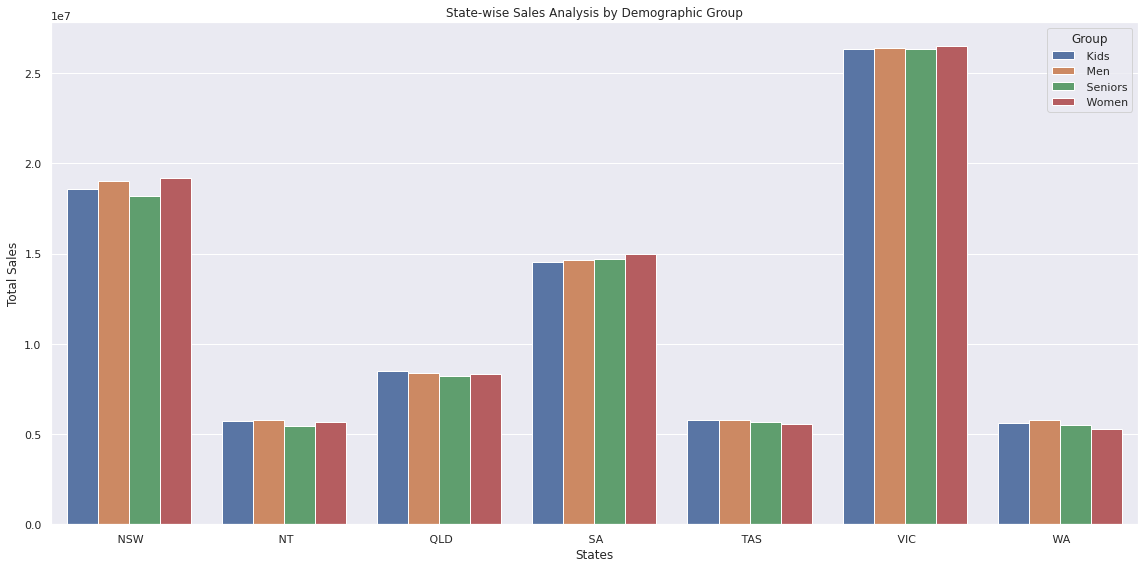

In [137]:
# Plotting Group data by state and demographic group, then sum sales
plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='Sales', hue='Group', data=state_group_sales)
plt.title('State-wise Sales Analysis by Demographic Group')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

<b>Deduction:</b> The above Group-wise State Sales analysis shows that:
- State <b>`VIC`</b> has the Highest Sales
- State <b>`WA`</b> has the Lowest Sales
- States like <b>`NT`</b> and <b>`TAS`</b> also has lower Quaterly Sales

#### ======================================================================================================

### Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states

In [138]:
# Group data by state and demographic group, then sum sales
group_state_sales = aal_sales_df.groupby(['Group', 'State'])['Sales'].sum().reset_index()
group_state_sales

,Group,State,Sales
0,Kids,NSW,18587500
1,Kids,NT,5700000
2,Kids,QLD,8510000
3,Kids,SA,14515000
4,Kids,TAS,5775000
5,Kids,VIC,26360000
6,Kids,WA,5625000
7,Men,NSW,19022500
8,Men,NT,5762500
9,Men,QLD,8392500


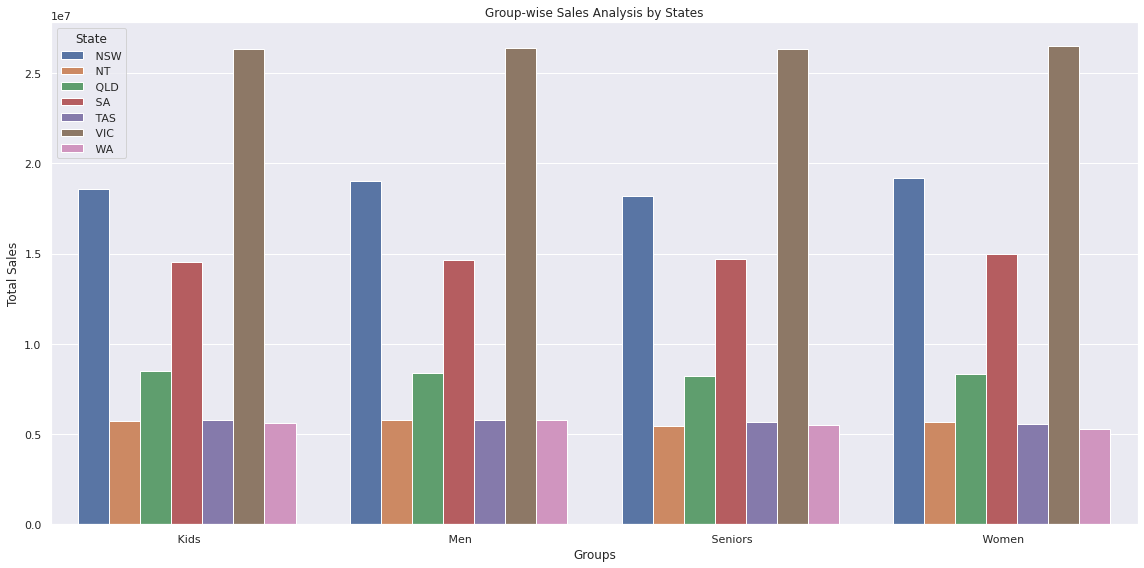

In [139]:
# Plotting Group data by state and demographic group, then sum sales
plt.figure(figsize=(16, 8))
sns.barplot(x='Group', y='Sales', hue='State', data=group_state_sales)
plt.title('Group-wise Sales Analysis by States')
plt.xlabel('Groups')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

<b>Deduction:</b> The above State-wise Group Sales analysis shows that:
- State <b>`VIC`</b> has the Highest Sales for any Groups
- State <b>`WA`</b> has the Lowest Sales for any Groups
- States like <b>`NT`</b> and <b>`TAS`</b> also has lower sales for all the groups

#### ======================================================================================================

### Time-of-the-day analysis to identify peak and off-peak sales periods

In [140]:
# Group sales by time of day and sum sales for each time period
sales_by_time = aal_sales_df.groupby('Time')['Sales'].sum()
sales_by_time

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

Peak Sales Period: " Morning", with total sales of 114207500
Off-Peak Sales Period: " Evening", with total sales of 112087500


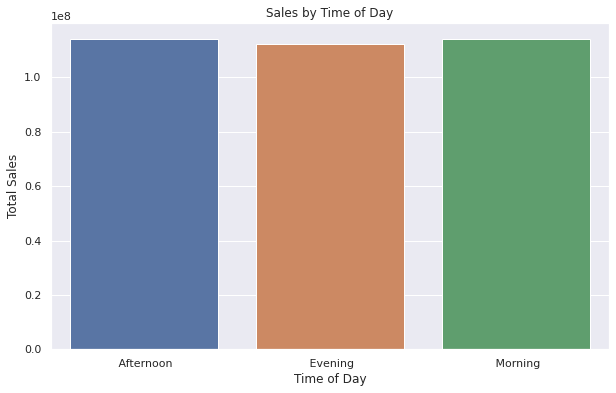

In [141]:
# Find the peak sales period (time with highest sales)
peak_time = sales_by_time.idxmax()
peak_sales = sales_by_time.max()

# Find the off-peak sales period (time with lowest sales)
off_peak_time = sales_by_time.idxmin()
off_peak_sales = sales_by_time.min()

print(f"Peak Sales Period: \"{peak_time}\", with total sales of {peak_sales}")
print(f"Off-Peak Sales Period: \"{off_peak_time}\", with total sales of {off_peak_sales}")

# Plotting sales by time of day on a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_time.index, y=sales_by_time.values)
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.title("Sales by Time of Day")
plt.show()

<b>Note</b>: As variations for the <b>Sales by Time of the Day</b> data is low, so the above `Bar Plot` does not conclusively present the difference in the Sales data. Hence a <b>`Line Plot`</b> is also included to visualize the Sales across the <b>Time of the Day</b> more clearly.

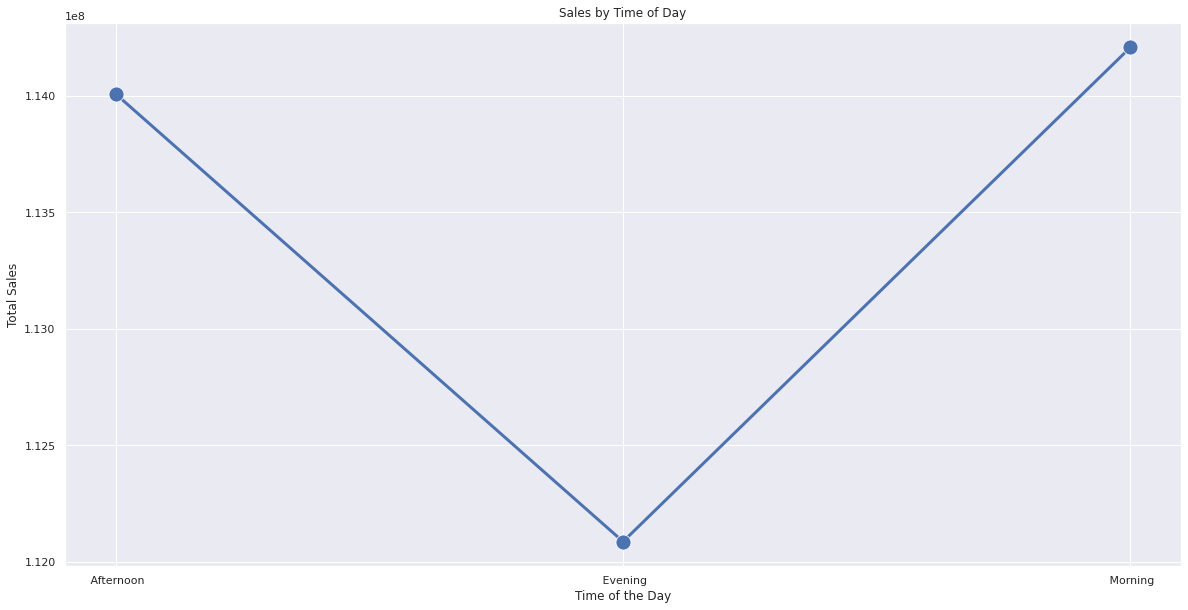

In [142]:
# Plotting sales by time of day on a lineplot
sales_by_time_df = pd.DataFrame(sales_by_time)
sales_by_time_df

plt.figure(figsize=(20, 10))
sns.lineplot(x='Time', y='Sales', data= sales_by_time_df, marker='o', markersize=15, linewidth=3) 
plt.title('Sales by Time of Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

<b>Deduction:</b> The above Sales by Time of the Day analysis shows that:
- Time <b>`Morning`</b> has the Highest Sales
- Time <b>`Evening`</b> has the Lowest Sales.

## ======================================================================

### Checking Skewness of Data

#### Checking the Skewness of the Sales Distribution


Skewness of Sales: 1.0855501535060816
The distribution of Sales is heavily right/positively skewed




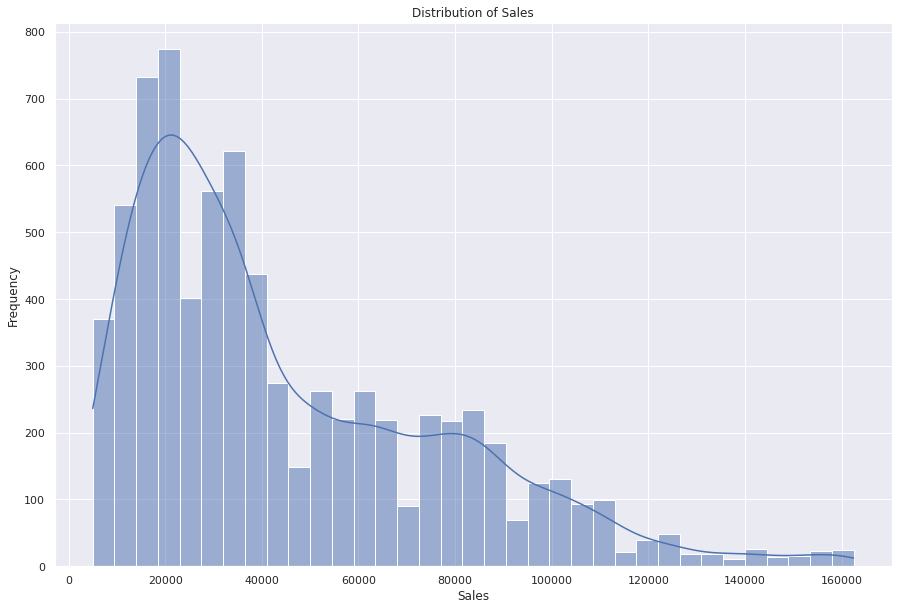

In [143]:
# Calculation for skewness of the Sales Distribution
skewness = aal_sales_df['Sales'].skew()
print(f"\nSkewness of Sales: {skewness}")

# Calling "get_skew_type()" helper function that is defined above
skew_type = get_skew_type(skewness)

print(skew_type)

print('\n')

# Plot Sales distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Sales'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

***Deduction:*** From the above histplot distribution of the Sales, it is seen that the distribution is heavily right/positively skewed showing the maximum concentration of the sales between 20,000 and 25,000 range. The above hisplot plots the bars at 5000 unit intervals.

***Validating the above deduction***

In [144]:
highest_sales = aal_sales_df['Sales'].max()
print(f'Highest Sales {highest_sales}\n')

Highest Sales 162500



In [145]:
sales_unit_interval = 5000
sales_interval_list = []
for i in range(0,highest_sales,sales_unit_interval):
    interval = f'{i}-{i+(sales_unit_interval-1)}'
    interval_frequency = len(aal_sales_df[(aal_sales_df['Sales'] >= i) & (aal_sales_df['Sales'] < (i+(sales_unit_interval-1)))])
    sales_interval_list.append({'Interval': interval, 'Frequency': interval_frequency})
print('Intervals with their frequencies:')
sales_interval_list
sales_interval_list_df = pd.DataFrame(sales_interval_list)
sales_interval_list_df

Intervals with their frequencies:


,Interval,Frequency
0,0-4999,0
1,5000-9999,370
2,10000-14999,541
3,15000-19999,732
4,20000-24999,775
5,25000-29999,696
6,30000-34999,586
7,35000-39999,640
8,40000-44999,241
9,45000-49999,283


In [146]:
sales_max_frequency_interval = sales_interval_list_df.iloc[sales_interval_list_df['Frequency'].idxmax()]
print('Interval with the maximum frequency: ')
print(sales_max_frequency_interval)

print(f'\nThe maximum concentration of the Sales is between {sales_max_frequency_interval.Interval} range. The frequency of total units sold in this range is {sales_max_frequency_interval.Frequency}.')

Interval with the maximum frequency: 
Interval     20000-24999
Frequency            775
Name: 4, dtype: object

The maximum concentration of the Sales is between 20000-24999 range. The frequency of total units sold in this range is 775.


#### Log normal distribution of Sales

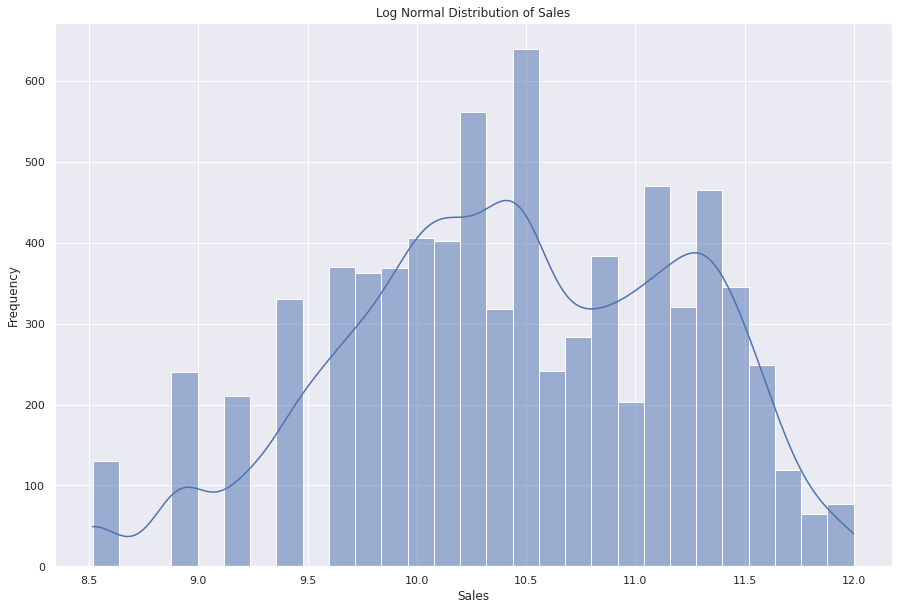

In [147]:
# Plot Log_Sales distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Log_Sales'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Log Normal Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

***Deduction***: The log normal distribution for sales tends to normalize the data which is evident from the above graph which is tending towards a bell curve or gaussian distribution with the swekness of the distribution being reduced significantly

#### Normalized_Sales distribution

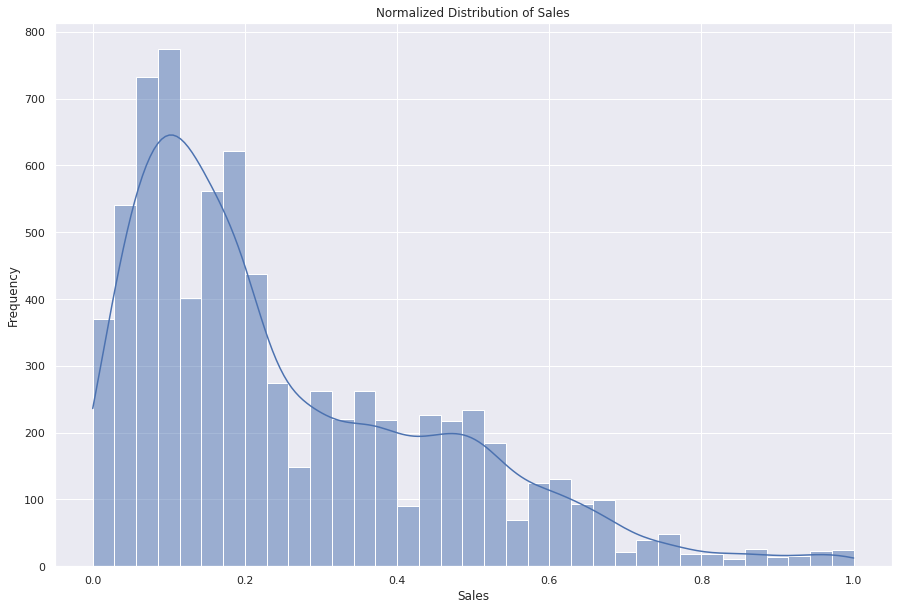

In [148]:
# Plot Normalized_Sales distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Normalized_Sales'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Normalized Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

***Deduction:*** From the above histplot distribution of the Normalized_Sales, it is seen that the distribution is heavily right/positively skewed showing the maximum concentration of the Unit sold between 0.0 and 0.2 unit range. The above hisplot plots the bars at 0.2 unit intervals.

#### Sqrt_Sales(Square Root Sales) distribution

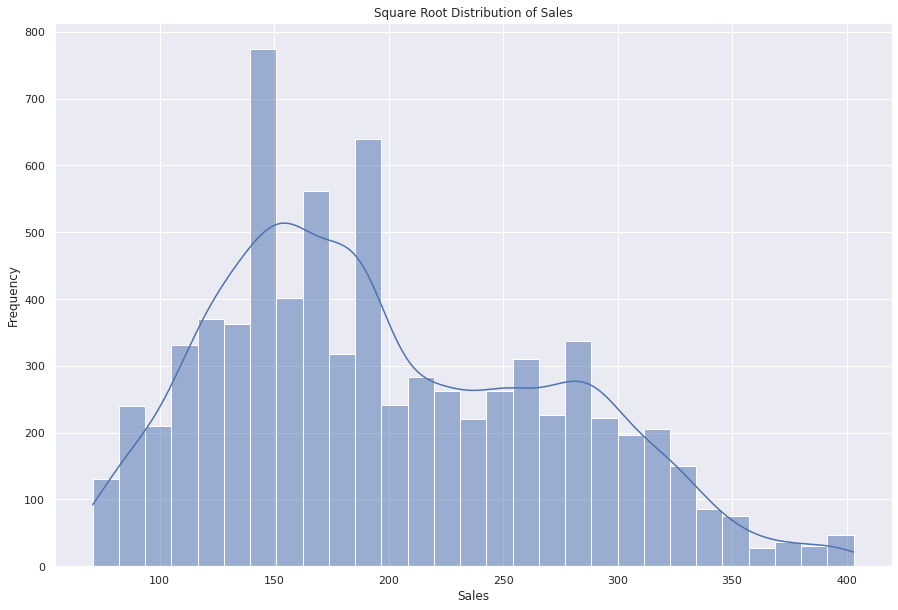

In [149]:
# Plot Sqrt_Sales distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Sqrt_Sales'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Square Root Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

***Deduction***: The square root distribution for sales tends to normalize the data which is evident from the above graph which is tending towards a bell curve or gaussian distribution with the swekness of the distribution being reduced significantly

#### Winsorized Sales distribution (Winsorization is normalization of the extreme/outlier values within an lower and upper limit) 

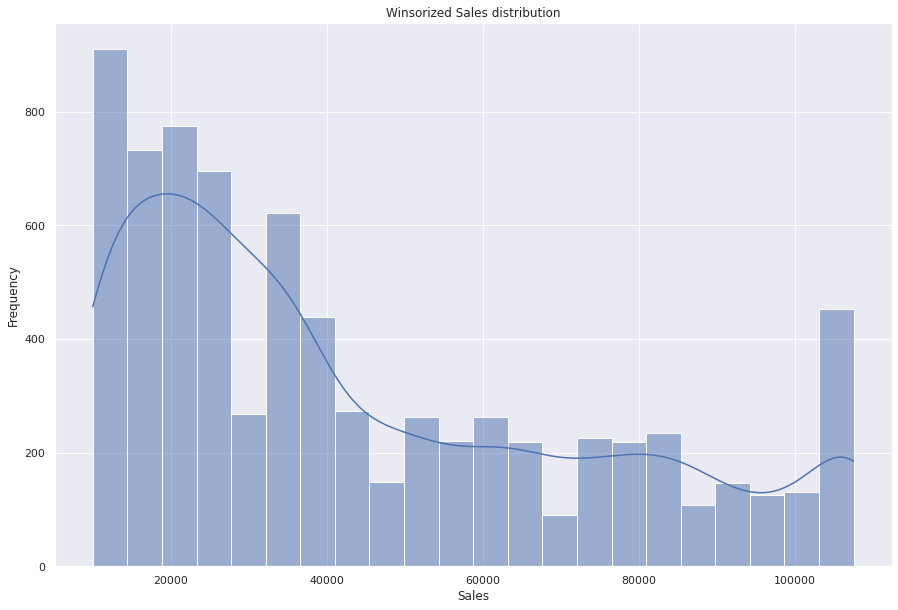

In [150]:
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Winsorized_Sales'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Winsorized Sales distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

***Deduction***: The winsorized sales distribution for sales tends to normalize the data which is evident from the above graph  with the swekness of the distribution being reduced significantly as the extremes or the outliers are normalized within an upper and lower limit by winsorization.

#### Checking the Skewness of the Units Sold Distribution


Skewness of Units: 1.0855501535060819
The distribution of Sales is heavily right/positively skewed




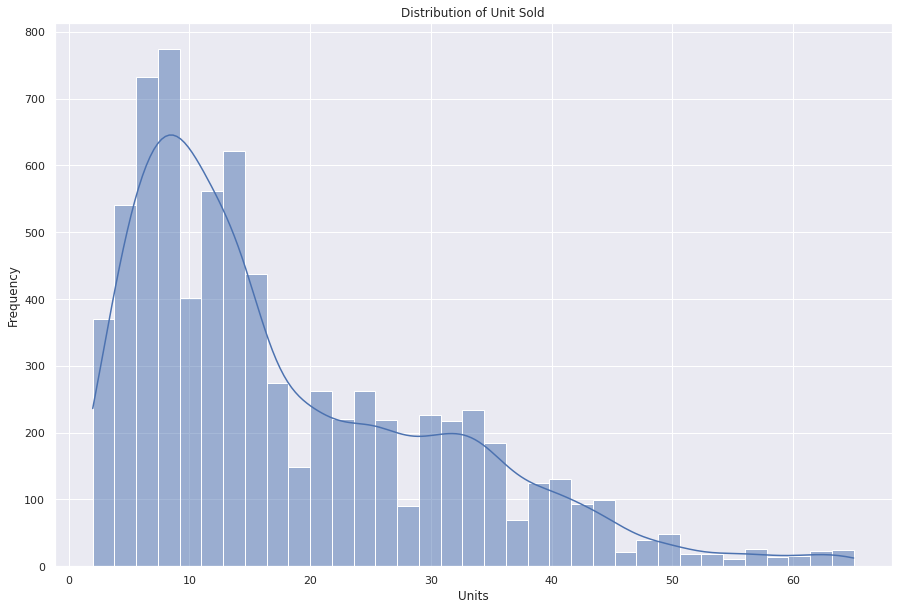

In [151]:
# Calculation for skewness of the Sales Distribution
skewness = aal_sales_df['Unit'].skew()
print(f"\nSkewness of Units: {skewness}")

# Calling "get_skew_type()" helper function that is defined above
skew_type = get_skew_type(skewness)

print(skew_type)

print('\n')

# Plot Unit distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Unit'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Unit Sold')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()

***Deduction:*** From the above histplot distribution of the Unit sold, it is seen that the distribution is heavily right/positively skewed showing the maximum concentration of the Unit sold between 8 and 9 range. The above hisplot plots the bars at 2 unit intervals.

***Validating the above deduction***

In [152]:
highest_units_sold = aal_sales_df['Unit'].max()
print(f'Highest units sold for a sale {highest_units_sold}\n')

Highest units sold for a sale 65



In [153]:
unit_interval = 2
unit_interval_list = []
for i in range(0,highest_units_sold,unit_interval):
    interval = f'{i}-{i+(unit_interval-1)}'
    interval_frequency = len(aal_sales_df[(aal_sales_df['Unit'] >= i) & (aal_sales_df['Unit'] <= (i+(unit_interval-1)))])
    unit_interval_list.append({'Interval': interval, 'Frequency': interval_frequency})
print('Intervals with their frequencies:')
unit_interval_list
unit_interval_list_df = pd.DataFrame(unit_interval_list)
unit_interval_list_df

Intervals with their frequencies:


,Interval,Frequency
0,0-1,0
1,2-3,370
2,4-5,541
3,6-7,732
4,8-9,775
5,10-11,696
6,12-13,586
7,14-15,640
8,16-17,241
9,18-19,283


In [154]:
units_max_frequency_interval = unit_interval_list_df.iloc[unit_interval_list_df['Frequency'].idxmax()]
print('Interval with the maximum frequency: ')
print(units_max_frequency_interval)

print(f'\nThe maximum concentration of the units sold is between {units_max_frequency_interval.Interval} range. The frequency of total units sold in this range is {units_max_frequency_interval.Frequency}.')

Interval with the maximum frequency: 
Interval     8-9
Frequency    775
Name: 4, dtype: object

The maximum concentration of the units sold is between 8-9 range. The frequency of total units sold in this range is 775.


#### Log normal distribution of Unit Sold

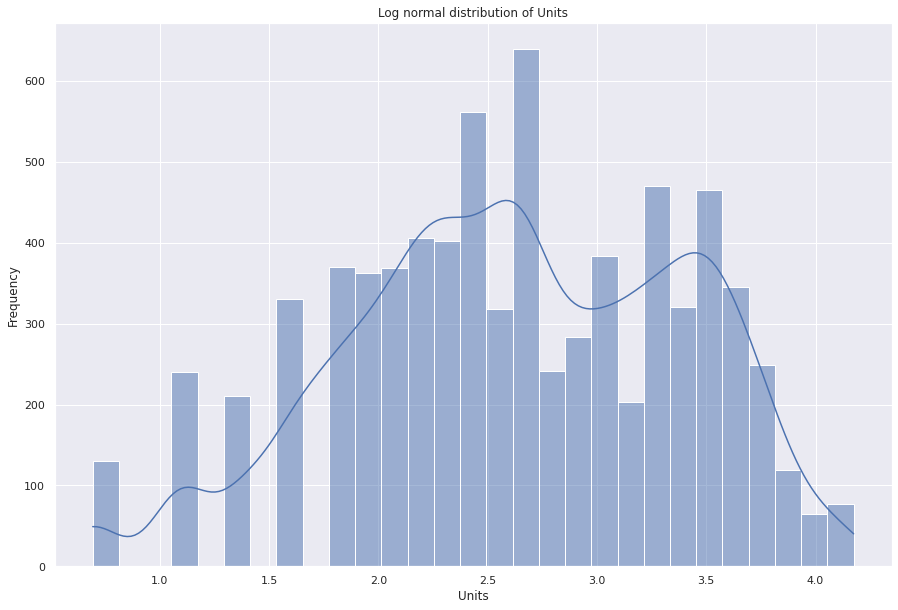

In [155]:
# Plot Log_Unit distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Log_Unit'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Log normal distribution of Units')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()

***Deduction***: The log normal distribution for unit sold tends to normalize the data which is evident from the above graph which is tending towards a bell curve or gaussian distribution with the swekness of the distribution being reduced significantly

#### Normalized_Unit distribution of Unit Sold

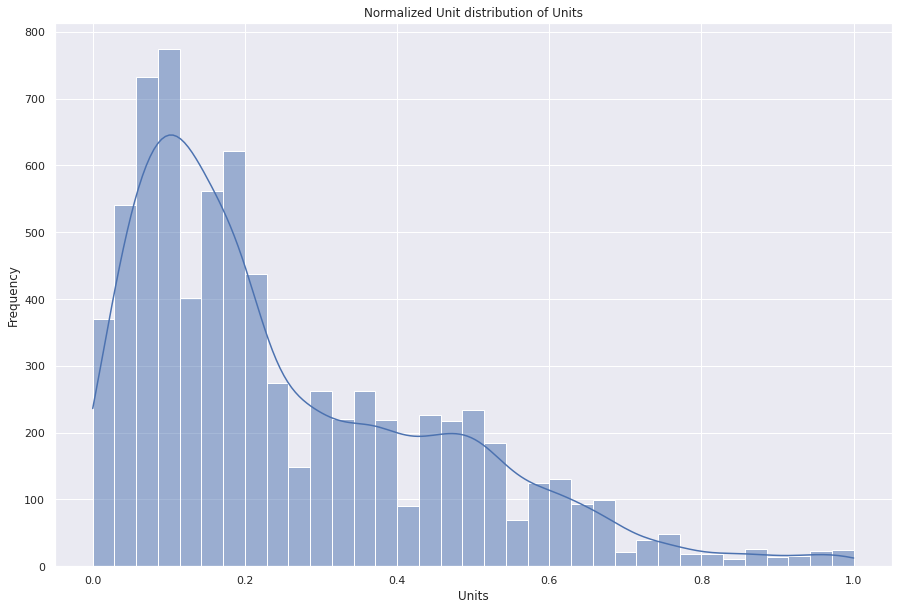

In [156]:
# Plot Normalized_Unit distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Normalized_Unit'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Normalized Unit distribution of Units')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()

***Deduction:*** From the above histplot distribution of the Normalized_Unit, it is seen that the distribution is heavily right/positively skewed showing the maximum concentration of the Unit sold between 0.0 and 0.2 unit range. The above hisplot plots the bars at 0.2 unit intervals.

#### Sqrt_Unit(Square Root Unit) distribution of Unit Sold

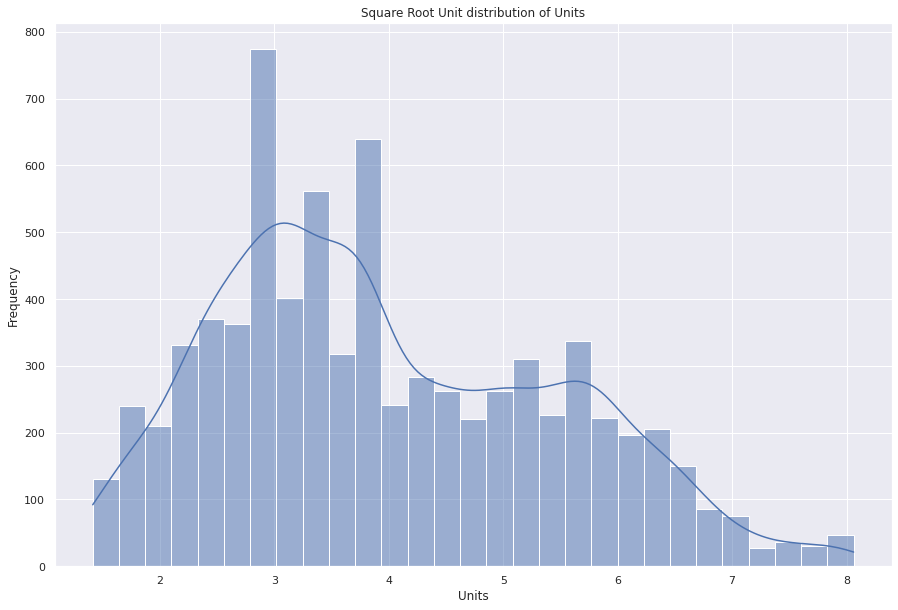

In [157]:
# Plot Sqrt_Unit distribution
plt.figure(figsize=(15, 10))
sns.histplot(aal_sales_df['Sqrt_Unit'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Square Root Unit distribution of Units')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()

***Deduction***: The square root distribution for unit sold tends to normalize the data which is evident from the above graph which is tending towards a bell curve or gaussian distribution with the swekness of the distribution being reduced significantly